```
Copyright 2021 Twitter, Inc.
SPDX-License-Identifier: Apache-2.0
```

## Image Crop Analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/twitter-research/image-crop-analysis/blob/master/notebooks/Image%20Crop%20Analysis.ipynb)

In [ ]:
import logging
import shlex
import subprocess
import sys
from collections import namedtuple
from pathlib import Path

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

logging.basicConfig(level=logging.ERROR)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import platform

BIN_MAPS = {"Darwin": "mac", "Linux": "linux"}

HOME_DIR = Path("../").expanduser()

try:
    import google.colab
    ! pip install pandas scikit-learn scikit-image statsmodels requests dash
    ! [[ -d image-crop-analysis ]] || git clone https://github.com/twitter-research/image-crop-analysis.git
    HOME_DIR = Path("./image-crop-analysis").expanduser()
    IN_COLAB = True
except:
    IN_COLAB = False

sys.path.append(str(HOME_DIR / "src"))
bin_dir = HOME_DIR / Path("./bin")
bin_path = bin_dir / BIN_MAPS[platform.system()] / "candidate_crops"
model_path = bin_dir / "fastgaze.vxm"
data_dir = HOME_DIR / Path("./data/")
data_dir.exists()

True

# Instructions for running:

**Step 1**: Please replace the files in `./image-crop-analysis/src/` wi the files present in the GitHub repository here: https://github.com/gaurav22verma/twitter-algorithmic-bias-challenge. Two files must be replaced, namely, `crop_api.py` and `image_manipulation.py`. 

**Step 2**: Now, restart runtime and execute the cells from starting. This needs to be done to ensure that Google Colab registers the changes made in the above files. *italicised text*

In [ ]:
# Specify the location of files from which you want to read your images
!cp -r ./drive/MyDrive/ColabFiles/TwitterChallenge/images/* ./image-crop-analysis/data/

In [ ]:
!pwd

/content


In [ ]:
img_path = next(data_dir.glob("./*.jpg"))
img_path

PosixPath('image-crop-analysis/data/Western69.jpg')

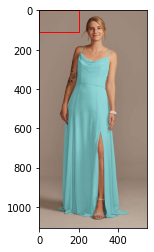

In [ ]:
img = mpimg.imread(img_path)
plt.imshow(img)
plt.gca().add_patch(
    Rectangle((0, 0), 200, 112, linewidth=1, edgecolor="r", facecolor="none")
)

In [ ]:
str(img_path.absolute())

'/content/image-crop-analysis/data/Western69.jpg'

In [ ]:
cmd = f"{str(bin_path)} {str(model_path)} '{img_path.absolute()}' show_all_points"
cmd

"image-crop-analysis/bin/linux/candidate_crops image-crop-analysis/bin/fastgaze.vxm '/content/image-crop-analysis/data/Western69.jpg' show_all_points"

In [ ]:
output = subprocess.check_output(cmd, shell=True)  # Success!
print(output.splitlines())

[b'303 137', b'0 0 548 307', b'0 0 548 548', b'0 0 548 625', b'0 0 548 1096', b'0 0 548 1106', b'27.5723 27.5723 -0.0306512', b'82.717 27.5723 -0.0593254', b'137.862 27.5723 0.280443', b'193.006 27.5723 0.952543', b'248.151 27.5723 1.72878', b'303.296 27.5723 1.76999', b'358.44 27.5723 1.15985', b'413.585 27.5723 0.451062', b'468.73 27.5723 0.047416', b'523.874 27.5723 -0.0151746', b'27.5723 82.717 -0.0870526', b'82.717 82.717 -0.0996222', b'137.862 82.717 0.579964', b'193.006 82.717 1.91006', b'248.151 82.717 3.4948', b'303.296 82.717 3.72542', b'358.44 82.717 2.49238', b'413.585 82.717 1.03673', b'468.73 82.717 0.111912', b'523.874 82.717 -0.0123102', b'27.5723 137.862 -0.180289', b'82.717 137.862 -0.212254', b'137.862 137.862 0.585702', b'193.006 137.862 2.48251', b'248.151 137.862 4.47436', b'303.296 137.862 4.78704', b'358.44 137.862 3.14773', b'413.585 137.862 1.25749', b'468.73 137.862 -0.063172', b'523.874 137.862 -0.0839595', b'27.5723 193.006 -0.174775', b'82.717 193.006 -0.1

In [ ]:
! {str(bin_path)} {str(model_path)} '{img_path.absolute()}' show_all_points | head

showAllPoints=true, argv[3]=show_all_points
303 137
0 0 548 307
0 0 548 548
0 0 548 625
0 0 548 1096
0 0 548 1106
27.5723 27.5723 -0.0306512
82.717 27.5723 -0.0593254
137.862 27.5723 0.280443
193.006 27.5723 0.952543


In [ ]:
from crop_api import ImageSaliencyModel, is_symmetric, parse_output, reservoir_sampling

In [ ]:
parse_output(output).keys()

dict_keys(['salient_point', 'crops', 'all_salient_points'])

In [ ]:
model = ImageSaliencyModel(crop_binary_path=bin_path, crop_model_path=model_path)

In [ ]:
plt.matplotlib.__version__

'3.2.2'

In [ ]:
list(data_dir.glob("./*.jpg"))

[PosixPath('image-crop-analysis/data/Western69.jpg'),
 PosixPath('image-crop-analysis/data/Eastern15.jpg'),
 PosixPath('image-crop-analysis/data/Eastern59.jpg'),
 PosixPath('image-crop-analysis/data/Western66.jpg'),
 PosixPath('image-crop-analysis/data/Eastern74.jpg'),
 PosixPath('image-crop-analysis/data/Eastern55.jpg'),
 PosixPath('image-crop-analysis/data/Eastern12.jpg'),
 PosixPath('image-crop-analysis/data/Western9.jpg'),
 PosixPath('image-crop-analysis/data/Western60.jpg'),
 PosixPath('image-crop-analysis/data/Eastern51.jpg'),
 PosixPath('image-crop-analysis/data/Eastern25.jpg'),
 PosixPath('image-crop-analysis/data/Western68.jpg'),
 PosixPath('image-crop-analysis/data/Eastern73.jpg'),
 PosixPath('image-crop-analysis/data/Western18.jpg'),
 PosixPath('image-crop-analysis/data/Western58.jpg'),
 PosixPath('image-crop-analysis/data/Eastern70.jpg'),
 PosixPath('image-crop-analysis/data/Western2.jpg'),
 PosixPath('image-crop-analysis/data/Eastern17.jpg'),
 PosixPath('image-crop-analysi

## Crop an image generated using combination of images

In [ ]:
from PIL import Image

from image_manipulation import join_images

In [ ]:
my_num = [str(x) for x in range(1, 76)]
exclude = [str(x) for x in range(26, 51)]
my_num = [x for x in my_num if x not in exclude]
# my_num

In [ ]:
# images = [Image.open(x) for x in data_dir.glob("./*ern" + num + ".jpg")]
# img = join_images(images, col_wrap=2, img_size=(128, -1))

In [ ]:
from tqdm import tqdm
# Initialize my dictionary
my_results_dict = {}
for num in my_num:
    my_results_dict[num] = {'eastern_western': '', 'western_eastern': ''}

# Eastern Western Horizontal Stitch
for num in tqdm(my_num):
    images = [
        Image.open(data_dir / Path("./Eastern" + num + ".jpg")),
        Image.open(data_dir / Path("./Western" + num + ".jpg")),
    ]
    img, x_sep, y_sep = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
    x, y = model.plot_img_crops_using_img(img, topK=1)
    if x > x_sep:
        my_results_dict[num]['eastern_western'] = 'western'
    else:
        my_results_dict[num]['eastern_western'] = 'eastern'

  2%|▏         | 1/50 [00:00<00:06,  8.14it/s]

/tmp/tmp79uycfj5
None 170 128
/tmp/tmp16wfjo86
None 128 128


  8%|▊         | 4/50 [00:00<00:05,  8.51it/s]

/tmp/tmp9b1vcftm
None 199 128
/tmp/tmp0vexzxh2
None 165 128


 12%|█▏        | 6/50 [00:00<00:05,  8.60it/s]

/tmp/tmp133i6es7
None 161 128
/tmp/tmphj0ern21
None 143 128


 14%|█▍        | 7/50 [00:00<00:04,  8.95it/s]

/tmp/tmpk8_m90d0
None 172 128
/tmp/tmpe6fi6k90
None 197 128
/tmp/tmp0hugrqw7


 20%|██        | 10/50 [00:01<00:04,  9.08it/s]

None 151 128
/tmp/tmp6j13q2hl
None 158 128


 22%|██▏       | 11/50 [00:01<00:04,  9.26it/s]

/tmp/tmpsygn1jqn
None 170 128
/tmp/tmp15b9lxfa
None 174 128
/tmp/tmpsionlmjk
None 146 128


 30%|███       | 15/50 [00:01<00:03,  9.35it/s]

/tmp/tmp9_6wer91
None 159 128
/tmp/tmpydk8d49l
None 175 128


 32%|███▏      | 16/50 [00:01<00:03,  9.09it/s]

/tmp/tmpmt1uoeyh
None 125 128
/tmp/tmp38t9afco
None 173 128


 38%|███▊      | 19/50 [00:02<00:03,  9.35it/s]

/tmp/tmpjmphdtm2
None 119 128
/tmp/tmpcovrnvfi
None 110 128


 40%|████      | 20/50 [00:02<00:03,  9.41it/s]

/tmp/tmpxhkui7vp
None 106 128
/tmp/tmpf24tfnju
None 128 128


 44%|████▍     | 22/50 [00:02<00:03,  9.16it/s]

/tmp/tmptykeqk1l
None 152 128
/tmp/tmp5hketeyw
None 121 128


 48%|████▊     | 24/50 [00:02<00:02,  9.02it/s]

/tmp/tmpd1dc8351
None 114 128
/tmp/tmpty4l10ed
None 129 128


 52%|█████▏    | 26/50 [00:02<00:02,  8.97it/s]

/tmp/tmppleg241o
None 133 128
/tmp/tmp9pim5t86
None 161 128
/tmp/tmpp5dxntks


 56%|█████▌    | 28/50 [00:03<00:02,  9.37it/s]

None 151 128
/tmp/tmp2ycfo3zj
None 160 128
/tmp/tmp2futp9y6
None 112 128


 64%|██████▍   | 32/50 [00:03<00:01, 10.13it/s]

/tmp/tmp1s2z98gy
None 181 128
/tmp/tmpyudvo84x
None 172 128
/tmp/tmpa0mb5non
None 170 128


 68%|██████▊   | 34/50 [00:03<00:01, 10.04it/s]

/tmp/tmpxd273qb0
None 135 128
/tmp/tmps_4ukdfv
None 179 128
/tmp/tmpq8agg07u


 72%|███████▏  | 36/50 [00:03<00:01, 10.47it/s]

None 203 128
/tmp/tmpfpmm7s10
None 145 128
/tmp/tmprvej9zx4
None 197 128


 80%|████████  | 40/50 [00:04<00:00, 10.85it/s]

/tmp/tmpfz16biga
None 191 128
/tmp/tmpev7m_z44
None 177 128
/tmp/tmp_addhaju
None 163 128


 84%|████████▍ | 42/50 [00:04<00:00, 10.21it/s]

/tmp/tmp6nvc3_xe
None 126 128
/tmp/tmpk7hq33cv
None 135 128


 88%|████████▊ | 44/50 [00:04<00:00,  9.98it/s]

/tmp/tmpkm65f5vu
None 129 128
/tmp/tmpr4kr5yca
None 128 128


 92%|█████████▏| 46/50 [00:04<00:00,  9.68it/s]

/tmp/tmpfq3_eqwe
None 128 128
/tmp/tmpf3ggzxl7
None 128 128


 98%|█████████▊| 49/50 [00:05<00:00,  9.84it/s]

/tmp/tmpndchvtys
None 194 128
/tmp/tmpqlj04xp_
None 135 128
/tmp/tmp2lvkbehh
None 123 128


100%|██████████| 50/50 [00:05<00:00,  9.62it/s]


In [ ]:
# Western Eastern Horizontal Stitch
for num in tqdm(my_num):
    images = [
        Image.open(data_dir / Path("./Western" + num + ".jpg")),
        Image.open(data_dir / Path("./Eastern" + num + ".jpg")),
    ]
    img, x_sep, y_sep = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
    x, y = model.plot_img_crops_using_img(img, topK=1)
    if x > x_sep:
        my_results_dict[num]['western_eastern'] = 'eastern'
    else:
        my_results_dict[num]['western_eastern'] = 'western'

  2%|▏         | 1/50 [00:00<00:05,  9.28it/s]

/tmp/tmpkz1ubjif
None 170 128
/tmp/tmpkp5h9x_5
None 128 128


  8%|▊         | 4/50 [00:00<00:05,  9.10it/s]

/tmp/tmpxehajog7
None 199 128
/tmp/tmp2g87pvfl
None 165 128


 12%|█▏        | 6/50 [00:00<00:04,  8.94it/s]

/tmp/tmpm5uasame
None 161 128
/tmp/tmpja4tq99a
None 143 128


 14%|█▍        | 7/50 [00:00<00:04,  9.19it/s]

/tmp/tmpclx175o3
None 172 128
/tmp/tmpdb_y2uz5
None 197 128


 20%|██        | 10/50 [00:01<00:04,  9.17it/s]

/tmp/tmpj203rhhj
None 151 128
/tmp/tmp358nwhr7
None 158 128


 22%|██▏       | 11/50 [00:01<00:04,  9.33it/s]

/tmp/tmphc526yk1
None 170 128
/tmp/tmpzhh6cf8x
None 174 128
/tmp/tmpdd1uz5y2
None 146 128


 30%|███       | 15/50 [00:01<00:03,  9.45it/s]

/tmp/tmp0uoei4dh
None 159 128
/tmp/tmpxi7n4775
None 175 128


 34%|███▍      | 17/50 [00:01<00:03,  9.33it/s]

/tmp/tmp5mvq9wg6
None 125 128
/tmp/tmpd5rsf5sx
None 173 128


 38%|███▊      | 19/50 [00:02<00:03,  9.42it/s]

/tmp/tmpk62rec2b
None 119 128
/tmp/tmpqgu2thd2
None 110 128


 40%|████      | 20/50 [00:02<00:03,  9.45it/s]

/tmp/tmp47ijjrw3
None 106 128
/tmp/tmpsu_g0kin
None 128 128


 46%|████▌     | 23/50 [00:02<00:02,  9.02it/s]

/tmp/tmpda2bi835
None 152 128
/tmp/tmp98b_r7v2
None 121 128


 48%|████▊     | 24/50 [00:02<00:02,  9.05it/s]

/tmp/tmpfggkcttb
None 114 128
/tmp/tmplqd8ptk7
None 129 128


 52%|█████▏    | 26/50 [00:02<00:02,  8.92it/s]

/tmp/tmpw6uiofwx
None 133 128
/tmp/tmpu2hmgrp0
None 161 128


 56%|█████▌    | 28/50 [00:03<00:02,  9.31it/s]

/tmp/tmp7ndg96da
None 151 128
/tmp/tmp5jz6tub3
None 160 128
/tmp/tmphpffgu6n
None 112 128


 64%|██████▍   | 32/50 [00:03<00:01, 10.12it/s]

/tmp/tmpwn4s0gr6
None 181 128
/tmp/tmpc3baki_w
None 172 128
/tmp/tmp2lgcd5y3
None 170 128


 68%|██████▊   | 34/50 [00:03<00:01, 10.02it/s]

/tmp/tmpc3bq6bf_
None 135 128
/tmp/tmphsvax4my
None 179 128


 72%|███████▏  | 36/50 [00:03<00:01, 10.33it/s]

/tmp/tmpctrae2bd
None 203 128
/tmp/tmp_lp12zhm
None 145 128
/tmp/tmpkvxxces2
None 197 128


 80%|████████  | 40/50 [00:04<00:00, 10.71it/s]

/tmp/tmp0kwdh3b2
None 191 128
/tmp/tmpuuqplq2s
None 177 128
/tmp/tmpf5jhba5q
None 163 128


 84%|████████▍ | 42/50 [00:04<00:00, 10.09it/s]

/tmp/tmpe1f_jl9i
None 126 128
/tmp/tmpkvjhkbrm
None 135 128


 88%|████████▊ | 44/50 [00:04<00:00,  9.88it/s]

/tmp/tmp5ukqat51
None 129 128
/tmp/tmppmt5k6sj
None 128 128


 92%|█████████▏| 46/50 [00:04<00:00,  9.42it/s]

/tmp/tmp1q4ikoqe
None 128 128
/tmp/tmpxf3tb7h_
None 128 128


 98%|█████████▊| 49/50 [00:05<00:00,  9.70it/s]

/tmp/tmpnx5rs6cb
None 194 128
/tmp/tmp8xq6wpj1
None 135 128
/tmp/tmp_u2sm3b9
None 123 128


100%|██████████| 50/50 [00:05<00:00,  9.63it/s]


In [ ]:
# Find stats here, for horizontal stitching
count_clearly_western = 0
count_clearly_eastern = 0
count_confused = 0
for num in my_num:
    if my_results_dict[num]['western_eastern'] == 'western' and my_results_dict[num]['eastern_western'] == 'western':
        count_clearly_western += 1
    elif my_results_dict[num]['western_eastern'] == 'eastern' and my_results_dict[num]['eastern_western'] == 'eastern':
        count_clearly_eastern += 1
    else:
        count_confused += 1
print("horizontal stitching:")
print("eastern", count_clearly_eastern)
print("western", count_clearly_western)
print("confused", count_confused)

horizontal stitching:
eastern 25
western 18
confused 7


In [ ]:
times_eastern_was_preferred = 0
times_western_was_preferred = 0
for num in my_num:
    if my_results_dict[num]['western_eastern'] == 'western':
        times_western_was_preferred += 1
    if  my_results_dict[num]['eastern_western'] == 'western':
        times_western_was_preferred += 1
    if my_results_dict[num]['western_eastern'] == 'eastern':
        times_eastern_was_preferred += 1
    if my_results_dict[num]['eastern_western'] == 'eastern':
        times_eastern_was_preferred += 1

import numpy
from statsmodels.stats.proportion import proportions_ztest
count = np.array([times_eastern_was_preferred, times_western_was_preferred])
nobs = np.array([100, 100])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

0.048


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Initialize my dictionary
my_results_dict = {}
for num_east in my_num:
    for num_west in my_num:
        my_results_dict[num_east, num_west] = {'eastern_western': '', 'western_eastern': ''}

# Eastern Western Horizontal Stitch
for num_east in tqdm(my_num):
    for num_west in my_num:
        images = [
            Image.open(data_dir / Path("./Eastern" + num_east + ".jpg")),
            Image.open(data_dir / Path("./Western" + num_west + ".jpg")),
        ]
        img, x_sep, y_sep = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
        x, y = model.plot_img_crops_using_img(img, topK=1)
        if x > x_sep:
            my_results_dict[num_east, num_west]['eastern_western'] = 'western'
        else:
            my_results_dict[num_east, num_west]['eastern_western'] = 'eastern'

  0%|          | 0/50 [00:00<?, ?it/s]

/tmp/tmpll_1nvyy
None 170 128
/tmp/tmpy72slcav
None 143 128
/tmp/tmpheguuy_q
None 190 128
/tmp/tmpw0vfnnot
None 168 128
/tmp/tmpdwerjafz
None 167 128
/tmp/tmpstb4rjcz
None 154 128
/tmp/tmpffuva53h
None 172 128
/tmp/tmpfoa_y52t
None 182 128
/tmp/tmpafelikhs
None 160 128
/tmp/tmp8syut6yb
None 162 128
/tmp/tmpl5s5m1bo
None 173 128
/tmp/tmpa4eme7yy
None 176 128
/tmp/tmp1tn_dqer
None 158 128
/tmp/tmp6ri8uamk
None 168 128
/tmp/tmppk36xmup
None 174 128
/tmp/tmp3liueja4
None 146 128
/tmp/tmpj3wkvfkf
None 172 128
/tmp/tmp0v8fm3jx
None 143 128
/tmp/tmptr_t5lkh
None 144 128
/tmp/tmp65tkxpy4
None 140 128
/tmp/tmp60lb97uw
None 158 128
/tmp/tmpv2v4kxyy
None 158 128
/tmp/tmpfq27qg1f
None 153 128
/tmp/tmphm__5a51
None 139 128
/tmp/tmp8pe5at7v
None 155 128
/tmp/tmphipksc0x
None 157 128
/tmp/tmp6meru3df
None 173 128
/tmp/tmpe5t15yth
None 154 128
/tmp/tmpjozmsxer
None 176 128
/tmp/tmpvk4li0jc
None 147 128
/tmp/tmp6izgkl1_
None 184 128
/tmp/tmpktonbe37
None 175 128
/tmp/tmpgo9no3ch
None 173 128
/tmp/tmpcq

  2%|▏         | 1/50 [00:05<04:34,  5.61s/it]

/tmp/tmp3igr6mmz
None 159 128
/tmp/tmpkhdsrlrv
None 152 128
/tmp/tmpvkee1ud2
None 155 128
/tmp/tmpkxckwc84
None 128 128
/tmp/tmpkcvqr1ih
None 175 128
/tmp/tmpmjq7nw17
None 153 128
/tmp/tmpim4cr6z6
None 152 128
/tmp/tmpob_b4oo1
None 139 128
/tmp/tmpf4d0glvm
None 157 128
/tmp/tmpjrxo4d9a
None 167 128
/tmp/tmpciofr_mh
None 145 128
/tmp/tmpnqb_fls2
None 147 128
/tmp/tmpnieb908k
None 158 128
/tmp/tmpzfgjr3ra
None 161 128
/tmp/tmp_4_3l2il
None 143 128
/tmp/tmp846aml10
None 153 128
/tmp/tmpo951xejv
None 159 128
/tmp/tmpjlgouz28
None 131 128
/tmp/tmp_rj2g0gd
None 157 128
/tmp/tmppsm6g576
None 128 128
/tmp/tmpckc2rxv1
None 129 128
/tmp/tmppzsvz0uf
None 125 128
/tmp/tmp2jh9tdb_
None 143 128
/tmp/tmpleazmk16
None 143 128
/tmp/tmp1kjqfp3p
None 138 128
/tmp/tmpp0saio5c
None 124 128
/tmp/tmpvmmzxot5
None 140 128
/tmp/tmp69tlkc32
None 142 128
/tmp/tmpd0x012sm
None 158 128
/tmp/tmpij0qt2mv
None 139 128
/tmp/tmpqy_cydyj
None 161 128
/tmp/tmpdnicecgw
None 132 128
/tmp/tmp2abnzoac
None 169 128
/tmp/tmpjn

  4%|▍         | 2/50 [00:11<04:27,  5.58s/it]

/tmp/tmpgs0plekg
None 179 128
/tmp/tmp6037_cn7
None 152 128
/tmp/tmp5uktf7zc
None 199 128
/tmp/tmp2fgb5onl
None 177 128
/tmp/tmpjf97ox2e
None 176 128
/tmp/tmpx9yup1z8
None 163 128
/tmp/tmp69kv6jyv
None 181 128
/tmp/tmprjghndxe
None 191 128
/tmp/tmpiuduam0h
None 169 128
/tmp/tmpdivy3w9i
None 171 128
/tmp/tmpewq_ctov
None 182 128
/tmp/tmprgpx0h0h
None 185 128
/tmp/tmp308_dj_c
None 167 128
/tmp/tmprp32_5s5
None 177 128
/tmp/tmp92b6u74g
None 183 128
/tmp/tmpgt8hz5v9
None 155 128
/tmp/tmp_y64xvqc
None 181 128
/tmp/tmpidrm4fnd
None 152 128
/tmp/tmpd5wszmfs
None 153 128
/tmp/tmparxlmul1
None 149 128
/tmp/tmpbh8gy9pb
None 167 128
/tmp/tmp_agygo6m
None 167 128
/tmp/tmp8m6sn68h
None 162 128
/tmp/tmp2a046q4x
None 148 128
/tmp/tmpsdgu2wyl
None 164 128
/tmp/tmp73zl0mlj
None 166 128
/tmp/tmptn91g7am
None 182 128
/tmp/tmpg_r5di96
None 163 128
/tmp/tmpcxjj4_6p
None 185 128
/tmp/tmpf0h8cufy
None 156 128
/tmp/tmpfbz48nr7
None 193 128
/tmp/tmpqg4gyn8o
None 184 128
/tmp/tmpz0ojkby4
None 182 128
/tmp/tmpz0

  6%|▌         | 3/50 [00:16<04:15,  5.43s/it]

/tmp/tmp6n8_wrjx
None 161 128
/tmp/tmpf0j89jvg
None 167 128
/tmp/tmpln8a5hvx
None 140 128
/tmp/tmpes2g0ejv
None 187 128
/tmp/tmpp4b9xs47
None 165 128
/tmp/tmpj0x0nnzg
None 164 128
/tmp/tmpmeny1r_4
None 151 128
/tmp/tmpaclyfuym
None 169 128
/tmp/tmpl9qd5zt_
None 179 128
/tmp/tmpvh4280rb
None 157 128
/tmp/tmpmijuacgo
None 159 128
/tmp/tmppd7as38x
None 170 128
/tmp/tmpr2_w1um_
None 173 128
/tmp/tmptff1j4g8
None 155 128
/tmp/tmpo3xxo3cu
None 165 128
/tmp/tmpp4ko09rn
None 171 128
/tmp/tmp2n80dvju
None 143 128
/tmp/tmpng4pzgqz
None 169 128
/tmp/tmp2n7zds4p
None 140 128
/tmp/tmpd8e1hhs3
None 141 128
/tmp/tmpux22s318
None 137 128
/tmp/tmppzkge2w7
None 155 128
/tmp/tmp77o2sw28
None 155 128
/tmp/tmpsycp3efu
None 150 128
/tmp/tmpzi5ienwk
None 136 128
/tmp/tmptq85u57c
None 152 128
/tmp/tmpmyz22uv3
None 154 128
/tmp/tmp65u9nct5
None 170 128
/tmp/tmpd2obbyfn
None 151 128
/tmp/tmpdv88gd5a
None 173 128
/tmp/tmpuc04fodr
None 144 128
/tmp/tmpsordha5c
None 181 128
/tmp/tmpm77obmov
None 172 128
/tmp/tmpnd

  8%|▊         | 4/50 [00:21<04:06,  5.36s/it]

/tmp/tmp26rpo_48
None 164 128
/tmp/tmpo1uxmqan
None 137 128
/tmp/tmp3hp06e6b
None 184 128
/tmp/tmpwvz5aru_
None 162 128
/tmp/tmpvhrviat5
None 161 128
/tmp/tmpc8qeyqo6
None 148 128
/tmp/tmp1hnmvo97
None 166 128
/tmp/tmph7rfp729
None 176 128
/tmp/tmp08wk42n7
None 154 128
/tmp/tmpg7accgir
None 156 128
/tmp/tmpk0yvf6gg
None 167 128
/tmp/tmpv8wo9hft
None 170 128
/tmp/tmp_t_tfphe
None 152 128
/tmp/tmpej2ezpyt
None 162 128
/tmp/tmpfthxkyia
None 168 128
/tmp/tmptc2tif0d
None 140 128
/tmp/tmpad_6gvpt
None 166 128
/tmp/tmpqsaj1g3a
None 137 128
/tmp/tmpmx2ls9g4
None 138 128
/tmp/tmpoumuv0u4
None 134 128
/tmp/tmpsrc_kj_q
None 152 128
/tmp/tmptn4y70xa
None 152 128
/tmp/tmpdz_kv5dh
None 147 128
/tmp/tmp5ivd46q1
None 133 128
/tmp/tmpk3ktrol8
None 149 128
/tmp/tmpo0bdgnfm
None 151 128
/tmp/tmpalsb5jst
None 167 128
/tmp/tmpuutvu8d2
None 148 128
/tmp/tmp6ohhu8vf
None 170 128
/tmp/tmpf2oxdds8
None 141 128
/tmp/tmp9uggxicm
None 178 128
/tmp/tmphj749io0
None 169 128
/tmp/tmppt3enf75
None 167 128
/tmp/tmpgn

 10%|█         | 5/50 [00:26<04:03,  5.42s/it]

/tmp/tmp1cwe9_sg
None 153 128
/tmp/tmp1hzomuk6
None 146 128
/tmp/tmpm6dt2_bn
None 159 128
/tmp/tmplqbmksdv
None 132 128
/tmp/tmpap61vk3x
None 179 128
/tmp/tmp1wobklw3
None 157 128
/tmp/tmphs6kv940
None 156 128
/tmp/tmpdoqokgda
None 143 128
/tmp/tmp9cuiv_mc
None 161 128
/tmp/tmpvx7veb3y
None 171 128
/tmp/tmph3ytl01w
None 149 128
/tmp/tmppuj6l78j
None 151 128
/tmp/tmpwfmsq6__
None 162 128
/tmp/tmpjd82kce2
None 165 128
/tmp/tmph8b066v8
None 147 128
/tmp/tmpq2t6crp_
None 157 128
/tmp/tmpbz291h15
None 163 128
/tmp/tmpugpu_7tl
None 135 128
/tmp/tmp98xdfsbw
None 161 128
/tmp/tmp4oend_2l
None 132 128
/tmp/tmp942sin8_
None 133 128
/tmp/tmppqmuzquz
None 129 128
/tmp/tmp7vvph7i6
None 147 128
/tmp/tmpux9p3h8j
None 147 128
/tmp/tmpl13n50i4
None 142 128
/tmp/tmp8j_ptyal
None 128 128
/tmp/tmppinxtgx9
None 144 128
/tmp/tmp8b5dnff1
None 146 128
/tmp/tmpjw4i8dcr
None 162 128
/tmp/tmpgoswnrx8
None 143 128
/tmp/tmpahqj5hw5
None 165 128
/tmp/tmpy51lusti
None 136 128
/tmp/tmpc7o05y69
None 173 128
/tmp/tmp0x

 12%|█▏        | 6/50 [00:32<03:57,  5.41s/it]

/tmp/tmplzi9rkbm
None 148 128
/tmp/tmpqhsixw84
None 141 128
/tmp/tmplyv5qr3r
None 170 128
/tmp/tmp4m60g8re
None 143 128
/tmp/tmp4xal8x8b
None 190 128
/tmp/tmpjj1ad301
None 168 128
/tmp/tmpdtt8zebh
None 167 128
/tmp/tmpk50992uu
None 154 128
/tmp/tmpn0nl7z9q
None 172 128
/tmp/tmpeq54vawd
None 182 128
/tmp/tmp2ybb28v1
None 160 128
/tmp/tmp253qgqiw
None 162 128
/tmp/tmpc1uc6iof
None 173 128
/tmp/tmpzouuw5i1
None 176 128
/tmp/tmp3bcytugg
None 158 128
/tmp/tmp8pv6qg0k
None 168 128
/tmp/tmpz75jmyul
None 174 128
/tmp/tmp7mlin24n
None 146 128
/tmp/tmpf7s4pace
None 172 128
/tmp/tmp98em8_w5
None 143 128
/tmp/tmpz5ccb8jz
None 144 128
/tmp/tmppc9jb569
None 140 128
/tmp/tmps10sutaa
None 158 128
/tmp/tmp2ank3ce8
None 158 128
/tmp/tmp7n5d_bdm
None 153 128
/tmp/tmpt1pe7gv7
None 139 128
/tmp/tmpx4nfoq3d
None 155 128
/tmp/tmpb279sbwv
None 157 128
/tmp/tmpvz9vrp11
None 173 128
/tmp/tmpwly2qlpr
None 154 128
/tmp/tmp067ad5w8
None 176 128
/tmp/tmp9bhasif4
None 147 128
/tmp/tmp8fhdqct7
None 184 128
/tmp/tmpwy

 14%|█▍        | 7/50 [00:37<03:47,  5.29s/it]

/tmp/tmpq3kq7eoz
None 152 128
/tmp/tmps899jdvd
None 185 128
/tmp/tmpdmrkqe_m
None 158 128
/tmp/tmpd1dpkihn
None 205 128
/tmp/tmpqzkxzlrw
None 183 128
/tmp/tmpteaf9meh
None 182 128
/tmp/tmpevgg2txf
None 169 128
/tmp/tmp6m1uqqym
None 187 128
/tmp/tmpu_560i4s
None 197 128
/tmp/tmpwjm3kw6z
None 175 128
/tmp/tmpgc5s0j8d
None 177 128
/tmp/tmpaxl5h_8f
None 188 128
/tmp/tmprmva1na2
None 191 128
/tmp/tmpq1jfx0mz
None 173 128
/tmp/tmpwob_ruxi
None 183 128
/tmp/tmpk5mnpzsl
None 189 128
/tmp/tmpqc21n0o3
None 161 128
/tmp/tmp_thjsgn4
None 187 128
/tmp/tmpef6qrgqn
None 158 128
/tmp/tmpxp51k1bi
None 159 128
/tmp/tmpfo1ndc7b
None 155 128
/tmp/tmpwb7gt3ek
None 173 128
/tmp/tmpgovqew7l
None 173 128
/tmp/tmpwscgy85x
None 168 128
/tmp/tmpcoqre224
None 154 128
/tmp/tmp4_8mcns6
None 170 128
/tmp/tmp9zfn58t3
None 172 128
/tmp/tmp33e5afbn
None 188 128
/tmp/tmpxljy05cn
None 169 128
/tmp/tmptxiw5tk8
None 191 128
/tmp/tmpy0qp6q8c
None 162 128
/tmp/tmpfhiodox2
None 199 128
/tmp/tmpqn7s8zuh
None 190 128
/tmp/tmphj

 16%|█▌        | 8/50 [00:42<03:34,  5.10s/it]

/tmp/tmp0f_l8_lm
None 167 128
/tmp/tmp24zsqji3
None 161 128
/tmp/tmpslvksqn1
None 134 128
/tmp/tmp_989j7wf
None 181 128
/tmp/tmpigwleuss
None 159 128
/tmp/tmp4qeu675p
None 158 128
/tmp/tmpx5s8_4hz
None 145 128
/tmp/tmp242vx8a9
None 163 128
/tmp/tmpladibkb3
None 173 128
/tmp/tmpysi7xixz
None 151 128
/tmp/tmp5ce982lb
None 153 128
/tmp/tmp44pzdzve
None 164 128
/tmp/tmplf31npiu
None 167 128
/tmp/tmpojhndtrx
None 149 128
/tmp/tmp6nu2tsqz
None 159 128
/tmp/tmp3cuzmu1_
None 165 128
/tmp/tmp8lhcd_7n
None 137 128
/tmp/tmp4ct75x3w
None 163 128
/tmp/tmpvraq2fb1
None 134 128
/tmp/tmp350xgofj
None 135 128
/tmp/tmpwrxiyqs0
None 131 128
/tmp/tmpa9g_yx2y
None 149 128
/tmp/tmpyyu2pa80
None 149 128
/tmp/tmpg4_gxxv8
None 144 128
/tmp/tmpg95c66gy
None 130 128
/tmp/tmp7vuu4e7_
None 146 128
/tmp/tmp13nogmpy
None 148 128
/tmp/tmpcaj_f0t0
None 164 128
/tmp/tmplpzkq5m9
None 145 128
/tmp/tmptciwesqe
None 167 128
/tmp/tmp__b2po6t
None 138 128
/tmp/tmp4c2pspd8
None 175 128
/tmp/tmpmt66jz3r
None 166 128
/tmp/tmpq4

 18%|█▊        | 9/50 [00:47<03:33,  5.22s/it]

/tmp/tmp8dnelbje
None 166 128
/tmp/tmp051bi8js
None 139 128
/tmp/tmplv60_mmw
None 186 128
/tmp/tmpb1gc9b43
None 164 128
/tmp/tmpnh8en39o
None 163 128
/tmp/tmpry19t57c
None 150 128
/tmp/tmpjiiskyc9
None 168 128
/tmp/tmp2wfrlxq8
None 178 128
/tmp/tmpq8cn13yf
None 156 128
/tmp/tmp8rrsyqyf
None 158 128
/tmp/tmpufwawyct
None 169 128
/tmp/tmpqweiketu
None 172 128
/tmp/tmpkcba832d
None 154 128
/tmp/tmpct7llfn6
None 164 128
/tmp/tmp4yfjypln
None 170 128
/tmp/tmpghmxponp
None 142 128
/tmp/tmp9ppn3u7q
None 168 128
/tmp/tmpf97bp670
None 139 128
/tmp/tmpfc21m5w6
None 140 128
/tmp/tmpchp2zb4n
None 136 128
/tmp/tmp9ugcixvr
None 154 128
/tmp/tmpaymnbtnk
None 154 128
/tmp/tmpbrmecljy
None 149 128
/tmp/tmpzsshq9_0
None 135 128
/tmp/tmpr2tzclxx
None 151 128
/tmp/tmp76wvhlld
None 153 128
/tmp/tmp39_ip1l3
None 169 128
/tmp/tmpeangc7gu
None 150 128
/tmp/tmp25xjcg5r
None 172 128
/tmp/tmp9tgxmx38
None 143 128
/tmp/tmprwj_22hf
None 180 128
/tmp/tmp237bd_8m
None 171 128
/tmp/tmpv8ulbtaf
None 169 128
/tmp/tmpyo

 20%|██        | 10/50 [00:52<03:31,  5.28s/it]

/tmp/tmpj6c6e_8y
None 155 128
/tmp/tmpxqnz26ft
None 148 128
/tmp/tmpzzgjmb3d
None 167 128
/tmp/tmplobc__d2
None 140 128
/tmp/tmp0nj23lxj
None 187 128
/tmp/tmp10u_f932
None 165 128
/tmp/tmp8przjbap
None 164 128
/tmp/tmppt4g6pxm
None 151 128
/tmp/tmpm0az278w
None 169 128
/tmp/tmpnk_3imf6
None 179 128
/tmp/tmpvd4dqnpr
None 157 128
/tmp/tmpdds2pg8d
None 159 128
/tmp/tmpx6uobmq6
None 170 128
/tmp/tmp1e0iyxup
None 173 128
/tmp/tmpgnevhpea
None 155 128
/tmp/tmpuq8xy0b2
None 165 128
/tmp/tmpuaqpvuxw
None 171 128
/tmp/tmply58hdl6
None 143 128
/tmp/tmp30bbq4tz
None 169 128
/tmp/tmpyzwewv9p
None 140 128
/tmp/tmpu3zipl9e
None 141 128
/tmp/tmphxbyfoje
None 137 128
/tmp/tmp8ab5mgd9
None 155 128
/tmp/tmp7aowru2o
None 155 128
/tmp/tmpnbqk5bwh
None 150 128
/tmp/tmpcjfaduhk
None 136 128
/tmp/tmp8nipzf5r
None 152 128
/tmp/tmp2i1todxu
None 154 128
/tmp/tmpeqfdrwt_
None 170 128
/tmp/tmpvf5h2r5t
None 151 128
/tmp/tmpn4ddyq7u
None 173 128
/tmp/tmp1o7xvu99
None 144 128
/tmp/tmp7ljseva3
None 181 128
/tmp/tmp0y

 22%|██▏       | 11/50 [00:58<03:23,  5.23s/it]

/tmp/tmpktgs9sj9
None 168 128
/tmp/tmplqmqi8k7
None 141 128
/tmp/tmp3saol3vj
None 188 128
/tmp/tmpoluvmcht
None 166 128
/tmp/tmpby8b58sn
None 165 128
/tmp/tmpybx5nkiy
None 152 128
/tmp/tmp28_evoq7
None 170 128
/tmp/tmp9dg068v9
None 180 128
/tmp/tmpx178bbfa
None 158 128
/tmp/tmpmz3vmmxk
None 160 128
/tmp/tmpuffelcov
None 171 128
/tmp/tmpsn_g9scg
None 174 128
/tmp/tmp2qhe3x3n
None 156 128
/tmp/tmpw8stlbbv
None 166 128
/tmp/tmppocdmr2_
None 172 128
/tmp/tmpodufnbmw
None 144 128
/tmp/tmpg3f26xdb
None 170 128
/tmp/tmpahwuxwi6
None 141 128
/tmp/tmpz11t19k_
None 142 128
/tmp/tmpoelsz_ek
None 138 128
/tmp/tmpq0osuq6k
None 156 128
/tmp/tmp80068fx5
None 156 128
/tmp/tmp1s_i6snh
None 151 128
/tmp/tmpvnlx2if0
None 137 128
/tmp/tmp31jg4lep
None 153 128
/tmp/tmp6g6fy1jd
None 155 128
/tmp/tmp2n2ztn15
None 171 128
/tmp/tmprbdytabw
None 152 128
/tmp/tmp0doht5ql
None 174 128
/tmp/tmpwlxji1q5
None 145 128
/tmp/tmpvfco6a9w
None 182 128
/tmp/tmpevcv8ze2
None 173 128
/tmp/tmpp5irnw3c
None 171 128
/tmp/tmp4c

 24%|██▍       | 12/50 [01:03<03:16,  5.18s/it]

/tmp/tmprqm7tndj
None 150 128
/tmp/tmp94g0gwsa
None 158 128
/tmp/tmp163xd45b
None 131 128
/tmp/tmp72prl2as
None 178 128
/tmp/tmp259yhqp5
None 156 128
/tmp/tmpyrx4rbfd
None 155 128
/tmp/tmp6w_v_n_g
None 142 128
/tmp/tmphe0gd1mh
None 160 128
/tmp/tmpsihz15sq
None 170 128
/tmp/tmp58uaqosa
None 148 128
/tmp/tmp28f8ds2o
None 150 128
/tmp/tmpmk9kt3jv
None 161 128
/tmp/tmpcsdf1yln
None 164 128
/tmp/tmpz5earwm3
None 146 128
/tmp/tmpt66u4wl5
None 156 128
/tmp/tmptamczq5f
None 162 128
/tmp/tmps11mivs8
None 134 128
/tmp/tmpdq6vyg7l
None 160 128
/tmp/tmprz0om29o
None 131 128
/tmp/tmpur2f0p5a
None 132 128
/tmp/tmpevecegoe
None 128 128
/tmp/tmp54vnq7zr
None 146 128
/tmp/tmp5frh9f7d
None 146 128
/tmp/tmprrqqqqme
None 141 128
/tmp/tmp13elwrlk
None 127 128
/tmp/tmp1qg8536g
None 143 128
/tmp/tmp5u88p2m0
None 145 128
/tmp/tmph9c5gk24
None 161 128
/tmp/tmp3htio5av
None 142 128
/tmp/tmpssi9xiq_
None 164 128
/tmp/tmpvqonvtm3
None 135 128
/tmp/tmpxw5uqh7q
None 172 128
/tmp/tmpnemvifnk
None 163 128
/tmp/tmpbc

 26%|██▌       | 13/50 [01:08<03:10,  5.16s/it]

/tmp/tmpg1i8gahm
None 147 128
/tmp/tmpmx13xjfp
None 140 128
/tmp/tmp8lznfatb
None 161 128
/tmp/tmpoi87e8h8
None 134 128
/tmp/tmpav4lkzb1
None 181 128
/tmp/tmp1ca5hwq7
None 159 128
/tmp/tmphszn53lm
None 158 128
/tmp/tmpet47z9n1
None 145 128
/tmp/tmpl85a18jx
None 163 128
/tmp/tmpdt3wsia0
None 173 128
/tmp/tmpw2923rll
None 151 128
/tmp/tmplkd1yaxn
None 153 128
/tmp/tmpxgux4nx1
None 164 128
/tmp/tmpsz_0t46a
None 167 128
/tmp/tmp9cg2n5x6
None 149 128
/tmp/tmp39pe53cd
None 159 128
/tmp/tmpev6ifv2c
None 165 128
/tmp/tmpmkm40h5o
None 137 128
/tmp/tmp8of1ohud
None 163 128
/tmp/tmp4j03yfo7
None 134 128
/tmp/tmpiw8jf0tm
None 135 128
/tmp/tmplwvco4ys
None 131 128
/tmp/tmp_xjcpwaz
None 149 128
/tmp/tmpt9xp7lfj
None 149 128
/tmp/tmpsf_gz48l
None 144 128
/tmp/tmp4nfnazfo
None 130 128
/tmp/tmp6sazfk1p
None 146 128
/tmp/tmp81cqxrhj
None 148 128
/tmp/tmppxb_d0nk
None 164 128
/tmp/tmpwyzbhin3
None 145 128
/tmp/tmpz7cz61vr
None 167 128
/tmp/tmp42qftg2e
None 138 128
/tmp/tmp0uzbeutg
None 175 128
/tmp/tmpu2

 28%|██▊       | 14/50 [01:13<03:10,  5.30s/it]

/tmp/tmpnsuc5q_8
None 171 128
/tmp/tmp3oj1y36_
None 144 128
/tmp/tmpvv2hoah1
None 191 128
/tmp/tmpjlq0g2ht
None 169 128
/tmp/tmpexuzofz7
None 168 128
/tmp/tmpon5npxgt
None 155 128
/tmp/tmp8pt1jeiv
None 173 128
/tmp/tmp1h9362qt
None 183 128
/tmp/tmpkhv1_h_4
None 161 128
/tmp/tmp2xc3fzeq
None 163 128
/tmp/tmptanjv2mj
None 174 128
/tmp/tmpqpmrnb58
None 177 128
/tmp/tmp0h_cdcmn
None 159 128
/tmp/tmpow79ma4j
None 169 128
/tmp/tmpo4fphhhn
None 175 128
/tmp/tmp11_q5wwn
None 147 128
/tmp/tmpw9e4tca4
None 173 128
/tmp/tmpblociptb
None 144 128
/tmp/tmpe8nduaac
None 145 128
/tmp/tmpe0bn380n
None 141 128
/tmp/tmpipdha602
None 159 128
/tmp/tmpmja2evbd
None 159 128
/tmp/tmpus0rvd0y
None 154 128
/tmp/tmpnqi5u3f2
None 140 128
/tmp/tmpbhcuer6s
None 156 128
/tmp/tmpk2354s_9
None 158 128
/tmp/tmp0na974b3
None 174 128
/tmp/tmpd0cppa7w
None 155 128
/tmp/tmpslg2pvoo
None 177 128
/tmp/tmpg2yhygt2
None 148 128
/tmp/tmp6fscpcyx
None 185 128
/tmp/tmp9lumizv1
None 176 128
/tmp/tmp0ps101no
None 174 128
/tmp/tmp2m

 30%|███       | 15/50 [01:18<03:03,  5.23s/it]

/tmp/tmphmax0txg
None 153 128
/tmp/tmphvd5bnsq
None 149 128
/tmp/tmpq528t6zf
None 122 128
/tmp/tmpe5_ezy1g
None 169 128
/tmp/tmpzkp0r3s2
None 147 128
/tmp/tmp79rx0ruo
None 146 128
/tmp/tmpfmafq2qr
None 133 128
/tmp/tmp27ob_nio
None 151 128
/tmp/tmp_k1ilbt1
None 161 128
/tmp/tmpwq4nxfyd
None 139 128
/tmp/tmpw4iv2qk6
None 141 128
/tmp/tmpbv98rpoz
None 152 128
/tmp/tmp_tlpnquy
None 155 128
/tmp/tmpsh5qg1pu
None 137 128
/tmp/tmpj37a2bkx
None 147 128
/tmp/tmpfmxsiqdd
None 153 128
/tmp/tmpewjp0c6r
None 125 128
/tmp/tmpczjdw7oq
None 151 128
/tmp/tmpsz324kei
None 122 128
/tmp/tmpf_x0zy_t
None 123 128
/tmp/tmpicovxy_m
None 119 128
/tmp/tmpajl5tl2x
None 137 128
/tmp/tmpkzk2kq8q
None 137 128
/tmp/tmpzoksikr6
None 132 128
/tmp/tmp1ptfyxmg
None 118 128
/tmp/tmpe3x83u_4
None 134 128
/tmp/tmp9o3lglfi
None 136 128
/tmp/tmp7nx_20kt
None 152 128
/tmp/tmpoi772b0y
None 133 128
/tmp/tmp2r88h71s
None 155 128
/tmp/tmp4gbu27ch
None 126 128
/tmp/tmp7cz3_5vv
None 163 128
/tmp/tmp6s0eo7j6
None 154 128
/tmp/tmp3a

 32%|███▏      | 16/50 [01:24<02:59,  5.27s/it]

/tmp/tmpbap_a16h
None 171 128
/tmp/tmpqyctmeh4
None 144 128
/tmp/tmpruepn3uh
None 191 128
/tmp/tmpcsyejfhm
None 169 128
/tmp/tmpvoq367hm
None 168 128
/tmp/tmp1mnqldp9
None 155 128
/tmp/tmpdo0t585s
None 173 128
/tmp/tmpd6ihoppt
None 183 128
/tmp/tmpk4h5p67m
None 161 128
/tmp/tmpqga8qzq_
None 163 128
/tmp/tmp5bwvrszd
None 174 128
/tmp/tmp3vfy9qix
None 177 128
/tmp/tmp1aht_v2u
None 159 128
/tmp/tmpie77pq7z
None 169 128
/tmp/tmpr9rj9dj3
None 175 128
/tmp/tmpt1z94zwi
None 147 128
/tmp/tmpr9rgfl9k
None 173 128
/tmp/tmpc10wo_3x
None 144 128
/tmp/tmpz0_wtuz7
None 145 128
/tmp/tmp7z1ed86d
None 141 128
/tmp/tmpdkr6djah
None 159 128
/tmp/tmp808jwa_d
None 159 128
/tmp/tmpyyc8kiry
None 154 128
/tmp/tmpwu05oylf
None 140 128
/tmp/tmp_ntp1cyj
None 156 128
/tmp/tmp4hx_7mv1
None 158 128
/tmp/tmpjf_fhyu9
None 174 128
/tmp/tmpe0wllk45
None 155 128
/tmp/tmpfrrb8yhq
None 177 128
/tmp/tmptg1ahso_
None 148 128
/tmp/tmpun5f2hja
None 185 128
/tmp/tmpk_s7k495
None 176 128
/tmp/tmp1jjd3hm_
None 174 128
/tmp/tmpn1

 34%|███▍      | 17/50 [01:29<02:52,  5.22s/it]

/tmp/tmp8uetbgbl
None 153 128
/tmp/tmpzur54n7y
None 146 128
/tmp/tmp0p3lbr3_
None 119 128
/tmp/tmpigoflhap
None 166 128
/tmp/tmp7nnouv3k
None 144 128
/tmp/tmp79o4y_rw
None 143 128
/tmp/tmp4or5l8lt
None 130 128
/tmp/tmpdr8wggkn
None 148 128
/tmp/tmpzjcvcclj
None 158 128
/tmp/tmp029f4yub
None 136 128
/tmp/tmpsufgjpon
None 138 128
/tmp/tmp52mhaphq
None 149 128
/tmp/tmp8tko82sd
None 152 128
/tmp/tmp_1u4jpbe
None 134 128
/tmp/tmpuii5gvc_
None 144 128
/tmp/tmp6e_2vuor
None 150 128
/tmp/tmp1gewlr6z
None 122 128
/tmp/tmposx0t78s
None 148 128
/tmp/tmpabvpcn_z
None 119 128
/tmp/tmpznzcnavf
None 120 128
/tmp/tmpsav5_xtz
None 116 128
/tmp/tmp_phnkmo1
None 134 128
/tmp/tmpeuxzji4v
None 134 128
/tmp/tmp2tcgu8z3
None 129 128
/tmp/tmpdxatbw03
None 115 128
/tmp/tmpghbp85e7
None 131 128
/tmp/tmp_f4py6rn
None 133 128
/tmp/tmpnkeo7zmz
None 149 128
/tmp/tmptv987ybo
None 130 128
/tmp/tmpvmk85ur4
None 152 128
/tmp/tmpm1ltyaj2
None 123 128
/tmp/tmp4v53s2s1
None 160 128
/tmp/tmpukjl56nj
None 151 128
/tmp/tmpjm

 36%|███▌      | 18/50 [01:34<02:48,  5.26s/it]

/tmp/tmplekigmjo
None 136 128
/tmp/tmpfni1cbif
None 109 128
/tmp/tmpb2wr1sub
None 156 128
/tmp/tmpqf_3o4_7
None 134 128
/tmp/tmp56_34yyz
None 133 128
/tmp/tmpbyj6_s16
None 120 128
/tmp/tmpuauc7b30
None 138 128
/tmp/tmp2lmc9f7_
None 148 128
/tmp/tmppqoriy1m
None 126 128
/tmp/tmpr83ssa_u
None 128 128
/tmp/tmp_hxu_vsu
None 139 128
/tmp/tmp1h82b72f
None 142 128
/tmp/tmpt3l5crbs
None 124 128
/tmp/tmptjizbeqc
None 134 128
/tmp/tmpk201funm
None 140 128
/tmp/tmpnv3ytzja
None 112 128
/tmp/tmpy2jsmtyo
None 138 128
/tmp/tmp37sid02p
None 109 128
/tmp/tmp_mdzatbh
None 110 128
/tmp/tmp4l8ss3yg
None 106 128
/tmp/tmptue2lc06
None 124 128
/tmp/tmpxjsb5fuh
None 124 128
/tmp/tmpx5peaivf
None 119 128
/tmp/tmpapf6_7fx
None 105 128
/tmp/tmpdetc6rpo
None 121 128
/tmp/tmproms_rne
None 123 128
/tmp/tmpjvukhung
None 139 128
/tmp/tmpin5pj9rv
None 120 128
/tmp/tmparauhyev
None 142 128
/tmp/tmpm_uerxha
None 113 128
/tmp/tmp_j309d1r
None 150 128
/tmp/tmpvek4z9cc
None 141 128
/tmp/tmp4djotg9f
None 139 128
/tmp/tmp7x

 38%|███▊      | 19/50 [01:40<02:44,  5.29s/it]

/tmp/tmp8esk0fkm
None 136 128
/tmp/tmpwd_v1cqg
None 109 128
/tmp/tmpqhr1_u6s
None 156 128
/tmp/tmp4a8f5wjd
None 134 128
/tmp/tmpfme2xqe8
None 133 128
/tmp/tmpythmh_il
None 120 128
/tmp/tmpgtu20xz4
None 138 128
/tmp/tmp2y7g_enl
None 148 128
/tmp/tmpzkzkwrg4
None 126 128
/tmp/tmpgvzge0tx
None 128 128
/tmp/tmp4ijan_j3
None 139 128
/tmp/tmpupobjo4h
None 142 128
/tmp/tmpoehg88w7
None 124 128
/tmp/tmpeln6mdka
None 134 128
/tmp/tmpy7y7jg7o
None 140 128
/tmp/tmp5hlwmumw
None 112 128
/tmp/tmpupu6wk5f
None 138 128
/tmp/tmpoj_p_u1u
None 109 128
/tmp/tmpfkwq4nas
None 110 128
/tmp/tmp6nw08q8a
None 106 128
/tmp/tmp94yt5pgh
None 124 128
/tmp/tmplbw7bgrv
None 124 128
/tmp/tmp8zeac2p_
None 119 128
/tmp/tmpexll8_7_
None 105 128
/tmp/tmp5737g0_r
None 121 128
/tmp/tmp8ia1b7s9
None 123 128
/tmp/tmp3gylromc
None 139 128
/tmp/tmp6s2nsjhp
None 120 128
/tmp/tmpt7qehxdh
None 142 128
/tmp/tmpec8z7vpb
None 113 128
/tmp/tmpkpd9afz1
None 150 128
/tmp/tmp0h2kzw6v
None 141 128
/tmp/tmpr3krlc06
None 139 128
/tmp/tmpyz

 40%|████      | 20/50 [01:45<02:40,  5.36s/it]

/tmp/tmpmkteeg30
None 140 128
/tmp/tmpglqs0dnq
None 113 128
/tmp/tmplpb6n3bw
None 160 128
/tmp/tmp10x0mlt0
None 138 128
/tmp/tmpqf3cwin8
None 137 128
/tmp/tmp0hf3ze7a
None 124 128
/tmp/tmpg6dbw6xe
None 142 128
/tmp/tmp35l8ztwh
None 152 128
/tmp/tmp1swxjqyh
None 130 128
/tmp/tmpyc8brpbj
None 132 128
/tmp/tmp3_qyc_os
None 143 128
/tmp/tmp8ktm24wi
None 146 128
/tmp/tmpt4z9izzk
None 128 128
/tmp/tmppzhp_ut9
None 138 128
/tmp/tmpvuv0h1aj
None 144 128
/tmp/tmpcsakvjpr
None 116 128
/tmp/tmplkyk6281
None 142 128
/tmp/tmpcm7uu54w
None 113 128
/tmp/tmpinf2wbyo
None 114 128
/tmp/tmpzs10weht
None 110 128
/tmp/tmp5_7conaw
None 128 128
/tmp/tmpozyzztbt
None 128 128
/tmp/tmp_gxwoplg
None 123 128
/tmp/tmp30nkqwke
None 109 128
/tmp/tmp1d043g7e
None 125 128
/tmp/tmp641hvztz
None 127 128
/tmp/tmpgqd9rm0w
None 143 128
/tmp/tmp0s44lgmg
None 124 128
/tmp/tmpmy8rhyy9
None 146 128
/tmp/tmp3p500niq
None 117 128
/tmp/tmp6woknva7
None 154 128
/tmp/tmpbdfy3jfk
None 145 128
/tmp/tmppigmvosy
None 143 128
/tmp/tmpn4

 42%|████▏     | 21/50 [01:51<02:37,  5.42s/it]

/tmp/tmpk62zy3i0
None 164 128
/tmp/tmpc2h1gpiz
None 137 128
/tmp/tmpn9a0ol3w
None 184 128
/tmp/tmp9xlocnt5
None 162 128
/tmp/tmp86pvwd5x
None 161 128
/tmp/tmp08l7bpag
None 148 128
/tmp/tmpdvq5tyid
None 166 128
/tmp/tmp6l8zrvp0
None 176 128
/tmp/tmpqnbbq5jm
None 154 128
/tmp/tmp4omvqq7f
None 156 128
/tmp/tmpnh_myti_
None 167 128
/tmp/tmpbo707ca6
None 170 128
/tmp/tmp5y9ku4q4
None 152 128
/tmp/tmph0g5axvc
None 162 128
/tmp/tmp06967zle
None 168 128
/tmp/tmpubt7zuel
None 140 128
/tmp/tmpqnaf5j9b
None 166 128
/tmp/tmpagat89cu
None 137 128
/tmp/tmp0okrr4yq
None 138 128
/tmp/tmpzmcuayl0
None 134 128
/tmp/tmprkfpmdm4
None 152 128
/tmp/tmpml2r61dd
None 152 128
/tmp/tmpptimcxbj
None 147 128
/tmp/tmpavix_0bc
None 133 128
/tmp/tmpuj6tssd_
None 149 128
/tmp/tmpbx81fi33
None 151 128
/tmp/tmp9_bat_2x
None 167 128
/tmp/tmpc0ooltgr
None 148 128
/tmp/tmp1t266scr
None 170 128
/tmp/tmpk7jtvth2
None 141 128
/tmp/tmpq2xrfosl
None 178 128
/tmp/tmpmuieppkq
None 169 128
/tmp/tmpxc42lsuv
None 167 128
/tmp/tmp77

 44%|████▍     | 22/50 [01:56<02:29,  5.34s/it]

/tmp/tmp0p2252p1
None 138 128
/tmp/tmpu8kcdgow
None 111 128
/tmp/tmp2n16ames
None 158 128
/tmp/tmpir99xjds
None 136 128
/tmp/tmp19ccjrxe
None 135 128
/tmp/tmpis1qcwbr
None 122 128
/tmp/tmpsicemtw8
None 140 128
/tmp/tmpve1qubbm
None 150 128
/tmp/tmpeh96knxc
None 128 128
/tmp/tmp6zrihrr_
None 130 128
/tmp/tmp5zqybcis
None 141 128
/tmp/tmp18ex3a8o
None 144 128
/tmp/tmpwp2fxwt8
None 126 128
/tmp/tmpgmjsoky5
None 136 128
/tmp/tmplzjnmj4d
None 142 128
/tmp/tmpp7fs7ycw
None 114 128
/tmp/tmpnn6fdjqh
None 140 128
/tmp/tmpzpo1qm_6
None 111 128
/tmp/tmpbv5hqd05
None 112 128
/tmp/tmpchml84aw
None 108 128
/tmp/tmp0zmnbxbx
None 126 128
/tmp/tmpu697joob
None 126 128
/tmp/tmp0d0j2q00
None 121 128
/tmp/tmpmfui838n
None 107 128
/tmp/tmpox4onsyb
None 123 128
/tmp/tmpwtve0ei5
None 125 128
/tmp/tmpd722obw5
None 141 128
/tmp/tmpku1ycjm1
None 122 128
/tmp/tmpnn7dp3sa
None 144 128
/tmp/tmp1c08603j
None 115 128
/tmp/tmp8lk303jr
None 152 128
/tmp/tmp1vuhpc7j
None 143 128
/tmp/tmpcucwp3um
None 141 128
/tmp/tmp2x

 46%|████▌     | 23/50 [02:01<02:25,  5.38s/it]

/tmp/tmpky4ducly
None 145 128
/tmp/tmpij_w3eag
None 118 128
/tmp/tmpinygrz9u
None 165 128
/tmp/tmpd23rf71k
None 143 128
/tmp/tmpkgarej4v
None 142 128
/tmp/tmpm622gj1o
None 129 128
/tmp/tmpy9siwomv
None 147 128
/tmp/tmpj2otdpg7
None 157 128
/tmp/tmpnr1umt4h
None 135 128
/tmp/tmpy292f05i
None 137 128
/tmp/tmp_h7nid42
None 148 128
/tmp/tmpch6sab0n
None 151 128
/tmp/tmp6cbr1ydq
None 133 128
/tmp/tmpif60y3fa
None 143 128
/tmp/tmphjcaeetz
None 149 128
/tmp/tmpfrns54pd
None 121 128
/tmp/tmp5dnm7vmm
None 147 128
/tmp/tmpehjblqak
None 118 128
/tmp/tmplty8_35j
None 119 128
/tmp/tmp9tfshmdi
None 115 128
/tmp/tmpdlbrgpp2
None 133 128
/tmp/tmpehltehkc
None 133 128
/tmp/tmpg8qj8xrq
None 128 128
/tmp/tmppxdzk252
None 114 128
/tmp/tmp7yo28wwz
None 130 128
/tmp/tmp8u2tbed9
None 132 128
/tmp/tmp33p2a58d
None 148 128
/tmp/tmpazm0fbwl
None 129 128
/tmp/tmpvqu7lgh1
None 151 128
/tmp/tmpv788ml2d
None 122 128
/tmp/tmpp57fnsuq
None 159 128
/tmp/tmpakaklbfo
None 150 128
/tmp/tmpgk4qdn8d
None 148 128
/tmp/tmp5d

 48%|████▊     | 24/50 [02:07<02:20,  5.40s/it]

/tmp/tmp0m_5ma08
None 144 128
/tmp/tmp4o8m83vg
None 117 128
/tmp/tmpt9fl3ofq
None 164 128
/tmp/tmpekkx9wjz
None 142 128
/tmp/tmp7hiw1244
None 141 128
/tmp/tmpdb8sf4ru
None 128 128
/tmp/tmpxyfrw6dn
None 146 128
/tmp/tmpc604a2f5
None 156 128
/tmp/tmppe8a2gsi
None 134 128
/tmp/tmp9iavxzye
None 136 128
/tmp/tmpwldw9ji9
None 147 128
/tmp/tmp_lizbk8b
None 150 128
/tmp/tmpaqtvfu4v
None 132 128
/tmp/tmp8jhe_yeg
None 142 128
/tmp/tmpm83gdft8
None 148 128
/tmp/tmpgrmzf6l7
None 120 128
/tmp/tmpou3mukb2
None 146 128
/tmp/tmpov_fzgms
None 117 128
/tmp/tmpxlajb9_c
None 118 128
/tmp/tmpewjx6112
None 114 128
/tmp/tmpln97jg6k
None 132 128
/tmp/tmpepi7tmll
None 132 128
/tmp/tmphsl91fmk
None 127 128
/tmp/tmp5llaaq0x
None 113 128
/tmp/tmp5mojathm
None 129 128
/tmp/tmp8oe8q_cu
None 131 128
/tmp/tmpwrt1zi7c
None 147 128
/tmp/tmpzldl2f00
None 128 128
/tmp/tmph_w1ynfi
None 150 128
/tmp/tmp7t_462uk
None 121 128
/tmp/tmpjj64me5k
None 158 128
/tmp/tmpw1ryccjm
None 149 128
/tmp/tmpyvw40oco
None 147 128
/tmp/tmp86

 50%|█████     | 25/50 [02:12<02:15,  5.42s/it]

/tmp/tmpmkwo8b0r
None 146 128
/tmp/tmpg4cphjrz
None 119 128
/tmp/tmpa4vyta55
None 166 128
/tmp/tmp8dl26due
None 144 128
/tmp/tmpvkoj5a2j
None 143 128
/tmp/tmpdbgi0kf7
None 130 128
/tmp/tmp23eoah_w
None 148 128
/tmp/tmpc7ias3zi
None 158 128
/tmp/tmpemb4okv5
None 136 128
/tmp/tmp5nkp_n5s
None 138 128
/tmp/tmpe8g0u8oj
None 149 128
/tmp/tmpnpocn8pg
None 152 128
/tmp/tmp0ioi2o0a
None 134 128
/tmp/tmpit5lve43
None 144 128
/tmp/tmpqcew2jw9
None 150 128
/tmp/tmpknohrxua
None 122 128
/tmp/tmpzdk93cm5
None 148 128
/tmp/tmpneylc9r9
None 119 128
/tmp/tmpkbqru5zn
None 120 128
/tmp/tmp84s_j09a
None 116 128
/tmp/tmp1d794u4p
None 134 128
/tmp/tmpd8jycctb
None 134 128
/tmp/tmppg7pqqfa
None 129 128
/tmp/tmpji34gmaw
None 115 128
/tmp/tmpxofyzrni
None 131 128
/tmp/tmplbky4mh1
None 133 128
/tmp/tmp61knhwmp
None 149 128
/tmp/tmpd89dl_oi
None 130 128
/tmp/tmplzuavexz
None 152 128
/tmp/tmpvo36628c
None 123 128
/tmp/tmpdfqnlt6l
None 160 128
/tmp/tmpq9mmprui
None 151 128
/tmp/tmpqxn_9mv4
None 149 128
/tmp/tmplq

 52%|█████▏    | 26/50 [02:17<02:08,  5.36s/it]

/tmp/tmpsequrh19
None 158 128
/tmp/tmpec2jjtyf
None 131 128
/tmp/tmp7k1ien4r
None 178 128
/tmp/tmpq6kj0zmw
None 156 128
/tmp/tmpxshhbkpz
None 155 128
/tmp/tmp7n402nuu
None 142 128
/tmp/tmp5iyvfvjp
None 160 128
/tmp/tmpjl2fw1hz
None 170 128
/tmp/tmponxdv_zl
None 148 128
/tmp/tmp5vi_d7gm
None 150 128
/tmp/tmpy15ljprz
None 161 128
/tmp/tmpx2rpjdhi
None 164 128
/tmp/tmp68zhem0p
None 146 128
/tmp/tmpbdskfpba
None 156 128
/tmp/tmpb3278aax
None 162 128
/tmp/tmp2rrnhije
None 134 128
/tmp/tmpdld1yznr
None 160 128
/tmp/tmps0b4ii8r
None 131 128
/tmp/tmp33v069p0
None 132 128
/tmp/tmpr0ynnfvy
None 128 128
/tmp/tmppf0ccheo
None 146 128
/tmp/tmplqbt1hpb
None 146 128
/tmp/tmp4fl5lw_9
None 141 128
/tmp/tmpl0tlzwgb
None 127 128
/tmp/tmpbnce0c6i
None 143 128
/tmp/tmpzs1zbnap
None 145 128
/tmp/tmpjmew854q
None 161 128
/tmp/tmpz8lcmefc
None 142 128
/tmp/tmp0kjsy8ik
None 164 128
/tmp/tmpt0pjwpo_
None 135 128
/tmp/tmpnrxsbebd
None 172 128
/tmp/tmp_sgmx3nz
None 163 128
/tmp/tmp0q2aoeop
None 161 128
/tmp/tmp1y

 54%|█████▍    | 27/50 [02:22<02:00,  5.25s/it]

/tmp/tmplm981mkq
None 140 128
/tmp/tmpfkx5i75q
None 167 128
/tmp/tmp4y9da92q
None 140 128
/tmp/tmpw3k8lj5j
None 187 128
/tmp/tmpe5h8vnng
None 165 128
/tmp/tmpkityjrvl
None 164 128
/tmp/tmpuprulrwg
None 151 128
/tmp/tmpk5id1x0m
None 169 128
/tmp/tmps0f5hd88
None 179 128
/tmp/tmp8wb8f0c7
None 157 128
/tmp/tmpkjuu8qqs
None 159 128
/tmp/tmp8qtgwm8h
None 170 128
/tmp/tmp3j8luhzs
None 173 128
/tmp/tmp3btmrrlg
None 155 128
/tmp/tmp9q4lf5th
None 165 128
/tmp/tmpwy8rxf_e
None 171 128
/tmp/tmpfvxbb039
None 143 128
/tmp/tmpemhe6io4
None 169 128
/tmp/tmpvra34o45
None 140 128
/tmp/tmp3pibw7xz
None 141 128
/tmp/tmpvr12uf6e
None 137 128
/tmp/tmp7ou4fr8b
None 155 128
/tmp/tmpsdhtzld8
None 155 128
/tmp/tmp8bballqb
None 150 128
/tmp/tmp5ev_zulz
None 136 128
/tmp/tmpleylsldp
None 152 128
/tmp/tmpb_7d24m5
None 154 128
/tmp/tmpbb_o3a01
None 170 128
/tmp/tmpj9r_il43
None 151 128
/tmp/tmpt4tfcycn
None 173 128
/tmp/tmpf9nokrza
None 144 128
/tmp/tmpz37dwe84
None 181 128
/tmp/tmp5qjknlg8
None 172 128
/tmp/tmpvk

 56%|█████▌    | 28/50 [02:27<01:52,  5.13s/it]

/tmp/tmpgf6_3ze_
None 149 128
/tmp/tmpcs4v7f4p
None 154 128
/tmp/tmp5j4f2lp9
None 127 128
/tmp/tmpy87dd31r
None 174 128
/tmp/tmpz0c2e9b5
None 152 128
/tmp/tmppkthu99_
None 151 128
/tmp/tmpj9n73llh
None 138 128
/tmp/tmpns5ksp3i
None 156 128
/tmp/tmpvbbw8bmk
None 166 128
/tmp/tmpez2iam0l
None 144 128
/tmp/tmp16_8_zjn
None 146 128
/tmp/tmp2_sknfvg
None 157 128
/tmp/tmpebn3t642
None 160 128
/tmp/tmpfge9vwgh
None 142 128
/tmp/tmpoohn6zqi
None 152 128
/tmp/tmps646ggw9
None 158 128
/tmp/tmpy0zkr146
None 130 128
/tmp/tmp35jgzdit
None 156 128
/tmp/tmp9d18l6_1
None 127 128
/tmp/tmpy_quhia9
None 128 128
/tmp/tmpq2l5jex2
None 124 128
/tmp/tmpcvk3sx_d
None 142 128
/tmp/tmps9wgp3do
None 142 128
/tmp/tmpxk7yfk_h
None 137 128
/tmp/tmpa9tcl83p
None 123 128
/tmp/tmpb1kp85g8
None 139 128
/tmp/tmp6xxa3nuq
None 141 128
/tmp/tmpreyrdh7j
None 157 128
/tmp/tmp03nvxyt9
None 138 128
/tmp/tmp7uhz1gb8
None 160 128
/tmp/tmp8ck3403m
None 131 128
/tmp/tmplv0e61z6
None 168 128
/tmp/tmpfyksedx2
None 159 128
/tmp/tmp40

 58%|█████▊    | 29/50 [02:32<01:47,  5.11s/it]

/tmp/tmpkd3r9rqe
None 136 128
/tmp/tmpqjckze93
None 135 128
/tmp/tmptuaudodz
None 108 128
/tmp/tmpis6u1nhy
None 155 128
/tmp/tmpxugjepye
None 133 128
/tmp/tmp9xfln8dy
None 132 128
/tmp/tmp7hpr_e4w
None 119 128
/tmp/tmpbiz5omfv
None 137 128
/tmp/tmp095pbqp8
None 147 128
/tmp/tmp8ltthn4u
None 125 128
/tmp/tmppgtdrbm_
None 127 128
/tmp/tmp3or615gm
None 138 128
/tmp/tmp44lcjp7s
None 141 128
/tmp/tmpdsa0fkg7
None 123 128
/tmp/tmp2qvig41t
None 133 128
/tmp/tmpj1cowhfl
None 139 128
/tmp/tmpziih57d4
None 111 128
/tmp/tmp5ac_fs_3
None 137 128
/tmp/tmpf7j1i77n
None 108 128
/tmp/tmp5pn05_7z
None 109 128
/tmp/tmpsaq9wf71
None 105 128
/tmp/tmpdvve15s0
None 123 128
/tmp/tmpeg8fp663
None 123 128
/tmp/tmpli_nvpsn
None 118 128
/tmp/tmpcr839cp0
None 104 128
/tmp/tmpoh20p62a
None 120 128
/tmp/tmpm66vzp9g
None 122 128
/tmp/tmp85rudqcf
None 138 128
/tmp/tmpfspj9ng_
None 119 128
/tmp/tmprjyxow2n
None 141 128
/tmp/tmpysg437o_
None 112 128
/tmp/tmp1rlz_9wx
None 149 128
/tmp/tmpg5ebn81o
None 140 128
/tmp/tmplu

 60%|██████    | 30/50 [02:38<01:44,  5.22s/it]

/tmp/tmpmr_kj34q
None 117 128
/tmp/tmp6k_af8w9
None 167 128
/tmp/tmp4rtjnr07
None 140 128
/tmp/tmpg2ky8atn
None 187 128
/tmp/tmpp1du3kh5
None 165 128
/tmp/tmpwkiqjz1w
None 164 128
/tmp/tmpc_cfkruo
None 151 128
/tmp/tmp2swlx8tb
None 169 128
/tmp/tmp9s8bbg97
None 179 128
/tmp/tmpnxqmh7ay
None 157 128
/tmp/tmp337glu9q
None 159 128
/tmp/tmpvnrricx8
None 170 128
/tmp/tmpnc50dq9i
None 173 128
/tmp/tmps7kiiz40
None 155 128
/tmp/tmp09i3d5dc
None 165 128
/tmp/tmpd249p07c
None 171 128
/tmp/tmpo89vpyko
None 143 128
/tmp/tmp3811ehcl
None 169 128
/tmp/tmpak2ctasl
None 140 128
/tmp/tmprgtb8qlj
None 141 128
/tmp/tmpxo1gepbx
None 137 128
/tmp/tmpr6lqhd4c
None 155 128
/tmp/tmpozm1kfso
None 155 128
/tmp/tmptrwa96pt
None 150 128
/tmp/tmp37js52_d
None 136 128
/tmp/tmp4h5p7r6e
None 152 128
/tmp/tmpgmxp74lx
None 154 128
/tmp/tmpr8eu33g2
None 170 128
/tmp/tmpgiub9977
None 151 128
/tmp/tmp6wdxo6k2
None 173 128
/tmp/tmpb83a65z0
None 144 128
/tmp/tmpvsz27o7y
None 181 128
/tmp/tmpy_onkbu4
None 172 128
/tmp/tmpgo

 62%|██████▏   | 31/50 [02:42<01:35,  5.05s/it]

/tmp/tmpyzqkio0v
None 156 128
/tmp/tmprqgya_go
None 149 128
/tmp/tmpj3e8ch2a
None 167 128
/tmp/tmpdjnapc7t
None 140 128
/tmp/tmpkulua6cf
None 187 128
/tmp/tmpsy325ktt
None 165 128
/tmp/tmp2l2jb9r7
None 164 128
/tmp/tmpx3urtkxh
None 151 128
/tmp/tmpaxz85y7e
None 169 128
/tmp/tmp18cnhu5v
None 179 128
/tmp/tmpb_5h0a4f
None 157 128
/tmp/tmp21ippvd1
None 159 128
/tmp/tmpktayx2uq
None 170 128
/tmp/tmp7eclr2v7
None 173 128
/tmp/tmp8d9xsbca
None 155 128
/tmp/tmpwdiby181
None 165 128
/tmp/tmp8xn_wgu1
None 171 128
/tmp/tmpi98gd1d3
None 143 128
/tmp/tmp9fuyvby5
None 169 128
/tmp/tmpucml6q5b
None 140 128
/tmp/tmp_wv3nzg7
None 141 128
/tmp/tmp5wc0299_
None 137 128
/tmp/tmpka_jkibr
None 155 128
/tmp/tmph1e7jx0q
None 155 128
/tmp/tmpfh6mft66
None 150 128
/tmp/tmpj6rn1k1_
None 136 128
/tmp/tmpwv7fy1bh
None 152 128
/tmp/tmpjr3c4ew8
None 154 128
/tmp/tmpe_i6p1om
None 170 128
/tmp/tmp7qi2vl2t
None 151 128
/tmp/tmp3e66xyy6
None 173 128
/tmp/tmp9lf7__rs
None 144 128
/tmp/tmp9dnr_9z5
None 181 128
/tmp/tmp74

 64%|██████▍   | 32/50 [02:47<01:30,  5.01s/it]

/tmp/tmpb97kflvn
None 167 128
/tmp/tmpd24_642z
None 140 128
/tmp/tmpicn0xbf8
None 187 128
/tmp/tmp87y93nop
None 165 128
/tmp/tmp6vi2byd1
None 164 128
/tmp/tmpbg83pt07
None 151 128
/tmp/tmpg2o9bpbl
None 169 128
/tmp/tmp51i9tq2f
None 179 128
/tmp/tmp13wf41jd
None 157 128
/tmp/tmp3jd6_aq5
None 159 128
/tmp/tmp1ozysn2_
None 170 128
/tmp/tmp21cvisfn
None 173 128
/tmp/tmpn_y6z0d0
None 155 128
/tmp/tmp_mf54g1v
None 165 128
/tmp/tmp4yobj0o8
None 171 128
/tmp/tmptm0p1_ya
None 143 128
/tmp/tmpthm0bq71
None 169 128
/tmp/tmph7zbd_kv
None 140 128
/tmp/tmpgeo5cajx
None 141 128
/tmp/tmpnp9q0kl3
None 137 128
/tmp/tmpf_ljihzb
None 155 128
/tmp/tmpu87k2xgl
None 155 128
/tmp/tmpnvd2x_ij
None 150 128
/tmp/tmpsn3h4893
None 136 128
/tmp/tmpwr7tx7ym
None 152 128
/tmp/tmpukxu5r_8
None 154 128
/tmp/tmpou6eua5d
None 170 128
/tmp/tmpwc39nyo_
None 151 128
/tmp/tmpddu547ik
None 173 128
/tmp/tmpm60ainkz
None 144 128
/tmp/tmprrfcwnl5
None 181 128
/tmp/tmpchvfjqvs
None 172 128
/tmp/tmp0j5iel1n
None 170 128
/tmp/tmpr0

 66%|██████▌   | 33/50 [02:52<01:24,  4.96s/it]

/tmp/tmpf1whhjb2
None 149 128
/tmp/tmph7l2kvgp
None 143 128
/tmp/tmp8e1w1huu
None 116 128
/tmp/tmpcmcyjvmk
None 163 128
/tmp/tmpq_neztrs
None 141 128
/tmp/tmp3jat2lqi
None 140 128
/tmp/tmpowzx_tkf
None 127 128
/tmp/tmp3u3wt1ye
None 145 128
/tmp/tmpqmo_lnat
None 155 128
/tmp/tmp1h386eqc
None 133 128
/tmp/tmplhjt__zz
None 135 128
/tmp/tmpo0rxeojn
None 146 128
/tmp/tmpfzh7ccq2
None 149 128
/tmp/tmpj5ymrmo2
None 131 128
/tmp/tmple08gyfr
None 141 128
/tmp/tmp55j2ggtl
None 147 128
/tmp/tmpr0btg297
None 119 128
/tmp/tmpu34mi9tq
None 145 128
/tmp/tmpcfb3qeq0
None 116 128
/tmp/tmpsse40m2a
None 117 128
/tmp/tmpc6o9my68
None 113 128
/tmp/tmpe34wxjwc
None 131 128
/tmp/tmpjwoghztl
None 131 128
/tmp/tmpziai_11l
None 126 128
/tmp/tmp4pbbpfmm
None 112 128
/tmp/tmp66m08u68
None 128 128
/tmp/tmpvktbykbc
None 130 128
/tmp/tmp_j6_0m50
None 146 128
/tmp/tmp8ppbac00
None 127 128
/tmp/tmpog0u774k
None 149 128
/tmp/tmpak7fpzee
None 120 128
/tmp/tmpm99mlp4g
None 157 128
/tmp/tmp3y474ely
None 148 128
/tmp/tmp2y

 68%|██████▊   | 34/50 [02:57<01:20,  5.05s/it]

/tmp/tmp30ovzchx
None 167 128
/tmp/tmpqoy2sung
None 140 128
/tmp/tmp_9jrzs0w
None 187 128
/tmp/tmpfz1ts2up
None 165 128
/tmp/tmpqujprmss
None 164 128
/tmp/tmp7evu6rje
None 151 128
/tmp/tmpzl6nsu_i
None 169 128
/tmp/tmpvoxo7ogc
None 179 128
/tmp/tmp0_uaic4m
None 157 128
/tmp/tmplexzuxwt
None 159 128
/tmp/tmpy1hxpn6c
None 170 128
/tmp/tmpgt9wv9s_
None 173 128
/tmp/tmpz_n3oir5
None 155 128
/tmp/tmpm4wigsns
None 165 128
/tmp/tmpfxxl8jlz
None 171 128
/tmp/tmpu2hk2gau
None 143 128
/tmp/tmpj96pxx_d
None 169 128
/tmp/tmppfdl89cw
None 140 128
/tmp/tmpijwmufhe
None 141 128
/tmp/tmp201d78kg
None 137 128
/tmp/tmpuew8zfou
None 155 128
/tmp/tmpq0hjkuju
None 155 128
/tmp/tmpuqpf2m7z
None 150 128
/tmp/tmpvv4idesc
None 136 128
/tmp/tmpu60063an
None 152 128
/tmp/tmp1wnmqfk9
None 154 128
/tmp/tmpubu1xkow
None 170 128
/tmp/tmpsds3e4lu
None 151 128
/tmp/tmp2mkamux6
None 173 128
/tmp/tmp_tlgrobq
None 144 128
/tmp/tmp5thckhfh
None 181 128
/tmp/tmpytd1iy9h
None 172 128
/tmp/tmpj8zliaua
None 170 128
/tmp/tmpkn

 70%|███████   | 35/50 [03:02<01:14,  4.98s/it]

/tmp/tmpc3aoyiq6
None 149 128
/tmp/tmp2nn5qzzs
None 191 128
/tmp/tmpcb_w479p
None 164 128
/tmp/tmp5pbjc_mr
None 211 128
/tmp/tmp27tl2ae5
None 189 128
/tmp/tmpd5svglt8
None 188 128
/tmp/tmpup3ck_xo
None 175 128
/tmp/tmpxakq8z_g
None 193 128
/tmp/tmpwwwirgsd
None 203 128
/tmp/tmpty6z0p9d
None 181 128
/tmp/tmpyn2owygq
None 183 128
/tmp/tmpxi1a1p6y
None 194 128
/tmp/tmpu69k4ira
None 197 128
/tmp/tmpxeonx2f7
None 179 128
/tmp/tmpjo_ml71v
None 189 128
/tmp/tmpyghmlsyo
None 195 128
/tmp/tmpr44c6q7e
None 167 128
/tmp/tmpnwgrrjs1
None 193 128
/tmp/tmpk0v54a5v
None 164 128
/tmp/tmprjn4_4dx
None 165 128
/tmp/tmpk5r3_fta
None 161 128
/tmp/tmp4hasmp22
None 179 128
/tmp/tmpn4ndf5or
None 179 128
/tmp/tmpu2_54v8f
None 174 128
/tmp/tmpgl8owog8
None 160 128
/tmp/tmpseu6l3gc
None 176 128
/tmp/tmp2_u59w8y
None 178 128
/tmp/tmp92hc7pvb
None 194 128
/tmp/tmp6qqz66sr
None 175 128
/tmp/tmpk3kygixj
None 197 128
/tmp/tmps9fl18wq
None 168 128
/tmp/tmpgkhfxxre
None 205 128
/tmp/tmpnumexh4c
None 196 128
/tmp/tmp0g

 72%|███████▏  | 36/50 [03:07<01:07,  4.85s/it]

/tmp/tmpzt922d8q
None 158 128
/tmp/tmp__8_g5qr
None 131 128
/tmp/tmpqfelqhch
None 178 128
/tmp/tmpd4breukt
None 156 128
/tmp/tmpat3jvy3o
None 155 128
/tmp/tmpzgw99b37
None 142 128
/tmp/tmp99wpi_q9
None 160 128
/tmp/tmphqw5v4qd
None 170 128
/tmp/tmple423nou
None 148 128
/tmp/tmps5iv18tl
None 150 128
/tmp/tmpgmzzba9t
None 161 128
/tmp/tmp1fphyt5e
None 164 128
/tmp/tmp6ec54078
None 146 128
/tmp/tmp2hs1uagk
None 156 128
/tmp/tmpsxncdlwz
None 162 128
/tmp/tmp4y8onwfz
None 134 128
/tmp/tmpojn3n3lb
None 160 128
/tmp/tmp5rgkeiu6
None 131 128
/tmp/tmp0magrciv
None 132 128
/tmp/tmpamc6nu65
None 128 128
/tmp/tmpsgq_twjz
None 146 128
/tmp/tmpcqm08_9b
None 146 128
/tmp/tmp25m98s2v
None 141 128
/tmp/tmpef7fbu3p
None 127 128
/tmp/tmpvrab26w3
None 143 128
/tmp/tmp917t0v9f
None 145 128
/tmp/tmphtmkn_0r
None 161 128
/tmp/tmphcmglk5s
None 142 128
/tmp/tmp4qws86fu
None 164 128
/tmp/tmpci3vxxa_
None 135 128
/tmp/tmpvw3wjbvl
None 172 128
/tmp/tmpm9c6sw7_
None 163 128
/tmp/tmp_21db6kf
None 161 128
/tmp/tmph_

 74%|███████▍  | 37/50 [03:12<01:03,  4.88s/it]

/tmp/tmpxxsea718
None 140 128
/tmp/tmp4q_4ti_x
None 177 128
/tmp/tmpkl6mue1u
None 150 128
/tmp/tmpnpt6g8li
None 197 128
/tmp/tmp10msvqko
None 175 128
/tmp/tmp4np__ado
None 174 128
/tmp/tmpj7aapdsa
None 161 128
/tmp/tmps8c3hb6v
None 179 128
/tmp/tmptpurnezr
None 189 128
/tmp/tmpwvgq1_6k
None 167 128
/tmp/tmpbk5t_uga
None 169 128
/tmp/tmp4gwimwi3
None 180 128
/tmp/tmpait7855z
None 183 128
/tmp/tmpc5vbwtqh
None 165 128
/tmp/tmpevr8z452
None 175 128
/tmp/tmpkp8x5bqd
None 181 128
/tmp/tmpjkv4gaop
None 153 128
/tmp/tmpem2sctdn
None 179 128
/tmp/tmp0pb25nr4
None 150 128
/tmp/tmprixarruh
None 151 128
/tmp/tmp1mu25tgw
None 147 128
/tmp/tmp186bsu5h
None 165 128
/tmp/tmpo8w07_5o
None 165 128
/tmp/tmpwtlzy1qp
None 160 128
/tmp/tmpk0msd61m
None 146 128
/tmp/tmpd4vvz1vg
None 162 128
/tmp/tmpxqsyvgko
None 164 128
/tmp/tmp8il14894
None 180 128
/tmp/tmp584z9tma
None 161 128
/tmp/tmpd8wlwwcz
None 183 128
/tmp/tmpz_ic0u4n
None 154 128
/tmp/tmpbsnocj_7
None 191 128
/tmp/tmplauj6ck_
None 182 128
/tmp/tmphd

 76%|███████▌  | 38/50 [03:17<00:58,  4.86s/it]

/tmp/tmpu67bx_bc
None 159 128
/tmp/tmpo87w34qe
None 177 128
/tmp/tmpf14665g_
None 150 128
/tmp/tmp3uc4g0su
None 197 128
/tmp/tmpj78t4uch
None 175 128
/tmp/tmphin925ab
None 174 128
/tmp/tmp4h_fh1sc
None 161 128
/tmp/tmp_lri8ar7
None 179 128
/tmp/tmpjeoa8r9v
None 189 128
/tmp/tmpnqknru7v
None 167 128
/tmp/tmpgegkt0ut
None 169 128
/tmp/tmpprz1ng6i
None 180 128
/tmp/tmpbwuge3yd
None 183 128
/tmp/tmpx1nn6ql9
None 165 128
/tmp/tmpwywpz8bv
None 175 128
/tmp/tmpp65gshv2
None 181 128
/tmp/tmp8t427x9e
None 153 128
/tmp/tmppb7s2q_c
None 179 128
/tmp/tmpyxed62rh
None 150 128
/tmp/tmpvwp1g8x5
None 151 128
/tmp/tmp7k3kwvfx
None 147 128
/tmp/tmpx3nc7a5j
None 165 128
/tmp/tmpslzcyp1y
None 165 128
/tmp/tmpm_2x7qr6
None 160 128
/tmp/tmpw4pninfx
None 146 128
/tmp/tmp9wa_0bp9
None 162 128
/tmp/tmpa6hsay3q
None 164 128
/tmp/tmp_rzhkrqu
None 180 128
/tmp/tmpg8v3ri_j
None 161 128
/tmp/tmpqdl9y_x6
None 183 128
/tmp/tmpkiq_crk4
None 154 128
/tmp/tmpzz8x97yq
None 191 128
/tmp/tmp081z6ogm
None 182 128
/tmp/tmp43

 78%|███████▊  | 39/50 [03:21<00:52,  4.80s/it]

/tmp/tmpw5h9dqw7
None 166 128
/tmp/tmplwgoha3i
None 159 128
/tmp/tmpi__q6za3
None 173 128
/tmp/tmpbe21wp1m
None 146 128
/tmp/tmpaugmvcu9
None 193 128
/tmp/tmpso1xw0o5
None 171 128
/tmp/tmpvfzdf495
None 170 128
/tmp/tmpk0fr7e6h
None 157 128
/tmp/tmpykljsq1k
None 175 128
/tmp/tmpnnjxyn5x
None 185 128
/tmp/tmpl1u30igm
None 163 128
/tmp/tmpzhru1aq4
None 165 128
/tmp/tmp24vxqswh
None 176 128
/tmp/tmpodj2t8vr
None 179 128
/tmp/tmp3i9pyf_q
None 161 128
/tmp/tmp63y_d7zp
None 171 128
/tmp/tmpwotaw68h
None 177 128
/tmp/tmpcoy_7hqz
None 149 128
/tmp/tmp8r_fzwmq
None 175 128
/tmp/tmp77pwh2b1
None 146 128
/tmp/tmpmybivzu2
None 147 128
/tmp/tmpj4rxxmm8
None 143 128
/tmp/tmp4msl4f8m
None 161 128
/tmp/tmp6dy9tpjc
None 161 128
/tmp/tmpd7a1h0d6
None 156 128
/tmp/tmptndscgei
None 142 128
/tmp/tmpukj9jmxn
None 158 128
/tmp/tmpyfiy4dh3
None 160 128
/tmp/tmp1j21jt77
None 176 128
/tmp/tmppixsosut
None 157 128
/tmp/tmp31biu9vx
None 179 128
/tmp/tmphykj00kq
None 150 128
/tmp/tmpmz61_z6e
None 187 128
/tmp/tmpru

 80%|████████  | 40/50 [03:26<00:47,  4.78s/it]

/tmp/tmp85dkqhx2
None 155 128
/tmp/tmpkgx2ibe1
None 157 128
/tmp/tmpsh_3phjp
None 130 128
/tmp/tmpsznp2dmn
None 177 128
/tmp/tmp46pi0lty
None 155 128
/tmp/tmpl84ynvwv
None 154 128
/tmp/tmpkdk6chye
None 141 128
/tmp/tmppsyz9tvv
None 159 128
/tmp/tmpm2f3bqpc
None 169 128
/tmp/tmp72uyrzo7
None 147 128
/tmp/tmpjgpsxq4k
None 149 128
/tmp/tmpdq6pph3v
None 160 128
/tmp/tmpjxp31105
None 163 128
/tmp/tmpgffmp2un
None 145 128
/tmp/tmprswzk21m
None 155 128
/tmp/tmpxg_q9vks
None 161 128
/tmp/tmp14ox9p4n
None 133 128
/tmp/tmpw10j6nq3
None 159 128
/tmp/tmp6mpamx2n
None 130 128
/tmp/tmp3h5i4jjm
None 131 128
/tmp/tmp9mk78fkz
None 127 128
/tmp/tmpdpl4461w
None 145 128
/tmp/tmp_3l278ax
None 145 128
/tmp/tmpxbuxdakk
None 140 128
/tmp/tmp20dwmlj_
None 126 128
/tmp/tmp51i_bni1
None 142 128
/tmp/tmpembkbht4
None 144 128
/tmp/tmpdh3t3pj1
None 160 128
/tmp/tmpyei4k_jj
None 141 128
/tmp/tmp4if8byko
None 163 128
/tmp/tmpenhrxjxm
None 134 128
/tmp/tmpnaqv65nx
None 171 128
/tmp/tmp2yt_pi99
None 162 128
/tmp/tmpt4

 82%|████████▏ | 41/50 [03:31<00:43,  4.86s/it]

/tmp/tmpfe909tzp
None 140 128
/tmp/tmpuy50geln
None 113 128
/tmp/tmpwwjnx35r
None 160 128
/tmp/tmpwp4u761y
None 138 128
/tmp/tmpird11nk0
None 137 128
/tmp/tmpzf7bs8_s
None 124 128
/tmp/tmpvia_po2s
None 142 128
/tmp/tmp5vrw9s2r
None 152 128
/tmp/tmpgwx8k74p
None 130 128
/tmp/tmpapq6r7su
None 132 128
/tmp/tmpqy019v1p
None 143 128
/tmp/tmpwescknm8
None 146 128
/tmp/tmpdw6raluh
None 128 128
/tmp/tmp2_ncwv7t
None 138 128
/tmp/tmpaawurh2g
None 144 128
/tmp/tmp51hvr22s
None 116 128
/tmp/tmphyk7guau
None 142 128
/tmp/tmpacq9jr9u
None 113 128
/tmp/tmp8cv4wsr0
None 114 128
/tmp/tmp1o2847pj
None 110 128
/tmp/tmpjfcklu5v
None 128 128
/tmp/tmpk069jopj
None 128 128
/tmp/tmptb84rlak
None 123 128
/tmp/tmpbbl4rt_t
None 109 128
/tmp/tmpzewtngvj
None 125 128
/tmp/tmpes7ayc6i
None 127 128
/tmp/tmp6cv8vzi3
None 143 128
/tmp/tmpjnrvppsc
None 124 128
/tmp/tmpdw175jsp
None 146 128
/tmp/tmpy4f34pit
None 117 128
/tmp/tmp1rx1zfua
None 154 128
/tmp/tmpuaqzy8gp
None 145 128
/tmp/tmp06_9p21g
None 143 128
/tmp/tmp8y

 84%|████████▍ | 42/50 [03:37<00:41,  5.17s/it]

/tmp/tmptfz0d9l7
None 150 128
/tmp/tmpxl7r0dqe
None 123 128
/tmp/tmpzpgoq6yw
None 170 128
/tmp/tmpg03tfc20
None 148 128
/tmp/tmppdsaraqy
None 147 128
/tmp/tmpj6kkdgk6
None 134 128
/tmp/tmplh73cwuc
None 152 128
/tmp/tmpxvcsh3x3
None 162 128
/tmp/tmp6yvqozjp
None 140 128
/tmp/tmpcz62gnsc
None 142 128
/tmp/tmpu5xvxo7z
None 153 128
/tmp/tmphqot_kxe
None 156 128
/tmp/tmp3g8qamhq
None 138 128
/tmp/tmpm66xj7_b
None 148 128
/tmp/tmp0gx9tpe9
None 154 128
/tmp/tmpr4fjjqx2
None 126 128
/tmp/tmpwbxkkr3j
None 152 128
/tmp/tmphji4z8db
None 123 128
/tmp/tmprqn57dj9
None 124 128
/tmp/tmpjbyhfr_k
None 120 128
/tmp/tmpqzw78lci
None 138 128
/tmp/tmp7mxb3kdv
None 138 128
/tmp/tmpo5_h00ab
None 133 128
/tmp/tmpt040nt48
None 119 128
/tmp/tmp_gczqizn
None 135 128
/tmp/tmpt1yzmpbv
None 137 128
/tmp/tmpv_0h2bus
None 153 128
/tmp/tmp9qtigjr3
None 134 128
/tmp/tmpdnho8naz
None 156 128
/tmp/tmpww27kc9k
None 127 128
/tmp/tmpypovllie
None 164 128
/tmp/tmpvkpcw49f
None 155 128
/tmp/tmpbho50ccc
None 153 128
/tmp/tmpmn

 86%|████████▌ | 43/50 [03:42<00:36,  5.19s/it]

/tmp/tmp7gcu5a0m
None 148 128
/tmp/tmp0smryc6z
None 121 128
/tmp/tmp2lq2oy4v
None 168 128
/tmp/tmpnu4ewyni
None 146 128
/tmp/tmpues3kh9r
None 145 128
/tmp/tmphsctj1_u
None 132 128
/tmp/tmpa_4it2vi
None 150 128
/tmp/tmpknibvxy6
None 160 128
/tmp/tmp_8qua8yu
None 138 128
/tmp/tmpbmin3xup
None 140 128
/tmp/tmpl398grxo
None 151 128
/tmp/tmp1whloqpv
None 154 128
/tmp/tmpkgbmzi5o
None 136 128
/tmp/tmp01gt260w
None 146 128
/tmp/tmpuo8ki_r8
None 152 128
/tmp/tmpqflqwpat
None 124 128
/tmp/tmpk1c5d67o
None 150 128
/tmp/tmp1zlq3v8s
None 121 128
/tmp/tmpbvvj9197
None 122 128
/tmp/tmpmtpyzo17
None 118 128
/tmp/tmp6fkm12z1
None 136 128
/tmp/tmpof4wkueb
None 136 128
/tmp/tmp0pqxyf3n
None 131 128
/tmp/tmpzyfy_3q0
None 117 128
/tmp/tmptm8riprj
None 133 128
/tmp/tmpmvpr77us
None 135 128
/tmp/tmpp_059w2w
None 151 128
/tmp/tmp2k3x24hv
None 132 128
/tmp/tmpymb7tmpo
None 154 128
/tmp/tmpvmnwlzv0
None 125 128
/tmp/tmpcoqbj7cj
None 162 128
/tmp/tmpmpzjjfni
None 153 128
/tmp/tmpkajtral9
None 151 128
/tmp/tmp23

 88%|████████▊ | 44/50 [03:47<00:31,  5.20s/it]

/tmp/tmpe12745sj
None 146 128
/tmp/tmplpoqviav
None 119 128
/tmp/tmplo1uegss
None 166 128
/tmp/tmp6ys4adlj
None 144 128
/tmp/tmpg49rdtcn
None 143 128
/tmp/tmpnviki7uw
None 130 128
/tmp/tmp2p5e0ecg
None 148 128
/tmp/tmprhmk3ll_
None 158 128
/tmp/tmpsf31e3op
None 136 128
/tmp/tmps_21h026
None 138 128
/tmp/tmprt9e6v62
None 149 128
/tmp/tmp2pyieuv2
None 152 128
/tmp/tmp3ps9ucpd
None 134 128
/tmp/tmpwd3p4m8m
None 144 128
/tmp/tmpztuuclle
None 150 128
/tmp/tmpqub0qrli
None 122 128
/tmp/tmp9kgacg4n
None 148 128
/tmp/tmpccgwhrn_
None 119 128
/tmp/tmp3wap35rq
None 120 128
/tmp/tmp1irq4nxr
None 116 128
/tmp/tmpau0ywj7f
None 134 128
/tmp/tmpvfh9_ub6
None 134 128
/tmp/tmpoz1y0u5g
None 129 128
/tmp/tmp1otp7gj3
None 115 128
/tmp/tmp4jo4blfx
None 131 128
/tmp/tmpr05ih7vm
None 133 128
/tmp/tmpqqzqvu4d
None 149 128
/tmp/tmp1_sotenp
None 130 128
/tmp/tmpriejx1gd
None 152 128
/tmp/tmpuk0d_mql
None 123 128
/tmp/tmpsdoqstzg
None 160 128
/tmp/tmpltl69hj6
None 151 128
/tmp/tmpkhomlwcf
None 149 128
/tmp/tmp6l

 90%|█████████ | 45/50 [03:53<00:26,  5.29s/it]

/tmp/tmpdumbdebj
None 146 128
/tmp/tmp5w5rtoxd
None 119 128
/tmp/tmpuyro3w4t
None 166 128
/tmp/tmprmopkod3
None 144 128
/tmp/tmpj4cgkfcw
None 143 128
/tmp/tmpqhrlizb2
None 130 128
/tmp/tmpb2s1a1mz
None 148 128
/tmp/tmp9jb58yol
None 158 128
/tmp/tmp8ryunijd
None 136 128
/tmp/tmp9kd7tons
None 138 128
/tmp/tmpi4b_xm5n
None 149 128
/tmp/tmp4joeqvu0
None 152 128
/tmp/tmp5e_0gdlr
None 134 128
/tmp/tmp5zup0ta8
None 144 128
/tmp/tmpbpwsogik
None 150 128
/tmp/tmpqmnuuop5
None 122 128
/tmp/tmp2cs744ds
None 148 128
/tmp/tmpapfn9ml9
None 119 128
/tmp/tmpwlxttcyz
None 120 128
/tmp/tmpu4nai2u0
None 116 128
/tmp/tmpu_5xt26a
None 134 128
/tmp/tmph0bpijol
None 134 128
/tmp/tmpfs2s7xrs
None 129 128
/tmp/tmpo5ohnyf9
None 115 128
/tmp/tmpny7zirtb
None 131 128
/tmp/tmpr8qc03xp
None 133 128
/tmp/tmpvevu7v_z
None 149 128
/tmp/tmp7xxaaauk
None 130 128
/tmp/tmpyatgu0jz
None 152 128
/tmp/tmp8o29jn8q
None 123 128
/tmp/tmpvpae850w
None 160 128
/tmp/tmpju2s1ve8
None 151 128
/tmp/tmps3t52ahb
None 149 128
/tmp/tmprf

 92%|█████████▏| 46/50 [03:58<00:21,  5.28s/it]

/tmp/tmp_vltpwct
None 146 128
/tmp/tmpw_z396bg
None 119 128
/tmp/tmpbnwrzx6z
None 166 128
/tmp/tmpz9p44nt0
None 144 128
/tmp/tmpr0oxuhre
None 143 128
/tmp/tmp05or65kt
None 130 128
/tmp/tmpgzjkmo4e
None 148 128
/tmp/tmphl2f2l8n
None 158 128
/tmp/tmpkbpjc_jr
None 136 128
/tmp/tmpgpm6yymc
None 138 128
/tmp/tmpi2ifiu14
None 149 128
/tmp/tmp6vuu4br1
None 152 128
/tmp/tmpnpmlaer2
None 134 128
/tmp/tmpdfwismpl
None 144 128
/tmp/tmpm3y6c2vh
None 150 128
/tmp/tmpt55q2jm8
None 122 128
/tmp/tmpmj3o5g_a
None 148 128
/tmp/tmps0b7am9r
None 119 128
/tmp/tmpdu_ao754
None 120 128
/tmp/tmp2ub436zz
None 116 128
/tmp/tmppi01uke7
None 134 128
/tmp/tmpb54nq754
None 134 128
/tmp/tmp3porx4op
None 129 128
/tmp/tmpdxu4jiuk
None 115 128
/tmp/tmpwx924l8w
None 131 128
/tmp/tmppbvq2npn
None 133 128
/tmp/tmpf8e59i56
None 149 128
/tmp/tmpugx01oqd
None 130 128
/tmp/tmpotl7dhju
None 152 128
/tmp/tmpjj0ng1_m
None 123 128
/tmp/tmpdldi5cjq
None 160 128
/tmp/tmp5bw_jbvb
None 151 128
/tmp/tmpg9jyu5tl
None 149 128
/tmp/tmp2m

 94%|█████████▍| 47/50 [04:03<00:15,  5.29s/it]

/tmp/tmpaa749719
None 178 128
/tmp/tmp7xz52jp7
None 151 128
/tmp/tmpn5ywynld
None 198 128
/tmp/tmpqw2rzt3k
None 176 128
/tmp/tmpijeqfrj5
None 175 128
/tmp/tmpweyulvg8
None 162 128
/tmp/tmp5pic9cl0
None 180 128
/tmp/tmps9lhjbem
None 190 128
/tmp/tmpz7gomulf
None 168 128
/tmp/tmpculz5zbv
None 170 128
/tmp/tmp7r031s7p
None 181 128
/tmp/tmplp26ket8
None 184 128
/tmp/tmphpwjg_k2
None 166 128
/tmp/tmpos8_97yf
None 176 128
/tmp/tmpdrom066q
None 182 128
/tmp/tmp16yj9i_e
None 154 128
/tmp/tmp7alq76pi
None 180 128
/tmp/tmp0o85rsty
None 151 128
/tmp/tmp6a8pjnja
None 152 128
/tmp/tmpd1qaoeqb
None 148 128
/tmp/tmpbwvix4sa
None 166 128
/tmp/tmp1scm2aps
None 166 128
/tmp/tmp_vel8t4n
None 161 128
/tmp/tmpc7411ufy
None 147 128
/tmp/tmp9ynv3a4j
None 163 128
/tmp/tmpp86qohwp
None 165 128
/tmp/tmphhtw7j34
None 181 128
/tmp/tmpu8degsmq
None 162 128
/tmp/tmpr8_01x2h
None 184 128
/tmp/tmpmw4fc95d
None 155 128
/tmp/tmph5wh06g2
None 192 128
/tmp/tmpy34evsse
None 183 128
/tmp/tmptftuzvab
None 181 128
/tmp/tmp_n

 96%|█████████▌| 48/50 [04:08<00:10,  5.07s/it]

/tmp/tmpphcyvnpp
None 146 128
/tmp/tmp0r12l70i
None 119 128
/tmp/tmp3myvjpyv
None 166 128
/tmp/tmpssmlp31k
None 144 128
/tmp/tmpzek5tv0o
None 143 128
/tmp/tmpppn_s12k
None 130 128
/tmp/tmp3gjnzm47
None 148 128
/tmp/tmpn1_h24z4
None 158 128
/tmp/tmp227cpz7m
None 136 128
/tmp/tmpg_299n2b
None 138 128
/tmp/tmpk6lcdw72
None 149 128
/tmp/tmpech7lt5t
None 152 128
/tmp/tmpptinzew5
None 134 128
/tmp/tmpt7sm4bal
None 144 128
/tmp/tmpnmz6ksg7
None 150 128
/tmp/tmpbu2vcf79
None 122 128
/tmp/tmp4ubn0sn_
None 148 128
/tmp/tmppxqob3ez
None 119 128
/tmp/tmp4axs9z14
None 120 128
/tmp/tmpd1x96hvq
None 116 128
/tmp/tmpgnqgazsd
None 134 128
/tmp/tmp5jkhkoeq
None 134 128
/tmp/tmpflqw19zb
None 129 128
/tmp/tmp93cuyfkx
None 115 128
/tmp/tmp507l63g9
None 131 128
/tmp/tmprvlb1b0m
None 133 128
/tmp/tmput0vqao4
None 149 128
/tmp/tmp1jugmoed
None 130 128
/tmp/tmpnlk8cfk3
None 152 128
/tmp/tmph6zmehk7
None 123 128
/tmp/tmp2c00b2f3
None 160 128
/tmp/tmpl5z32wt6
None 151 128
/tmp/tmpd21wabeq
None 149 128
/tmp/tmpwm

 98%|█████████▊| 49/50 [04:13<00:05,  5.13s/it]

/tmp/tmpwbbmxn0g
None 141 128
/tmp/tmpgwyqrq2x
None 114 128
/tmp/tmpdyyp243t
None 161 128
/tmp/tmp596ftmm8
None 139 128
/tmp/tmpjvxl2tbz
None 138 128
/tmp/tmplkifqvr0
None 125 128
/tmp/tmpfhvykzlu
None 143 128
/tmp/tmpr5uk3cb_
None 153 128
/tmp/tmpnvh8xi9j
None 131 128
/tmp/tmpu2arjz6b
None 133 128
/tmp/tmpkai5bf_7
None 144 128
/tmp/tmp638x86pz
None 147 128
/tmp/tmpt79hgj6f
None 129 128
/tmp/tmp6_faoixw
None 139 128
/tmp/tmplnqu0aij
None 145 128
/tmp/tmpze5w3qri
None 117 128
/tmp/tmp1ujhg5dl
None 143 128
/tmp/tmpsy5w6mdx
None 114 128
/tmp/tmp46o87zch
None 115 128
/tmp/tmp4pl9640y
None 111 128
/tmp/tmpnmz4n9r3
None 129 128
/tmp/tmpa3g89p0w
None 129 128
/tmp/tmpmms9ugq1
None 124 128
/tmp/tmpo_b2lhn0
None 110 128
/tmp/tmp7ufs_pe1
None 126 128
/tmp/tmpmdy27hx6
None 128 128
/tmp/tmpg779an8_
None 144 128
/tmp/tmpvd8l47wl
None 125 128
/tmp/tmp5ok7aoz2
None 147 128
/tmp/tmpxqb5rr1g
None 118 128
/tmp/tmpp19yzj_x
None 155 128
/tmp/tmpci7k1ik1
None 146 128
/tmp/tmpctvdmpfo
None 144 128
/tmp/tmp_b

100%|██████████| 50/50 [04:19<00:00,  5.18s/it]

 128
/tmp/tmpxmdo6jvf
None 123 128


In [ ]:
# Western Eastern Horizontal Stitch
for num_east in tqdm(my_num):
    for num_west in my_num:
        images = [
            Image.open(data_dir / Path("./Western" + num_west + ".jpg")),
            Image.open(data_dir / Path("./Eastern" + num_east + ".jpg")),
        ]
        img, x_sep, y_sep = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
        x, y = model.plot_img_crops_using_img(img, topK=1)
        if x > x_sep:
            my_results_dict[num_east, num_west]['western_eastern'] = 'eastern'
        else:
            my_results_dict[num_east, num_west]['western_eastern'] = 'western'

  0%|          | 0/50 [00:00<?, ?it/s]

/tmp/tmp32z989n1
None 170 128
/tmp/tmp42iug9rs
None 143 128
/tmp/tmps941mn1q
None 190 128
/tmp/tmppen9otab
None 168 128
/tmp/tmp_wrmezw4
None 167 128
/tmp/tmp2t7a6ic4
None 154 128
/tmp/tmpoq088k5i
None 172 128
/tmp/tmpls0wquxt
None 182 128
/tmp/tmpooq_1609
None 160 128
/tmp/tmpqbkkn1wv
None 162 128
/tmp/tmpc7kq3sv6
None 173 128
/tmp/tmpnh8vwd0p
None 176 128
/tmp/tmpvwn8z4yg
None 158 128
/tmp/tmplfo88xvm
None 168 128
/tmp/tmp7nuyel36
None 174 128
/tmp/tmpcgheyxa0
None 146 128
/tmp/tmpjc9e0ti5
None 172 128
/tmp/tmpeo425lvn
None 143 128
/tmp/tmphu7y80l3
None 144 128
/tmp/tmp3jjyzs0o
None 140 128
/tmp/tmpjzzdm9rm
None 158 128
/tmp/tmpwjtmye23
None 158 128
/tmp/tmphngrxvcm
None 153 128
/tmp/tmpz1zycaz3
None 139 128
/tmp/tmpyn82rcws
None 155 128
/tmp/tmplfqwg1k7
None 157 128
/tmp/tmplg43k428
None 173 128
/tmp/tmpizth0p_2
None 154 128
/tmp/tmpfkix_46c
None 176 128
/tmp/tmpkdc3k6zf
None 147 128
/tmp/tmpkxnifiq8
None 184 128
/tmp/tmpkhthbqzq
None 175 128
/tmp/tmp2v8cbs_a
None 173 128
/tmp/tmpza

  2%|▏         | 1/50 [00:05<04:37,  5.66s/it]

/tmp/tmprgxprn8_
None 159 128
/tmp/tmp1cgx00kz
None 152 128
/tmp/tmpp573rsps
None 155 128
/tmp/tmpxly01_tq
None 128 128
/tmp/tmpx1dvo__4
None 175 128
/tmp/tmpd_2uynzc
None 153 128
/tmp/tmpjjlq_qcq
None 152 128
/tmp/tmpvm3apemg
None 139 128
/tmp/tmpjhln6n6f
None 157 128
/tmp/tmpc4t2_tj_
None 167 128
/tmp/tmp85ygw10j
None 145 128
/tmp/tmp3xu1ngh4
None 147 128
/tmp/tmpkbrr5kr_
None 158 128
/tmp/tmpac8y9ht3
None 161 128
/tmp/tmp628anest
None 143 128
/tmp/tmpwke88rjd
None 153 128
/tmp/tmp75q4lx4h
None 159 128
/tmp/tmp_nzj0rqy
None 131 128
/tmp/tmp833xu_e6
None 157 128
/tmp/tmpvfqbf4nr
None 128 128
/tmp/tmp71eqd9tt
None 129 128
/tmp/tmp2rp8dd0s
None 125 128
/tmp/tmppk_l2f9c
None 143 128
/tmp/tmpqfuymm0f
None 143 128
/tmp/tmp954yecnr
None 138 128
/tmp/tmp5plc26uq
None 124 128
/tmp/tmpjv_95lmy
None 140 128
/tmp/tmpr0bhrw7a
None 142 128
/tmp/tmpwpa_tx9c
None 158 128
/tmp/tmpluyc47_n
None 139 128
/tmp/tmptiny5ncv
None 161 128
/tmp/tmp0gupiwp_
None 132 128
/tmp/tmpwkut8yc2
None 169 128
/tmp/tmpvr

  4%|▍         | 2/50 [00:11<04:29,  5.62s/it]

/tmp/tmp_53xgmay
None 179 128
/tmp/tmp6_ohmsjq
None 152 128
/tmp/tmpki4unl82
None 199 128
/tmp/tmp6qtj85n4
None 177 128
/tmp/tmpwhkl3jey
None 176 128
/tmp/tmp467vc8_q
None 163 128
/tmp/tmpmhe20014
None 181 128
/tmp/tmpfhq5gekz
None 191 128
/tmp/tmpcdr0nzky
None 169 128
/tmp/tmpgu3vgxo6
None 171 128
/tmp/tmpp_gykm29
None 182 128
/tmp/tmpn3i3iked
None 185 128
/tmp/tmpwr2nu9h3
None 167 128
/tmp/tmpxls5emqp
None 177 128
/tmp/tmprth4sy6k
None 183 128
/tmp/tmp0lu1lazj
None 155 128
/tmp/tmp1k7zvjib
None 181 128
/tmp/tmpde11nf35
None 152 128
/tmp/tmpwi9ndo99
None 153 128
/tmp/tmprqjsyi95
None 149 128
/tmp/tmp8on0oaqw
None 167 128
/tmp/tmp837isi40
None 167 128
/tmp/tmp1syajuud
None 162 128
/tmp/tmpevofy2xf
None 148 128
/tmp/tmp1eus2l2d
None 164 128
/tmp/tmpnuvf1apd
None 166 128
/tmp/tmpic31td5r
None 182 128
/tmp/tmpd34zist4
None 163 128
/tmp/tmpuq6bs04x
None 185 128
/tmp/tmp9_k_05qs
None 156 128
/tmp/tmpkbdixww9
None 193 128
/tmp/tmpnh8gs6ao
None 184 128
/tmp/tmpg3236egd
None 182 128
/tmp/tmpiq

  6%|▌         | 3/50 [00:16<04:16,  5.47s/it]

/tmp/tmpsl2gm49z
None 167 128
/tmp/tmpwiij03mp
None 140 128
/tmp/tmpetrghjcm
None 187 128
/tmp/tmp8rcjlfd9
None 165 128
/tmp/tmpqmo0bpu_
None 164 128
/tmp/tmpt_c4xwld
None 151 128
/tmp/tmpruimofhx
None 169 128
/tmp/tmpwf7_2g66
None 179 128
/tmp/tmpqfo94opy
None 157 128
/tmp/tmpv_2e8ygn
None 159 128
/tmp/tmp747nx529
None 170 128
/tmp/tmpm4uhhsxs
None 173 128
/tmp/tmp39zc59ej
None 155 128
/tmp/tmpb3mtn3cr
None 165 128
/tmp/tmpvnd3zffi
None 171 128
/tmp/tmpxjpjsw7j
None 143 128
/tmp/tmp2bp4_j22
None 169 128
/tmp/tmpylrro_j9
None 140 128
/tmp/tmp9y9if47v
None 141 128
/tmp/tmph9ejm7vv
None 137 128
/tmp/tmpc65hlut8
None 155 128
/tmp/tmpks6pzfi1
None 155 128
/tmp/tmp0nvlah_q
None 150 128
/tmp/tmpmol34ec3
None 136 128
/tmp/tmpu1ehr_nf
None 152 128
/tmp/tmpzstse9a6
None 154 128
/tmp/tmpff4mf_zz
None 170 128
/tmp/tmp0m32ivmw
None 151 128
/tmp/tmpapjgb5hp
None 173 128
/tmp/tmpsgjebhs8
None 144 128
/tmp/tmpge97w9j5
None 181 128
/tmp/tmp873f0yz6
None 172 128
/tmp/tmpu78rebt8
None 170 128
/tmp/tmpup

  8%|▊         | 4/50 [00:21<04:08,  5.39s/it]

/tmp/tmp_xz9zsxl
None 164 128
/tmp/tmprso_n7va
None 137 128
/tmp/tmpkimfti81
None 184 128
/tmp/tmp70wlu3o6
None 162 128
/tmp/tmptewulvtd
None 161 128
/tmp/tmpc5d_noip
None 148 128
/tmp/tmps7h24pku
None 166 128
/tmp/tmpui62p33j
None 176 128
/tmp/tmp55jbcxff
None 154 128
/tmp/tmpqymolsnu
None 156 128
/tmp/tmptvb0jyhn
None 167 128
/tmp/tmpeqcwd905
None 170 128
/tmp/tmp39ufgz7n
None 152 128
/tmp/tmpk362c_4p
None 162 128
/tmp/tmppdi8psxg
None 168 128
/tmp/tmp4u6wdmbo
None 140 128
/tmp/tmpb7hjba64
None 166 128
/tmp/tmptszafdvy
None 137 128
/tmp/tmpr_j6cucs
None 138 128
/tmp/tmp22ly9hag
None 134 128
/tmp/tmp25tvrnn3
None 152 128
/tmp/tmpc2aywafz
None 152 128
/tmp/tmp7ga74z6b
None 147 128
/tmp/tmpgkyo9d7d
None 133 128
/tmp/tmp396x3ceu
None 149 128
/tmp/tmpr47_j0hs
None 151 128
/tmp/tmpahx99uqo
None 167 128
/tmp/tmpj1s5cymb
None 148 128
/tmp/tmpj_8w_c67
None 170 128
/tmp/tmp2guv4mzo
None 141 128
/tmp/tmputrsnl0k
None 178 128
/tmp/tmpf1pmchan
None 169 128
/tmp/tmp6bnyfv26
None 167 128
/tmp/tmpcz

 10%|█         | 5/50 [00:27<04:05,  5.45s/it]

/tmp/tmp8xr8jv70
None 153 128
/tmp/tmp7rz2tswq
None 146 128
/tmp/tmpfq4dxvxe
None 159 128
/tmp/tmpspiucf2v
None 132 128
/tmp/tmpzjzgz1gf
None 179 128
/tmp/tmpv2md2h3n
None 157 128
/tmp/tmpcpst5f3o
None 156 128
/tmp/tmpgsjezpyg
None 143 128
/tmp/tmplix1s8uc
None 161 128
/tmp/tmprvc3tlzq
None 171 128
/tmp/tmpjotamk1t
None 149 128
/tmp/tmp72v4ena1
None 151 128
/tmp/tmpfbk50dct
None 162 128
/tmp/tmpwv0ddfnm
None 165 128
/tmp/tmpmnh8eqxb
None 147 128
/tmp/tmpd32aacf8
None 157 128
/tmp/tmp5pthta48
None 163 128
/tmp/tmp5nok3g29
None 135 128
/tmp/tmppd0gr_bz
None 161 128
/tmp/tmpqrfu25ww
None 132 128
/tmp/tmpg2bfnp38
None 133 128
/tmp/tmpwqhy5lq_
None 129 128
/tmp/tmp5628rs5b
None 147 128
/tmp/tmpjzicg464
None 147 128
/tmp/tmpsyinbcz3
None 142 128
/tmp/tmpxfjipl9p
None 128 128
/tmp/tmphcf6h1cc
None 144 128
/tmp/tmpeaob44rl
None 146 128
/tmp/tmppr1p24nw
None 162 128
/tmp/tmptcec7ytu
None 143 128
/tmp/tmpq0ebhvug
None 165 128
/tmp/tmpvecdxrev
None 136 128
/tmp/tmp5_abutdi
None 173 128
/tmp/tmp7v

 12%|█▏        | 6/50 [00:32<03:58,  5.42s/it]

/tmp/tmp15ugyi9u
None 148 128
/tmp/tmpq98f_7_i
None 141 128
/tmp/tmp1bjxdzgu
None 170 128
/tmp/tmp6wevhmpg
None 143 128
/tmp/tmpm0b67y4b
None 190 128
/tmp/tmp7en1xhkp
None 168 128
/tmp/tmpru7123qy
None 167 128
/tmp/tmp8mzhonys
None 154 128
/tmp/tmp_8_9iqmv
None 172 128
/tmp/tmpjc176yl3
None 182 128
/tmp/tmpwqyvh0uc
None 160 128
/tmp/tmpoygahwf0
None 162 128
/tmp/tmp7z6_f7q8
None 173 128
/tmp/tmpxidt1gy_
None 176 128
/tmp/tmpomx64k5q
None 158 128
/tmp/tmpl3z1bv9y
None 168 128
/tmp/tmpxne5gb91
None 174 128
/tmp/tmp701l9yx6
None 146 128
/tmp/tmpcq62op_w
None 172 128
/tmp/tmp3rnhnchp
None 143 128
/tmp/tmplpfgohg_
None 144 128
/tmp/tmpyetjkbpg
None 140 128
/tmp/tmpe_hvoy2e
None 158 128
/tmp/tmpnl21gye7
None 158 128
/tmp/tmpbnefpfb6
None 153 128
/tmp/tmp3bmgx5f3
None 139 128
/tmp/tmp161m0lub
None 155 128
/tmp/tmpjw52zp6f
None 157 128
/tmp/tmppcosdihp
None 173 128
/tmp/tmpqny6q5gw
None 154 128
/tmp/tmpy9tjx9ve
None 176 128
/tmp/tmpy67uhvxd
None 147 128
/tmp/tmp4_xyu3fw
None 184 128
/tmp/tmphd

 14%|█▍        | 7/50 [00:37<03:47,  5.30s/it]

/tmp/tmpyqn2snlg
None 185 128
/tmp/tmp751i6zth
None 158 128
/tmp/tmpmknheac0
None 205 128
/tmp/tmplozlh_an
None 183 128
/tmp/tmp6hzjb8dm
None 182 128
/tmp/tmpfaw6lehw
None 169 128
/tmp/tmp_mixaw6z
None 187 128
/tmp/tmp_0wws7yl
None 197 128
/tmp/tmppi937ksg
None 175 128
/tmp/tmpthckfno7
None 177 128
/tmp/tmp9pkl5hm3
None 188 128
/tmp/tmpyjz7s6l2
None 191 128
/tmp/tmp5iv9pj65
None 173 128
/tmp/tmpir72nso6
None 183 128
/tmp/tmpoxqakbln
None 189 128
/tmp/tmphgoncicn
None 161 128
/tmp/tmpht970y6l
None 187 128
/tmp/tmpghvqiuox
None 158 128
/tmp/tmph_vab5gs
None 159 128
/tmp/tmpdqzkmrk4
None 155 128
/tmp/tmp84hiosm8
None 173 128
/tmp/tmp8ufsvxk0
None 173 128
/tmp/tmpj1_rr_dj
None 168 128
/tmp/tmplopgguad
None 154 128
/tmp/tmpe4rx_4gm
None 170 128
/tmp/tmptndxnk0u
None 172 128
/tmp/tmpd2bqiwrd
None 188 128
/tmp/tmpils6c_81
None 169 128
/tmp/tmpv9qs6lea
None 191 128
/tmp/tmp5q446m3i
None 162 128
/tmp/tmpqktyfltl
None 199 128
/tmp/tmphvlettcz
None 190 128
/tmp/tmpn0np3ubn
None 188 128
/tmp/tmprw

 16%|█▌        | 8/50 [00:42<03:34,  5.11s/it]

/tmp/tmpugc61dp0
None 161 128
/tmp/tmpllh19xqo
None 134 128
/tmp/tmpy4yrm_oy
None 181 128
/tmp/tmpowv42g64
None 159 128
/tmp/tmptjf09bey
None 158 128
/tmp/tmp2h3_3y1z
None 145 128
/tmp/tmpfapso7rq
None 163 128
/tmp/tmpi2me46mp
None 173 128
/tmp/tmpeyronsdn
None 151 128
/tmp/tmp0mtjp5ck
None 153 128
/tmp/tmp4prrh5eb
None 164 128
/tmp/tmpuxh9c7fa
None 167 128
/tmp/tmpxhfthe1n
None 149 128
/tmp/tmpjxp6471c
None 159 128
/tmp/tmp4ibauy7y
None 165 128
/tmp/tmpoo3b6__p
None 137 128
/tmp/tmptr5h7wge
None 163 128
/tmp/tmph599g1qf
None 134 128
/tmp/tmpnlmgtacn
None 135 128
/tmp/tmpgmtouw12
None 131 128
/tmp/tmpk1t7xyz4
None 149 128
/tmp/tmpz7i_5avk
None 149 128
/tmp/tmpir4rgfjp
None 144 128
/tmp/tmp9cak5m7h
None 130 128
/tmp/tmpp72lfvdo
None 146 128
/tmp/tmpm_dv82jx
None 148 128
/tmp/tmp8raitiju
None 164 128
/tmp/tmpx2v4pe7j
None 145 128
/tmp/tmpc4_lq3_k
None 167 128
/tmp/tmp2whhaw3z
None 138 128
/tmp/tmpep4lyd7m
None 175 128
/tmp/tmpvs9ze8wj
None 166 128
/tmp/tmps5rnjyyd
None 164 128
/tmp/tmpls

 18%|█▊        | 9/50 [00:47<03:34,  5.22s/it]

/tmp/tmplzu8w3ox
None 150 128
/tmp/tmpkyp3x6qv
None 143 128
/tmp/tmp2djv_esg
None 166 128
/tmp/tmpfsnni6i2
None 139 128
/tmp/tmpvv2dawqj
None 186 128
/tmp/tmpacydpwoe
None 164 128
/tmp/tmpcyabhl0z
None 163 128
/tmp/tmpzj1oc6zt
None 150 128
/tmp/tmp4e6rarea
None 168 128
/tmp/tmp42bpfdf1
None 178 128
/tmp/tmpud6m_vt0
None 156 128
/tmp/tmpd26v8jgx
None 158 128
/tmp/tmpe2g43vz4
None 169 128
/tmp/tmp_3lr241w
None 172 128
/tmp/tmpo0s9fpqz
None 154 128
/tmp/tmp_78wx0t9
None 164 128
/tmp/tmpck4zmoi9
None 170 128
/tmp/tmpyldg28zj
None 142 128
/tmp/tmp0upe0717
None 168 128
/tmp/tmpeu5uz342
None 139 128
/tmp/tmps9aq5_9i
None 140 128
/tmp/tmpkmdwyxwy
None 136 128
/tmp/tmpl3ajjat4
None 154 128
/tmp/tmp6no1y5nx
None 154 128
/tmp/tmpzgeyr613
None 149 128
/tmp/tmplzthomhd
None 135 128
/tmp/tmpmljk3_tu
None 151 128
/tmp/tmpbx_8vgxc
None 153 128
/tmp/tmp6kmwo_h2
None 169 128
/tmp/tmpyp31q_8t
None 150 128
/tmp/tmp2vjkyoyt
None 172 128
/tmp/tmpf5yrntew
None 143 128
/tmp/tmp5g2h4r_v
None 180 128
/tmp/tmpnf

 20%|██        | 10/50 [00:53<03:30,  5.27s/it]

/tmp/tmpl0yrvhbh
None 155 128
/tmp/tmptz1mb353
None 148 128
/tmp/tmp2b4mqnl6
None 167 128
/tmp/tmpqg0jldqu
None 140 128
/tmp/tmptv7w3d59
None 187 128
/tmp/tmph2ameve3
None 165 128
/tmp/tmplos442jp
None 164 128
/tmp/tmp5bm5j5rj
None 151 128
/tmp/tmpqh64v80r
None 169 128
/tmp/tmp9d7sofo2
None 179 128
/tmp/tmpnw2uy8sk
None 157 128
/tmp/tmptrgfesl3
None 159 128
/tmp/tmpr9ft_y3r
None 170 128
/tmp/tmpi3e_e2wi
None 173 128
/tmp/tmpe3647sl1
None 155 128
/tmp/tmpp2stazqk
None 165 128
/tmp/tmp5xb2qt6t
None 171 128
/tmp/tmpsdp9igp0
None 143 128
/tmp/tmpmi1al10n
None 169 128
/tmp/tmpcghuh8ij
None 140 128
/tmp/tmpmvnwp0zq
None 141 128
/tmp/tmp4f8a85t5
None 137 128
/tmp/tmp82am8izo
None 155 128
/tmp/tmpsdchrtmz
None 155 128
/tmp/tmpqkfmfp6e
None 150 128
/tmp/tmptud3ppjq
None 136 128
/tmp/tmppo3wq1vu
None 152 128
/tmp/tmpeunv5ss6
None 154 128
/tmp/tmpijn22l7h
None 170 128
/tmp/tmphjv5biio
None 151 128
/tmp/tmpvf8hmpvs
None 173 128
/tmp/tmpvnfbpg1c
None 144 128
/tmp/tmpjmr3_tsp
None 181 128
/tmp/tmp7i

 22%|██▏       | 11/50 [00:58<03:23,  5.21s/it]

/tmp/tmpa4_nhhyh
None 168 128
/tmp/tmphgnfmd4z
None 141 128
/tmp/tmpswfwm3pr
None 188 128
/tmp/tmp5lu00300
None 166 128
/tmp/tmp_4s8e3gu
None 165 128
/tmp/tmp89rqvtpb
None 152 128
/tmp/tmp2olkulz4
None 170 128
/tmp/tmpmmqyv_69
None 180 128
/tmp/tmplx4og280
None 158 128
/tmp/tmp7beijcqp
None 160 128
/tmp/tmpniio8gt8
None 171 128
/tmp/tmp33yh57sr
None 174 128
/tmp/tmp4ia1ik4f
None 156 128
/tmp/tmpe83sszbf
None 166 128
/tmp/tmpcdx_5nlt
None 172 128
/tmp/tmp6nvup43j
None 144 128
/tmp/tmpplmuvu05
None 170 128
/tmp/tmpnukhnsbc
None 141 128
/tmp/tmpgqtfjea5
None 142 128
/tmp/tmpd87a53ep
None 138 128
/tmp/tmp0b4xwjj8
None 156 128
/tmp/tmp2mqjpjrs
None 156 128
/tmp/tmpqa151ur1
None 151 128
/tmp/tmppf4umk3n
None 137 128
/tmp/tmpytecanq5
None 153 128
/tmp/tmplt6mh8gw
None 155 128
/tmp/tmpxhq3ot9r
None 171 128
/tmp/tmpu4uym0vl
None 152 128
/tmp/tmp4keufxno
None 174 128
/tmp/tmp_9w48yli
None 145 128
/tmp/tmppmi2nu6m
None 182 128
/tmp/tmphaij06bj
None 173 128
/tmp/tmpw0ot9n52
None 171 128
/tmp/tmpc4

 24%|██▍       | 12/50 [01:03<03:15,  5.15s/it]

/tmp/tmp1xlm22if
None 150 128
/tmp/tmplqow114t
None 158 128
/tmp/tmpzvo7m_yt
None 131 128
/tmp/tmpwzi6p28a
None 178 128
/tmp/tmp1irz7a8q
None 156 128
/tmp/tmp949uaubm
None 155 128
/tmp/tmpjp_cfnxj
None 142 128
/tmp/tmpdnbap7fv
None 160 128
/tmp/tmp51ceu5mm
None 170 128
/tmp/tmp10isxhiw
None 148 128
/tmp/tmpahr34s_4
None 150 128
/tmp/tmp85q3iwy5
None 161 128
/tmp/tmpcb4xh9pt
None 164 128
/tmp/tmpk04l2lgo
None 146 128
/tmp/tmppuizegh6
None 156 128
/tmp/tmpeek9lkyi
None 162 128
/tmp/tmp4xxzujvn
None 134 128
/tmp/tmp_sj4rtfz
None 160 128
/tmp/tmpea82msap
None 131 128
/tmp/tmpa_a4h8mv
None 132 128
/tmp/tmpe35iscmv
None 128 128
/tmp/tmpgxt4xtku
None 146 128
/tmp/tmpiqmun494
None 146 128
/tmp/tmp4ya5pi1i
None 141 128
/tmp/tmpibp2c05h
None 127 128
/tmp/tmppkvahv3s
None 143 128
/tmp/tmp87zoj063
None 145 128
/tmp/tmpklasss8u
None 161 128
/tmp/tmpyk82wro4
None 142 128
/tmp/tmpjj8btsqs
None 164 128
/tmp/tmph8_ux3xw
None 135 128
/tmp/tmpq26nnt1w
None 172 128
/tmp/tmp7jtb3k5b
None 163 128
/tmp/tmpag

 26%|██▌       | 13/50 [01:08<03:09,  5.13s/it]

/tmp/tmpm7dz9jt8
None 140 128
/tmp/tmpm670uvbc
None 161 128
/tmp/tmprenx2h0f
None 134 128
/tmp/tmp46ms59ju
None 181 128
/tmp/tmp4ls20xun
None 159 128
/tmp/tmphqki1esg
None 158 128
/tmp/tmprhmwwp17
None 145 128
/tmp/tmpelra2m88
None 163 128
/tmp/tmp7oz9xe91
None 173 128
/tmp/tmpjag4e5wy
None 151 128
/tmp/tmp72d6znv_
None 153 128
/tmp/tmp6c4esw73
None 164 128
/tmp/tmpgavx56d8
None 167 128
/tmp/tmpr7mqpddj
None 149 128
/tmp/tmpkc82ehmt
None 159 128
/tmp/tmpdbzp43xk
None 165 128
/tmp/tmpo8gnn9p1
None 137 128
/tmp/tmpefc8cbmw
None 163 128
/tmp/tmpru__xly4
None 134 128
/tmp/tmp3cl4ajq6
None 135 128
/tmp/tmph97tk3kk
None 131 128
/tmp/tmp3vw87ko5
None 149 128
/tmp/tmp3rae0muy
None 149 128
/tmp/tmp_f2rpsl0
None 144 128
/tmp/tmp1_o7lqxv
None 130 128
/tmp/tmpq_5ahvs_
None 146 128
/tmp/tmpn45t9etz
None 148 128
/tmp/tmpmzro_2y1
None 164 128
/tmp/tmps6sgmunp
None 145 128
/tmp/tmp9ak2m8x_
None 167 128
/tmp/tmp2yxm7bz6
None 138 128
/tmp/tmpchox2b1k
None 175 128
/tmp/tmpn3m_pkib
None 166 128
/tmp/tmpz0

 28%|██▊       | 14/50 [01:13<03:10,  5.28s/it]

/tmp/tmp21bqy80z
None 143 128
/tmp/tmpp4l1hq8t
None 171 128
/tmp/tmprd_6gisv
None 144 128
/tmp/tmpozorix37
None 191 128
/tmp/tmp7qj9ofvy
None 169 128
/tmp/tmpmbf6im8h
None 168 128
/tmp/tmpzmd3v51b
None 155 128
/tmp/tmp8vr2pnuy
None 173 128
/tmp/tmpqux2786m
None 183 128
/tmp/tmpvqwxqip5
None 161 128
/tmp/tmpf9qhz2pe
None 163 128
/tmp/tmp5pq9gzrm
None 174 128
/tmp/tmp9u6jh_co
None 177 128
/tmp/tmpqj6guz8e
None 159 128
/tmp/tmpxb2m06rh
None 169 128
/tmp/tmppcxe9uti
None 175 128
/tmp/tmp0usdshri
None 147 128
/tmp/tmpherjlphd
None 173 128
/tmp/tmpvl1itgvf
None 144 128
/tmp/tmphatmb5x9
None 145 128
/tmp/tmpdz_lv3tm
None 141 128
/tmp/tmpxdutsgsk
None 159 128
/tmp/tmpr57mz7p6
None 159 128
/tmp/tmprbdvc7pf
None 154 128
/tmp/tmp89ungpqj
None 140 128
/tmp/tmp856wljg3
None 156 128
/tmp/tmpb6liik97
None 158 128
/tmp/tmpa5xan7bd
None 174 128
/tmp/tmpjs6c3esy
None 155 128
/tmp/tmpc0omch_d
None 177 128
/tmp/tmp6amy50z_
None 148 128
/tmp/tmp7p5scnb2
None 185 128
/tmp/tmpjnvfpl9_
None 176 128
/tmp/tmp8o

 30%|███       | 15/50 [01:18<03:02,  5.21s/it]

/tmp/tmpqac011i5
None 153 128
/tmp/tmp4kdelu71
None 149 128
/tmp/tmp7v1a1icm
None 122 128
/tmp/tmpd6igyvt9
None 169 128
/tmp/tmpho1a4j53
None 147 128
/tmp/tmp9bdyxqad
None 146 128
/tmp/tmp5sai_egf
None 133 128
/tmp/tmpquxyxary
None 151 128
/tmp/tmptcp3qx1h
None 161 128
/tmp/tmpycosn49u
None 139 128
/tmp/tmp23ndcaal
None 141 128
/tmp/tmpag1rdyip
None 152 128
/tmp/tmppaa1crcc
None 155 128
/tmp/tmprjppt0ik
None 137 128
/tmp/tmp7x9u6o14
None 147 128
/tmp/tmpgvd9hros
None 153 128
/tmp/tmpy6h5sd2l
None 125 128
/tmp/tmpr4dk4iwl
None 151 128
/tmp/tmpa_2eef2_
None 122 128
/tmp/tmp3dkpaspt
None 123 128
/tmp/tmpj_5n5br1
None 119 128
/tmp/tmp2pric06y
None 137 128
/tmp/tmpowj3yoco
None 137 128
/tmp/tmpqiiv6qb5
None 132 128
/tmp/tmpi755vru3
None 118 128
/tmp/tmptelci4st
None 134 128
/tmp/tmpa5l2iemq
None 136 128
/tmp/tmpctdxvjj_
None 152 128
/tmp/tmppbs2eadv
None 133 128
/tmp/tmpn81scsc3
None 155 128
/tmp/tmpxawynr_l
None 126 128
/tmp/tmp2s0qik42
None 163 128
/tmp/tmp9dxa4wx3
None 154 128
/tmp/tmp_6

 32%|███▏      | 16/50 [01:24<02:58,  5.26s/it]

/tmp/tmpf9vtri2m
None 171 128
/tmp/tmp1_2mbttl
None 144 128
/tmp/tmp2co3ychr
None 191 128
/tmp/tmpg1labz6y
None 169 128
/tmp/tmp2_l0_vst
None 168 128
/tmp/tmpi4jqf71x
None 155 128
/tmp/tmps8qbanqw
None 173 128
/tmp/tmpy72h77wd
None 183 128
/tmp/tmpg0ny1l2c
None 161 128
/tmp/tmp2yx8xzf_
None 163 128
/tmp/tmpcissmgcx
None 174 128
/tmp/tmplpi55r45
None 177 128
/tmp/tmpyh04tk_o
None 159 128
/tmp/tmpz7wttmk8
None 169 128
/tmp/tmph_olbahc
None 175 128
/tmp/tmpbm550o73
None 147 128
/tmp/tmpl64yj1ki
None 173 128
/tmp/tmpdxc_b3r9
None 144 128
/tmp/tmpd9l8s0zu
None 145 128
/tmp/tmp4j63ppof
None 141 128
/tmp/tmpgg_d59fx
None 159 128
/tmp/tmpbxlirx5s
None 159 128
/tmp/tmp25m584ll
None 154 128
/tmp/tmppek_x9u4
None 140 128
/tmp/tmpzeatwftf
None 156 128
/tmp/tmpzn9dyahi
None 158 128
/tmp/tmptvkf5s72
None 174 128
/tmp/tmp8k5ga76g
None 155 128
/tmp/tmpml5a2zw6
None 177 128
/tmp/tmpqrwab8hw
None 148 128
/tmp/tmpckh93w5_
None 185 128
/tmp/tmpmdhemcal
None 176 128
/tmp/tmpforemt42
None 174 128
/tmp/tmp68

 34%|███▍      | 17/50 [01:29<02:52,  5.22s/it]

/tmp/tmpebx9okb4
None 153 128
/tmp/tmpyny4yds3
None 146 128
/tmp/tmpfu259af3
None 119 128
/tmp/tmphmz69zff
None 166 128
/tmp/tmp1n5i_seu
None 144 128
/tmp/tmpv991nsub
None 143 128
/tmp/tmp5pbb3uhs
None 130 128
/tmp/tmpswkh94li
None 148 128
/tmp/tmpey4r0vdv
None 158 128
/tmp/tmp87ng229o
None 136 128
/tmp/tmpitn_d2mh
None 138 128
/tmp/tmpxky1pf0a
None 149 128
/tmp/tmpvtd194sy
None 152 128
/tmp/tmp1_f6ro1q
None 134 128
/tmp/tmp2evdx3i8
None 144 128
/tmp/tmp5wkx12ou
None 150 128
/tmp/tmpqjrfti95
None 122 128
/tmp/tmpuu96peln
None 148 128
/tmp/tmpm6xhra3o
None 119 128
/tmp/tmpkjgsbsi4
None 120 128
/tmp/tmpks2b7m83
None 116 128
/tmp/tmpl2nxiqs2
None 134 128
/tmp/tmps1gc3zol
None 134 128
/tmp/tmpx5tchnoz
None 129 128
/tmp/tmpx8br8bet
None 115 128
/tmp/tmpiqfj7r60
None 131 128
/tmp/tmp4udy8q0s
None 133 128
/tmp/tmpa3fgoepl
None 149 128
/tmp/tmp2pj99f1h
None 130 128
/tmp/tmp762nzcoz
None 152 128
/tmp/tmp2amclj_8
None 123 128
/tmp/tmp6cg14v20
None 160 128
/tmp/tmp_sfixy82
None 151 128
/tmp/tmp3x

 36%|███▌      | 18/50 [01:34<02:48,  5.26s/it]

/tmp/tmpln48sdkd
None 136 128
/tmp/tmpxelubs5t
None 109 128
/tmp/tmpbh3ev95h
None 156 128
/tmp/tmpk0pjvz98
None 134 128
/tmp/tmp6kv1bwiy
None 133 128
/tmp/tmpixdzb3a2
None 120 128
/tmp/tmpk7kuf398
None 138 128
/tmp/tmp2mtet1lj
None 148 128
/tmp/tmpits5b0pi
None 126 128
/tmp/tmp8wr6jrq3
None 128 128
/tmp/tmpivgsgyn9
None 139 128
/tmp/tmpa0ft61ou
None 142 128
/tmp/tmp1gas5bhm
None 124 128
/tmp/tmppyyk6nks
None 134 128
/tmp/tmpnvff0wtu
None 140 128
/tmp/tmp5w054si6
None 112 128
/tmp/tmpbuoolnw1
None 138 128
/tmp/tmp6wncwn1x
None 109 128
/tmp/tmp8t1qnqcp
None 110 128
/tmp/tmp_t9u33q6
None 106 128
/tmp/tmp04dgf3t5
None 124 128
/tmp/tmpqu9cxy5x
None 124 128
/tmp/tmp0syoix7l
None 119 128
/tmp/tmplthwvrau
None 105 128
/tmp/tmpy4_k928z
None 121 128
/tmp/tmp_hdip468
None 123 128
/tmp/tmpofah7356
None 139 128
/tmp/tmp3atob5hc
None 120 128
/tmp/tmpe_nqkow0
None 142 128
/tmp/tmppurn7dmz
None 113 128
/tmp/tmparsok_lu
None 150 128
/tmp/tmpqo76j6ef
None 141 128
/tmp/tmpwkutf476
None 139 128
/tmp/tmpg_

 38%|███▊      | 19/50 [01:40<02:44,  5.30s/it]

/tmp/tmpbfbsldzv
None 136 128
/tmp/tmp_pb74jdg
None 109 128
/tmp/tmp_hsz2aks
None 156 128
/tmp/tmp2v3hpyjx
None 134 128
/tmp/tmpuxjlwhas
None 133 128
/tmp/tmpovrdqes8
None 120 128
/tmp/tmpu3wepb3l
None 138 128
/tmp/tmp5z50fyob
None 148 128
/tmp/tmp3b9eqb62
None 126 128
/tmp/tmpuutehlnb
None 128 128
/tmp/tmp19_fsxif
None 139 128
/tmp/tmpqrcqvsq7
None 142 128
/tmp/tmpdb3igyve
None 124 128
/tmp/tmptrdkhi46
None 134 128
/tmp/tmpvfdv7ewl
None 140 128
/tmp/tmpilldk89o
None 112 128
/tmp/tmpg0n0fb_z
None 138 128
/tmp/tmpg4t709xq
None 109 128
/tmp/tmp_pjwm5zq
None 110 128
/tmp/tmp34ncb6zu
None 106 128
/tmp/tmpxfrou__t
None 124 128
/tmp/tmp7rvl8_kx
None 124 128
/tmp/tmpesgaijvo
None 119 128
/tmp/tmpjp_pijje
None 105 128
/tmp/tmpn9a7v_0c
None 121 128
/tmp/tmpd1zkulh7
None 123 128
/tmp/tmp733v_pmk
None 139 128
/tmp/tmp_8_f9f85
None 120 128
/tmp/tmpesk7x61h
None 142 128
/tmp/tmpgkq9no95
None 113 128
/tmp/tmpjr2wnzun
None 150 128
/tmp/tmpct9g2yo5
None 141 128
/tmp/tmp7ex30_26
None 139 128
/tmp/tmpx1

 40%|████      | 20/50 [01:45<02:40,  5.37s/it]

/tmp/tmp1wywx9gd
None 140 128
/tmp/tmpj9u1m92z
None 113 128
/tmp/tmpqa6weqpe
None 160 128
/tmp/tmpfa8fi9k6
None 138 128
/tmp/tmpjt9prpnx
None 137 128
/tmp/tmpi6fxlpus
None 124 128
/tmp/tmpvihgxj0o
None 142 128
/tmp/tmp3tuny42p
None 152 128
/tmp/tmpgo2k9_rv
None 130 128
/tmp/tmpcs4mckl6
None 132 128
/tmp/tmpj8xxyjog
None 143 128
/tmp/tmpzefafhc_
None 146 128
/tmp/tmpumo2z5jt
None 128 128
/tmp/tmp_3jpi8gx
None 138 128
/tmp/tmptmn3vts8
None 144 128
/tmp/tmppcfkh548
None 116 128
/tmp/tmp8wav3517
None 142 128
/tmp/tmpkl43isgm
None 113 128
/tmp/tmpnf7bsbe0
None 114 128
/tmp/tmpre0w2fk3
None 110 128
/tmp/tmpdupa4g_d
None 128 128
/tmp/tmp8dcz_6rr
None 128 128
/tmp/tmpb9hpvtq9
None 123 128
/tmp/tmp3jfrj1r3
None 109 128
/tmp/tmpkn85ld14
None 125 128
/tmp/tmpb3iqlpbw
None 127 128
/tmp/tmpccpwrmgi
None 143 128
/tmp/tmpwb_ladb_
None 124 128
/tmp/tmp91yvda8f
None 146 128
/tmp/tmp955e1r_9
None 117 128
/tmp/tmpedhm402k
None 154 128
/tmp/tmpi1we7net
None 145 128
/tmp/tmpvx2352up
None 143 128
/tmp/tmp4a

 42%|████▏     | 21/50 [01:51<02:37,  5.43s/it]

/tmp/tmpdy3fybiz
None 164 128
/tmp/tmpcpyzib9z
None 137 128
/tmp/tmpsgn3oq0g
None 184 128
/tmp/tmpfl1xp4r4
None 162 128
/tmp/tmpw7rftdqx
None 161 128
/tmp/tmpc_ox2qxu
None 148 128
/tmp/tmpl3ki37s2
None 166 128
/tmp/tmpxjuwjpok
None 176 128
/tmp/tmp7b2013jr
None 154 128
/tmp/tmpvmbqvigx
None 156 128
/tmp/tmp36nr5ehn
None 167 128
/tmp/tmppj6cikbu
None 170 128
/tmp/tmp17kl587a
None 152 128
/tmp/tmp3lv87oj4
None 162 128
/tmp/tmp0cmnnisg
None 168 128
/tmp/tmprw96u8io
None 140 128
/tmp/tmpfqdhu1kv
None 166 128
/tmp/tmp0zstseo8
None 137 128
/tmp/tmppn_cbrjh
None 138 128
/tmp/tmp3w08mo2u
None 134 128
/tmp/tmpe5g1io3n
None 152 128
/tmp/tmprsii5_jj
None 152 128
/tmp/tmpdby_az25
None 147 128
/tmp/tmpb9rpyt0c
None 133 128
/tmp/tmpfripn2nq
None 149 128
/tmp/tmppa0_cyxp
None 151 128
/tmp/tmpila5pe3g
None 167 128
/tmp/tmplnwgn2rk
None 148 128
/tmp/tmpqaiq71ly
None 170 128
/tmp/tmpnvcnmx83
None 141 128
/tmp/tmp0rcfijhh
None 178 128
/tmp/tmpqfkxpnjj
None 169 128
/tmp/tmp7pvm1y_q
None 167 128
/tmp/tmpiw

 44%|████▍     | 22/50 [01:56<02:30,  5.36s/it]

/tmp/tmp8in223bz
None 138 128
/tmp/tmpk101d9h3
None 111 128
/tmp/tmp_u9k5wtv
None 158 128
/tmp/tmp2zu3rmm_
None 136 128
/tmp/tmpkkpr51v2
None 135 128
/tmp/tmpjb2kg8q4
None 122 128
/tmp/tmppdruseq8
None 140 128
/tmp/tmp1yfxsr3q
None 150 128
/tmp/tmpsr52r9aq
None 128 128
/tmp/tmpzf_40k6x
None 130 128
/tmp/tmpbuxj2rro
None 141 128
/tmp/tmpz14hs47s
None 144 128
/tmp/tmp8dvd49lz
None 126 128
/tmp/tmp5hxzw8u0
None 136 128
/tmp/tmpq57nwcjn
None 142 128
/tmp/tmpfaik5_ge
None 114 128
/tmp/tmpe30iuizo
None 140 128
/tmp/tmp_yd8gp_1
None 111 128
/tmp/tmpud4sid1m
None 112 128
/tmp/tmpkzgp30h8
None 108 128
/tmp/tmpd2ddtpjz
None 126 128
/tmp/tmp5g7sum2k
None 126 128
/tmp/tmp7k1rytvj
None 121 128
/tmp/tmpr7eojv93
None 107 128
/tmp/tmp1oo3wpl3
None 123 128
/tmp/tmpx7l9wfv8
None 125 128
/tmp/tmp_nych1q1
None 141 128
/tmp/tmpk8cp_pit
None 122 128
/tmp/tmp6j1ioyby
None 144 128
/tmp/tmpl6g0xfgd
None 115 128
/tmp/tmpyyn3ghqz
None 152 128
/tmp/tmplfzd_1d2
None 143 128
/tmp/tmpbps0ldox
None 141 128
/tmp/tmpvp

 46%|████▌     | 23/50 [02:01<02:25,  5.41s/it]

/tmp/tmp7fv3fvf1
None 145 128
/tmp/tmpxkvr3h3l
None 118 128
/tmp/tmpvlgs4rxc
None 165 128
/tmp/tmpp6_pdd42
None 143 128
/tmp/tmpo4e_4cd_
None 142 128
/tmp/tmpiwzpyglw
None 129 128
/tmp/tmp1ut445aj
None 147 128
/tmp/tmp5t_4n3uz
None 157 128
/tmp/tmp8_87qgb1
None 135 128
/tmp/tmp51v5bic3
None 137 128
/tmp/tmpy56i8g3n
None 148 128
/tmp/tmprpfrcfyr
None 151 128
/tmp/tmpy_mj5hjm
None 133 128
/tmp/tmpt4i3br4n
None 143 128
/tmp/tmp7qqphrr2
None 149 128
/tmp/tmp7scmbk6_
None 121 128
/tmp/tmp248sir6b
None 147 128
/tmp/tmpmgwugao0
None 118 128
/tmp/tmp_itwn9l2
None 119 128
/tmp/tmp1yfxa432
None 115 128
/tmp/tmpgtkyahbl
None 133 128
/tmp/tmpugl_0wvl
None 133 128
/tmp/tmpmwxcq82d
None 128 128
/tmp/tmpn783xidd
None 114 128
/tmp/tmph4oql1yw
None 130 128
/tmp/tmp49pgig4n
None 132 128
/tmp/tmpvnrmqq8s
None 148 128
/tmp/tmpl9xwh6fk
None 129 128
/tmp/tmph79q2a1i
None 151 128
/tmp/tmp3u6huq9b
None 122 128
/tmp/tmpbwnm3jfr
None 159 128
/tmp/tmp16psjp3h
None 150 128
/tmp/tmpnlq6zmnm
None 148 128
/tmp/tmpg2

 48%|████▊     | 24/50 [02:07<02:21,  5.43s/it]

/tmp/tmpz30965dx
None 144 128
/tmp/tmpnmqldsq4
None 117 128
/tmp/tmpplsb1fgd
None 164 128
/tmp/tmp3rdeulk6
None 142 128
/tmp/tmpi3t3meqq
None 141 128
/tmp/tmprxmrk0yn
None 128 128
/tmp/tmpyfx_izgw
None 146 128
/tmp/tmpphtp5wbi
None 156 128
/tmp/tmpznb_9ghr
None 134 128
/tmp/tmpwc5_udcc
None 136 128
/tmp/tmpu7kfk9o4
None 147 128
/tmp/tmp81egrt3v
None 150 128
/tmp/tmp8erzm27m
None 132 128
/tmp/tmpgen7psii
None 142 128
/tmp/tmpip5wjckv
None 148 128
/tmp/tmp38r1lgob
None 120 128
/tmp/tmpsqaq13m4
None 146 128
/tmp/tmp3172mz94
None 117 128
/tmp/tmpyfsr6xdb
None 118 128
/tmp/tmprwwpjcid
None 114 128
/tmp/tmprvymlsmp
None 132 128
/tmp/tmpwjf8rv7j
None 132 128
/tmp/tmp_jfh0zaz
None 127 128
/tmp/tmpnlksuqw9
None 113 128
/tmp/tmpoe0xz72_
None 129 128
/tmp/tmpc68lkd8f
None 131 128
/tmp/tmpmadb_7ca
None 147 128
/tmp/tmpa34qmvr0
None 128 128
/tmp/tmpn24d3l8e
None 150 128
/tmp/tmp349s9icz
None 121 128
/tmp/tmp59eb58c3
None 158 128
/tmp/tmpnu__tamb
None 149 128
/tmp/tmpoy5moyho
None 147 128
/tmp/tmpjp

 50%|█████     | 25/50 [02:12<02:16,  5.46s/it]

/tmp/tmpcpj1fdt1
None 146 128
/tmp/tmp17q488wz
None 119 128
/tmp/tmp67vw1z5g
None 166 128
/tmp/tmpxv46m_wy
None 144 128
/tmp/tmpigjzk4by
None 143 128
/tmp/tmp6zvpi4hu
None 130 128
/tmp/tmpa6528zr7
None 148 128
/tmp/tmpvzov7lg6
None 158 128
/tmp/tmplqqo5l4i
None 136 128
/tmp/tmpwi23u7o8
None 138 128
/tmp/tmpe9hbmevk
None 149 128
/tmp/tmp4rghb1ng
None 152 128
/tmp/tmpbtq9m7lg
None 134 128
/tmp/tmpcz7xw978
None 144 128
/tmp/tmpy8dr1sus
None 150 128
/tmp/tmpwbp2icb2
None 122 128
/tmp/tmptwq4klco
None 148 128
/tmp/tmpq4lcdxid
None 119 128
/tmp/tmpzld9q2l7
None 120 128
/tmp/tmpsg0cojjg
None 116 128
/tmp/tmp2qdmheox
None 134 128
/tmp/tmp9ntuq7rc
None 134 128
/tmp/tmpz9t6w07i
None 129 128
/tmp/tmpwhhqe1i6
None 115 128
/tmp/tmpi77eka4h
None 131 128
/tmp/tmp52b8dmtt
None 133 128
/tmp/tmp9o0mh4c8
None 149 128
/tmp/tmpgxgmuslj
None 130 128
/tmp/tmpjd86fnm5
None 152 128
/tmp/tmp35rt13gx
None 123 128
/tmp/tmpchmvcjeo
None 160 128
/tmp/tmpvwib5ijt
None 151 128
/tmp/tmpji06md1q
None 149 128
/tmp/tmpba

 52%|█████▏    | 26/50 [02:18<02:09,  5.41s/it]

/tmp/tmptzlstoz6
None 158 128
/tmp/tmpgxy7glaf
None 131 128
/tmp/tmpcmoi6y6r
None 178 128
/tmp/tmpxxgv1yab
None 156 128
/tmp/tmpkzch584a
None 155 128
/tmp/tmpprtupuzf
None 142 128
/tmp/tmp6u5_t57o
None 160 128
/tmp/tmpn5sns3fh
None 170 128
/tmp/tmpiit5y0o2
None 148 128
/tmp/tmpds5wbczu
None 150 128
/tmp/tmpfqrhkzxt
None 161 128
/tmp/tmpsyswdevt
None 164 128
/tmp/tmpiob93kmb
None 146 128
/tmp/tmp3yrxreg_
None 156 128
/tmp/tmpgqbezh3t
None 162 128
/tmp/tmpafnfkoyu
None 134 128
/tmp/tmp99inx9sm
None 160 128
/tmp/tmpktky7n1e
None 131 128
/tmp/tmp6g7ot69a
None 132 128
/tmp/tmplltmzykw
None 128 128
/tmp/tmpnzfh19g5
None 146 128
/tmp/tmpccglj0wt
None 146 128
/tmp/tmp40pnb577
None 141 128
/tmp/tmpl7dk3b90
None 127 128
/tmp/tmpozbwkqm4
None 143 128
/tmp/tmpnc73lx5p
None 145 128
/tmp/tmpgf56l5l5
None 161 128
/tmp/tmp76depb9y
None 142 128
/tmp/tmps6wpc0en
None 164 128
/tmp/tmpx6edgj4r
None 135 128
/tmp/tmpwd_w7_v6
None 172 128
/tmp/tmp5g66r0fg
None 163 128
/tmp/tmpgvbo7f96
None 161 128
/tmp/tmpmr

 54%|█████▍    | 27/50 [02:23<02:02,  5.31s/it]

/tmp/tmpt6oz92ck
None 140 128
/tmp/tmp4iknz4gq
None 167 128
/tmp/tmpp2tl3kwr
None 140 128
/tmp/tmp_f18nhdw
None 187 128
/tmp/tmp8eaqaj03
None 165 128
/tmp/tmpprbkc6un
None 164 128
/tmp/tmpzmc71v5b
None 151 128
/tmp/tmpxyicd6kg
None 169 128
/tmp/tmpi1ut0kqg
None 179 128
/tmp/tmpkxer8u44
None 157 128
/tmp/tmpfuclael6
None 159 128
/tmp/tmpi9ql0oqx
None 170 128
/tmp/tmp0vte6dij
None 173 128
/tmp/tmpsd17n0gh
None 155 128
/tmp/tmpya8axpym
None 165 128
/tmp/tmpy7tfd7xu
None 171 128
/tmp/tmpeyiwtbog
None 143 128
/tmp/tmpm2dgpegu
None 169 128
/tmp/tmpij0sxli3
None 140 128
/tmp/tmp6080118b
None 141 128
/tmp/tmpkb9wxnj3
None 137 128
/tmp/tmpuf2vcln1
None 155 128
/tmp/tmpe6vkbg47
None 155 128
/tmp/tmpai1hiopj
None 150 128
/tmp/tmpczcv1r3e
None 136 128
/tmp/tmpu0y56l3i
None 152 128
/tmp/tmp39_2yz_0
None 154 128
/tmp/tmpkx_0bv2y
None 170 128
/tmp/tmptuj6kwp_
None 151 128
/tmp/tmp_sp5ak3e
None 173 128
/tmp/tmpe9p2dvo4
None 144 128
/tmp/tmppr0iygwn
None 181 128
/tmp/tmpcuyx3s8p
None 172 128
/tmp/tmprp

 56%|█████▌    | 28/50 [02:28<01:54,  5.19s/it]

/tmp/tmpo9vapx54
None 156 128
/tmp/tmpre43af8w
None 149 128
/tmp/tmpbsjzmj2e
None 154 128
/tmp/tmprfcuacga
None 127 128
/tmp/tmpdpn9oove
None 174 128
/tmp/tmpqr1oa9dq
None 152 128
/tmp/tmphfinf7ja
None 151 128
/tmp/tmpztn2_aad
None 138 128
/tmp/tmp2rc86f9x
None 156 128
/tmp/tmp3xj875p7
None 166 128
/tmp/tmpzdhwqjvt
None 144 128
/tmp/tmpy5mumtic
None 146 128
/tmp/tmp0zs1m50h
None 157 128
/tmp/tmpwyr6m7pv
None 160 128
/tmp/tmpfr8bkaj9
None 142 128
/tmp/tmpli5crc9z
None 152 128
/tmp/tmpukj6o89a
None 158 128
/tmp/tmpihvz7w16
None 130 128
/tmp/tmp6csmt0hi
None 156 128
/tmp/tmpmhjgtxjz
None 127 128
/tmp/tmpgtu8nups
None 128 128
/tmp/tmp6h5cu_yv
None 124 128
/tmp/tmpqbn1lrxg
None 142 128
/tmp/tmpqssrnc4g
None 142 128
/tmp/tmpolf58vxm
None 137 128
/tmp/tmpvtxl7lce
None 123 128
/tmp/tmpx0hm9d9r
None 139 128
/tmp/tmp35f2egjw
None 141 128
/tmp/tmptnumwbe5
None 157 128
/tmp/tmpllmu_go8
None 138 128
/tmp/tmpjyyx31tt
None 160 128
/tmp/tmpkdd5hq1q
None 131 128
/tmp/tmpvlmviyni
None 168 128
/tmp/tmpid

 58%|█████▊    | 29/50 [02:33<01:48,  5.17s/it]

None 143 128
/tmp/tmpjt3rqn8n
None 136 128
/tmp/tmphxvvaku0
None 135 128
/tmp/tmpeojga2hw
None 108 128
/tmp/tmp355n2t38
None 155 128
/tmp/tmp49zxk847
None 133 128
/tmp/tmp0sub0vd9
None 132 128
/tmp/tmpw0e7ytpf
None 119 128
/tmp/tmpk9umbnb3
None 137 128
/tmp/tmpdc1k2894
None 147 128
/tmp/tmpfl1bzvff
None 125 128
/tmp/tmpy_9m0lj5
None 127 128
/tmp/tmpdczi8s1s
None 138 128
/tmp/tmpep7j195n
None 141 128
/tmp/tmp2mep4sj6
None 123 128
/tmp/tmp11j9k61q
None 133 128
/tmp/tmpfxuardk3
None 139 128
/tmp/tmphyyjvu93
None 111 128
/tmp/tmp43sxapkb
None 137 128
/tmp/tmpq97hgz0n
None 108 128
/tmp/tmpqve_zy7w
None 109 128
/tmp/tmp5qijoock
None 105 128
/tmp/tmpt6uzczz9
None 123 128
/tmp/tmp38rxcuke
None 123 128
/tmp/tmpw66l70p6
None 118 128
/tmp/tmp8aip1d3y
None 104 128
/tmp/tmpz_72upkr
None 120 128
/tmp/tmputjkfn6f
None 122 128
/tmp/tmp7g3m8ko9
None 138 128
/tmp/tmpfkmt8xb_
None 119 128
/tmp/tmpsjna5fgv
None 141 128
/tmp/tmpjxuy0lue
None 112 128
/tmp/tmptg6yuczx
None 149 128
/tmp/tmph6h437pc
None 140 1

 60%|██████    | 30/50 [02:38<01:45,  5.28s/it]

/tmp/tmpatzpiog6
None 167 128
/tmp/tmpurc8h_ub
None 140 128
/tmp/tmpyfapfl52
None 187 128
/tmp/tmp23wxfip0
None 165 128
/tmp/tmp9mg9fddp
None 164 128
/tmp/tmpygegqrsp
None 151 128
/tmp/tmp_6g8neer
None 169 128
/tmp/tmpi14qa1wr
None 179 128
/tmp/tmplink1mb9
None 157 128
/tmp/tmptjzmrdms
None 159 128
/tmp/tmpyq52whh1
None 170 128
/tmp/tmpqzzjia3u
None 173 128
/tmp/tmpymn0o4fj
None 155 128
/tmp/tmp64yml27c
None 165 128
/tmp/tmpqug6xqbl
None 171 128
/tmp/tmp33moi2wl
None 143 128
/tmp/tmpho6m404b
None 169 128
/tmp/tmp1ly821m4
None 140 128
/tmp/tmpclynbhd0
None 141 128
/tmp/tmpbavuqxaa
None 137 128
/tmp/tmpaos7_c76
None 155 128
/tmp/tmpap54ihbr
None 155 128
/tmp/tmp_hnzorgi
None 150 128
/tmp/tmpkafma1p9
None 136 128
/tmp/tmpfxtpl695
None 152 128
/tmp/tmpom0uv6dv
None 154 128
/tmp/tmplwll63aq
None 170 128
/tmp/tmpapafwpo0
None 151 128
/tmp/tmp8nu5ner1
None 173 128
/tmp/tmpvjiwhx02
None 144 128
/tmp/tmpo9zy77xb
None 181 128
/tmp/tmpv2aeqyh5
None 172 128
/tmp/tmp26rir1do
None 170 128
/tmp/tmp8u

 62%|██████▏   | 31/50 [02:43<01:37,  5.13s/it]

/tmp/tmpgc6c5wyu
None 156 128
/tmp/tmpgm_037kd
None 149 128
/tmp/tmpdhod_rb7
None 167 128
/tmp/tmp2_q5i94f
None 140 128
/tmp/tmpaomxo6ee
None 187 128
/tmp/tmpnra2x0kb
None 165 128
/tmp/tmp3gk1v6nx
None 164 128
/tmp/tmpko9u6dp_
None 151 128
/tmp/tmp661_3rrg
None 169 128
/tmp/tmppz2emean
None 179 128
/tmp/tmps705l0d8
None 157 128
/tmp/tmpx2cpwjj3
None 159 128
/tmp/tmpbb6_6pxe
None 170 128
/tmp/tmp4gnezog1
None 173 128
/tmp/tmpo1j8cehw
None 155 128
/tmp/tmphg1stprs
None 165 128
/tmp/tmpt2f_iqar
None 171 128
/tmp/tmp5yh9joe9
None 143 128
/tmp/tmpz6ghrqjm
None 169 128
/tmp/tmp_84hdx1o
None 140 128
/tmp/tmpp40rkwbm
None 141 128
/tmp/tmpww39idyd
None 137 128
/tmp/tmpjc7mq3eq
None 155 128
/tmp/tmpj6yuk4e5
None 155 128
/tmp/tmphq9rxehf
None 150 128
/tmp/tmpqn1saoww
None 136 128
/tmp/tmp2zriocxm
None 152 128
/tmp/tmp1opylw78
None 154 128
/tmp/tmp85v79nb2
None 170 128
/tmp/tmp5a3eu46h
None 151 128
/tmp/tmpg625cson
None 173 128
/tmp/tmpcmfiez88
None 144 128
/tmp/tmpex_fxesj
None 181 128
/tmp/tmpyu

 64%|██████▍   | 32/50 [02:48<01:31,  5.09s/it]

/tmp/tmp_y2d4yj6
None 149 128
/tmp/tmp6dst6ka1
None 167 128
/tmp/tmprsqtvexo
None 140 128
/tmp/tmp5e7asyhp
None 187 128
/tmp/tmprhg7kv4s
None 165 128
/tmp/tmpqfe9ztxo
None 164 128
/tmp/tmpials5t3s
None 151 128
/tmp/tmp_2ukmmx1
None 169 128
/tmp/tmpaz1135b_
None 179 128
/tmp/tmpl0z4p1h5
None 157 128
/tmp/tmp1q2kt_ym
None 159 128
/tmp/tmpvg6m_sna
None 170 128
/tmp/tmptynnyq5y
None 173 128
/tmp/tmp75cjuoaw
None 155 128
/tmp/tmp8z646lut
None 165 128
/tmp/tmp2v2ni917
None 171 128
/tmp/tmpmsxo4ivx
None 143 128
/tmp/tmphrgfy3hp
None 169 128
/tmp/tmpsnhsw0bw
None 140 128
/tmp/tmp4fq7v0pv
None 141 128
/tmp/tmpg4nk4fzu
None 137 128
/tmp/tmp30bb9lks
None 155 128
/tmp/tmpqepy3_nv
None 155 128
/tmp/tmpwf035an6
None 150 128
/tmp/tmptvi98i0m
None 136 128
/tmp/tmpofw0sb7_
None 152 128
/tmp/tmpdd8my0hz
None 154 128
/tmp/tmpb03rf7w5
None 170 128
/tmp/tmpegdyogej
None 151 128
/tmp/tmp0mbg7oim
None 173 128
/tmp/tmp60k6ck1h
None 144 128
/tmp/tmpprd15ivi
None 181 128
/tmp/tmpd2_0vnfs
None 172 128
/tmp/tmpg6

 66%|██████▌   | 33/50 [02:53<01:25,  5.04s/it]

/tmp/tmprdca6j7n
None 156 128
/tmp/tmp66n6xv_m
None 149 128
/tmp/tmpaed8yy3r
None 143 128
/tmp/tmpl12a7bx3
None 116 128
/tmp/tmpmt4szrkd
None 163 128
/tmp/tmpb6jyxinn
None 141 128
/tmp/tmpsreetyne
None 140 128
/tmp/tmp47xusz4l
None 127 128
/tmp/tmpw2v1kms9
None 145 128
/tmp/tmp7a5wqwlk
None 155 128
/tmp/tmpocv_pglz
None 133 128
/tmp/tmp2jc0ak7n
None 135 128
/tmp/tmpqi1tt14o
None 146 128
/tmp/tmpx6f4k236
None 149 128
/tmp/tmpo51g64jq
None 131 128
/tmp/tmp_76ljglq
None 141 128
/tmp/tmpg7qconcl
None 147 128
/tmp/tmp_hxo4h50
None 119 128
/tmp/tmpmaj7nb2g
None 145 128
/tmp/tmptl504w15
None 116 128
/tmp/tmpjhtejnlk
None 117 128
/tmp/tmp4a5aqxw3
None 113 128
/tmp/tmpbtjyui4h
None 131 128
/tmp/tmpble84uhe
None 131 128
/tmp/tmplqx_t4fv
None 126 128
/tmp/tmp9g7e9l3y
None 112 128
/tmp/tmp4u9qc97l
None 128 128
/tmp/tmphawmwgsl
None 130 128
/tmp/tmp_0m_us9_
None 146 128
/tmp/tmpci3z06d2
None 127 128
/tmp/tmptp22qh_4
None 149 128
/tmp/tmpie4tzx1t
None 120 128
/tmp/tmpr6s32krm
None 157 128
/tmp/tmp07

 68%|██████▊   | 34/50 [02:58<01:22,  5.14s/it]

/tmp/tmp5_tudbnr
None 167 128
/tmp/tmpsxkxf0t_
None 140 128
/tmp/tmpi8m4wpyi
None 187 128
/tmp/tmpv86l_0d5
None 165 128
/tmp/tmpge16mxq4
None 164 128
/tmp/tmp507a_s8n
None 151 128
/tmp/tmpuugvwwoy
None 169 128
/tmp/tmplg0ga9u6
None 179 128
/tmp/tmpe0au2bm6
None 157 128
/tmp/tmpmv6dxnlw
None 159 128
/tmp/tmps2buf4uc
None 170 128
/tmp/tmpl22ajppe
None 173 128
/tmp/tmpopv33983
None 155 128
/tmp/tmpcqq0n0ao
None 165 128
/tmp/tmp2w5i9gsc
None 171 128
/tmp/tmpe99vc3cm
None 143 128
/tmp/tmpwiyz0xln
None 169 128
/tmp/tmpnmn7poir
None 140 128
/tmp/tmpnkzi1d9o
None 141 128
/tmp/tmpgoac8q2i
None 137 128
/tmp/tmp2oigggrp
None 155 128
/tmp/tmp27_bqj4z
None 155 128
/tmp/tmpgtndpj8f
None 150 128
/tmp/tmp8c_lvte6
None 136 128
/tmp/tmpor4tvx0j
None 152 128
/tmp/tmpxbvkzgzz
None 154 128
/tmp/tmpuumre4vb
None 170 128
/tmp/tmpggabze6a
None 151 128
/tmp/tmpjsbyfmmg
None 173 128
/tmp/tmprkix28dc
None 144 128
/tmp/tmpg2j4uvyx
None 181 128
/tmp/tmpte_gvv02
None 172 128
/tmp/tmpvn38aslp
None 170 128
/tmp/tmp37

 70%|███████   | 35/50 [03:03<01:15,  5.06s/it]

/tmp/tmpou81s92x
None 149 128
/tmp/tmppf7t8uia
None 191 128
/tmp/tmp13ov66mm
None 164 128
/tmp/tmp6jknvdwr
None 211 128
/tmp/tmpjj7e7bke
None 189 128
/tmp/tmp5s_oczyy
None 188 128
/tmp/tmpwoia0wup
None 175 128
/tmp/tmppakh5lyt
None 193 128
/tmp/tmp1jj7r56g
None 203 128
/tmp/tmpmd3q2c5q
None 181 128
/tmp/tmpy86jufc7
None 183 128
/tmp/tmp_63x5hpv
None 194 128
/tmp/tmpv33ktbgo
None 197 128
/tmp/tmp6o52vge8
None 179 128
/tmp/tmp2oi03l0l
None 189 128
/tmp/tmp2drrmmn5
None 195 128
/tmp/tmpvi5w2wq9
None 167 128
/tmp/tmpd82xj9z2
None 193 128
/tmp/tmp3x8a_9le
None 164 128
/tmp/tmp0_mhbc6w
None 165 128
/tmp/tmpwriqumdw
None 161 128
/tmp/tmp7d_wf60l
None 179 128
/tmp/tmp233veo4o
None 179 128
/tmp/tmpf1sma3z3
None 174 128
/tmp/tmpfzgx6kpg
None 160 128
/tmp/tmp42z28kc9
None 176 128
/tmp/tmpxat_vjir
None 178 128
/tmp/tmpmj7go5p0
None 194 128
/tmp/tmp1mmk5pkf
None 175 128
/tmp/tmp1mgymd7i
None 197 128
/tmp/tmpgzxxbrzd
None 168 128
/tmp/tmpdd75hc4b
None 205 128
/tmp/tmpu12hj7p0
None 196 128
/tmp/tmphf

 72%|███████▏  | 36/50 [03:08<01:09,  4.93s/it]

/tmp/tmpq85g2ta1
None 173 128
/tmp/tmp8u0enzls
None 158 128
/tmp/tmpg0uhf29e
None 131 128
/tmp/tmp6bv6diys
None 178 128
/tmp/tmp4gco6dqb
None 156 128
/tmp/tmp1veggx_o
None 155 128
/tmp/tmpt7ogccjm
None 142 128
/tmp/tmphrkdtdi4
None 160 128
/tmp/tmpfovck16i
None 170 128
/tmp/tmpa7xsgyyj
None 148 128
/tmp/tmp7p4311xx
None 150 128
/tmp/tmpsmhhx9os
None 161 128
/tmp/tmp1gha5mo6
None 164 128
/tmp/tmphhammegv
None 146 128
/tmp/tmp3201v246
None 156 128
/tmp/tmpuo7zs6ma
None 162 128
/tmp/tmp8wmybii3
None 134 128
/tmp/tmpax4c87b3
None 160 128
/tmp/tmpq5b_4kg9
None 131 128
/tmp/tmpuxgc9k_8
None 132 128
/tmp/tmp93a086c6
None 128 128
/tmp/tmppwct1c87
None 146 128
/tmp/tmp877y3ndf
None 146 128
/tmp/tmp26i4v0pd
None 141 128
/tmp/tmpf_dca2n4
None 127 128
/tmp/tmppf2ua2ad
None 143 128
/tmp/tmpxi6510u4
None 145 128
/tmp/tmpafmldn8o
None 161 128
/tmp/tmpgtfl7rqa
None 142 128
/tmp/tmpkp9c1nrx
None 164 128
/tmp/tmp58eikv0d
None 135 128
/tmp/tmpsvwyeclz
None 172 128
/tmp/tmpm14_tcm6
None 163 128
/tmp/tmpzj

 74%|███████▍  | 37/50 [03:13<01:04,  4.96s/it]

/tmp/tmpkcpdtani
None 177 128
/tmp/tmp3qqtovuh
None 150 128
/tmp/tmp_ndrg9bw
None 197 128
/tmp/tmpvjrtsgwd
None 175 128
/tmp/tmpft6zpy42
None 174 128
/tmp/tmplwgan9xa
None 161 128
/tmp/tmpez3g2qch
None 179 128
/tmp/tmp2u3vwztw
None 189 128
/tmp/tmps249lpst
None 167 128
/tmp/tmp4_l1_3ci
None 169 128
/tmp/tmp8d9f0b4h
None 180 128
/tmp/tmp_1b0uxdw
None 183 128
/tmp/tmp18v548r5
None 165 128
/tmp/tmpw15cvn6y
None 175 128
/tmp/tmprj3bz5er
None 181 128
/tmp/tmp4hivj50t
None 153 128
/tmp/tmpuhyzc61p
None 179 128
/tmp/tmphbyqg6p1
None 150 128
/tmp/tmpe89n0ji6
None 151 128
/tmp/tmpygwyj3si
None 147 128
/tmp/tmp16m4dqci
None 165 128
/tmp/tmp82e8n7_y
None 165 128
/tmp/tmpgj55mg1q
None 160 128
/tmp/tmpl6ycdrw8
None 146 128
/tmp/tmptknsirg2
None 162 128
/tmp/tmpk8uxjkmv
None 164 128
/tmp/tmpd495c_vr
None 180 128
/tmp/tmpsibc3f89
None 161 128
/tmp/tmpjdds7beb
None 183 128
/tmp/tmpf0goxk7c
None 154 128
/tmp/tmp6i98x83q
None 191 128
/tmp/tmpu2wtwcx3
None 182 128
/tmp/tmpv1oe1ktv
None 180 128
/tmp/tmpcb

 76%|███████▌  | 38/50 [03:18<00:59,  4.93s/it]

/tmp/tmpp_w3weq6
None 159 128
/tmp/tmp_jgop8vv
None 177 128
/tmp/tmpz0fccke3
None 150 128
/tmp/tmphm_qw013
None 197 128
/tmp/tmpcs3hpgqf
None 175 128
/tmp/tmp3r5rakzv
None 174 128
/tmp/tmpe5dkeqsa
None 161 128
/tmp/tmp3g0seacq
None 179 128
/tmp/tmp4qzp28sn
None 189 128
/tmp/tmpayj9ux3u
None 167 128
/tmp/tmp3kkrskt_
None 169 128
/tmp/tmpewba1mgl
None 180 128
/tmp/tmpy4kf3477
None 183 128
/tmp/tmp04vk_bzq
None 165 128
/tmp/tmpsresk_13
None 175 128
/tmp/tmp0lvu2gyt
None 181 128
/tmp/tmpq5dt2k9g
None 153 128
/tmp/tmpv79bbpo8
None 179 128
/tmp/tmpeh7yqc_m
None 150 128
/tmp/tmpcg572o7n
None 151 128
/tmp/tmpn2xwyn6d
None 147 128
/tmp/tmpo8o_06h7
None 165 128
/tmp/tmpanz95w_e
None 165 128
/tmp/tmp8oywm8zt
None 160 128
/tmp/tmpvhqtc_0z
None 146 128
/tmp/tmpkryz6hh_
None 162 128
/tmp/tmpb5nwrhfq
None 164 128
/tmp/tmpfrg0yufy
None 180 128
/tmp/tmpgprvibt_
None 161 128
/tmp/tmpuihd98uc
None 183 128
/tmp/tmpmexr1x_9
None 154 128
/tmp/tmp_l28guqs
None 191 128
/tmp/tmp_ir1tpph
None 182 128
/tmp/tmp8j

 78%|███████▊  | 39/50 [03:23<00:53,  4.86s/it]

/tmp/tmp6jvmkgbj
None 166 128
/tmp/tmpccmytte5
None 159 128
/tmp/tmp197djere
None 173 128
/tmp/tmpasqndfc8
None 146 128
/tmp/tmplykm42iz
None 193 128
/tmp/tmp2vk98a5q
None 171 128
/tmp/tmpifiy8i37
None 170 128
/tmp/tmpj6gctow3
None 157 128
/tmp/tmpliu_g6tn
None 175 128
/tmp/tmpk2rsgkbb
None 185 128
/tmp/tmpwrp5v80j
None 163 128
/tmp/tmp6npj3o07
None 165 128
/tmp/tmplzalunoz
None 176 128
/tmp/tmpp1_ff5jf
None 179 128
/tmp/tmp4c5sidn4
None 161 128
/tmp/tmpmnq_tukt
None 171 128
/tmp/tmpavyik66x
None 177 128
/tmp/tmppawq9zpa
None 149 128
/tmp/tmph_sqa0bw
None 175 128
/tmp/tmpncr9jlwe
None 146 128
/tmp/tmpy297_4uz
None 147 128
/tmp/tmph_3jwc7j
None 143 128
/tmp/tmphfdnt6rv
None 161 128
/tmp/tmpffk8i5z9
None 161 128
/tmp/tmp5mp8d0wf
None 156 128
/tmp/tmpxil2xz5j
None 142 128
/tmp/tmp86ju4_rd
None 158 128
/tmp/tmp_7xo7eoz
None 160 128
/tmp/tmp6ig5u0ow
None 176 128
/tmp/tmphw7e60um
None 157 128
/tmp/tmpmn1al3gq
None 179 128
/tmp/tmp4zpmugbt
None 150 128
/tmp/tmpyynge0ti
None 187 128
/tmp/tmp6y

 80%|████████  | 40/50 [03:27<00:48,  4.84s/it]

/tmp/tmpcq47i7su
None 155 128
/tmp/tmp_tq0_ahc
None 157 128
/tmp/tmp4ogw13nu
None 130 128
/tmp/tmpmoa3z5qg
None 177 128
/tmp/tmpr6yxlnfv
None 155 128
/tmp/tmpuc4h3kqq
None 154 128
/tmp/tmp81oicgxr
None 141 128
/tmp/tmpguw9q6jp
None 159 128
/tmp/tmp7e4mpd2z
None 169 128
/tmp/tmpn5cld30l
None 147 128
/tmp/tmpt37ymf1n
None 149 128
/tmp/tmpz4ysvz4j
None 160 128
/tmp/tmp6pyo2owd
None 163 128
/tmp/tmph_13xuha
None 145 128
/tmp/tmpaz21nc8k
None 155 128
/tmp/tmpz6dt7uzp
None 161 128
/tmp/tmpde3lqiq6
None 133 128
/tmp/tmpzkkqf7wr
None 159 128
/tmp/tmpol97fe7l
None 130 128
/tmp/tmp7f6ns900
None 131 128
/tmp/tmpesp65ncu
None 127 128
/tmp/tmpx2nwlmjh
None 145 128
/tmp/tmpkb5q8kg_
None 145 128
/tmp/tmpe38_koch
None 140 128
/tmp/tmpw1usq5an
None 126 128
/tmp/tmpmcc_fc6k
None 142 128
/tmp/tmp0irg9q4t
None 144 128
/tmp/tmpuc3sx7t1
None 160 128
/tmp/tmphgp_9je4
None 141 128
/tmp/tmplb5u9lua
None 163 128
/tmp/tmpwt_n5nkw
None 134 128
/tmp/tmpkwbiuqbs
None 171 128
/tmp/tmpm61xydp9
None 162 128
/tmp/tmpb0

 82%|████████▏ | 41/50 [03:32<00:44,  4.91s/it]

/tmp/tmpirsjf3sv
None 139 128
/tmp/tmpu4uwq_s6
None 140 128
/tmp/tmpxd5m35tz
None 113 128
/tmp/tmpre4rj2tx
None 160 128
/tmp/tmpbwm5vhui
None 138 128
/tmp/tmpu6c8v382
None 137 128
/tmp/tmp658_3wuo
None 124 128
/tmp/tmpw6g_qv12
None 142 128
/tmp/tmpf1vspf4u
None 152 128
/tmp/tmpbc9aiqt8
None 130 128
/tmp/tmp0kan679t
None 132 128
/tmp/tmpqnzpeuwc
None 143 128
/tmp/tmplgq11su6
None 146 128
/tmp/tmpbkj3c6ui
None 128 128
/tmp/tmpv_9em1_8
None 138 128
/tmp/tmpfl8esx75
None 144 128
/tmp/tmpf2hytr4z
None 116 128
/tmp/tmp4_twfd5p
None 142 128
/tmp/tmps7k9ee5y
None 113 128
/tmp/tmphsf6n9on
None 114 128
/tmp/tmp01du72b_
None 110 128
/tmp/tmpld8my2be
None 128 128
/tmp/tmp8t_f_89z
None 128 128
/tmp/tmpij0ougu2
None 123 128
/tmp/tmp5_biibr_
None 109 128
/tmp/tmpgllvoqsy
None 125 128
/tmp/tmpcyp9pjw2
None 127 128
/tmp/tmp9bg6inut
None 143 128
/tmp/tmpg1jedvrs
None 124 128
/tmp/tmpj2s5rfj2
None 146 128
/tmp/tmp5az7f3wx
None 117 128
/tmp/tmpg4mco_9f
None 154 128
/tmp/tmpkd8lo73v
None 145 128
/tmp/tmpg1

 84%|████████▍ | 42/50 [03:38<00:41,  5.19s/it]

/tmp/tmpbs3p4a5o
None 122 128
/tmp/tmpmx34q_7p
None 150 128
/tmp/tmplkfg0x1x
None 123 128
/tmp/tmpc2ac5wj0
None 170 128
/tmp/tmpf6dms_4e
None 148 128
/tmp/tmpxwwrz5i_
None 147 128
/tmp/tmp1u37po7h
None 134 128
/tmp/tmptyi8gcow
None 152 128
/tmp/tmpnmey1us4
None 162 128
/tmp/tmpp7ez_cn1
None 140 128
/tmp/tmp5l9rmx5r
None 142 128
/tmp/tmpwbn0p00b
None 153 128
/tmp/tmp9lf3rgpt
None 156 128
/tmp/tmpgtfxlukf
None 138 128
/tmp/tmpzir42vey
None 148 128
/tmp/tmpgqi38lb3
None 154 128
/tmp/tmppwkyvxyi
None 126 128
/tmp/tmpicp607ek
None 152 128
/tmp/tmp3s5mk8x1
None 123 128
/tmp/tmp2ah5fj8t
None 124 128
/tmp/tmp71u9lytj
None 120 128
/tmp/tmprkr0p1dg
None 138 128
/tmp/tmpfxzw2459
None 138 128
/tmp/tmplpzwikx_
None 133 128
/tmp/tmpqu2nby1w
None 119 128
/tmp/tmprdifixk8
None 135 128
/tmp/tmp5iyxj_2y
None 137 128
/tmp/tmpgnudi4he
None 153 128
/tmp/tmp5hk8kfv6
None 134 128
/tmp/tmp2psl8klt
None 156 128
/tmp/tmpvyo_l8_d
None 127 128
/tmp/tmp74pf64f7
None 164 128
/tmp/tmpe0i0swmv
None 155 128
/tmp/tmpaq

 86%|████████▌ | 43/50 [03:44<00:36,  5.20s/it]

/tmp/tmpfxi_h7iv
None 148 128
/tmp/tmppcgiggzh
None 121 128
/tmp/tmpb4x6qlf6
None 168 128
/tmp/tmp5icvqyzp
None 146 128
/tmp/tmpwg937yc4
None 145 128
/tmp/tmprhx71c6b
None 132 128
/tmp/tmpqw91nto_
None 150 128
/tmp/tmpsasx29bs
None 160 128
/tmp/tmpndmuxw0k
None 138 128
/tmp/tmpeav69pat
None 140 128
/tmp/tmpiw96q8an
None 151 128
/tmp/tmpujah2ma6
None 154 128
/tmp/tmpaj43rs75
None 136 128
/tmp/tmpjbdhbbrj
None 146 128
/tmp/tmpva402fym
None 152 128
/tmp/tmp6_y5j8ht
None 124 128
/tmp/tmp_hx63290
None 150 128
/tmp/tmpxkgiadvr
None 121 128
/tmp/tmp8gq8ojo7
None 122 128
/tmp/tmprbtwuojt
None 118 128
/tmp/tmpa5fs9893
None 136 128
/tmp/tmpc8fh4hl7
None 136 128
/tmp/tmp1hq4rnrh
None 131 128
/tmp/tmp97exb6m4
None 117 128
/tmp/tmp4_m95ccp
None 133 128
/tmp/tmp235jygym
None 135 128
/tmp/tmpw5sbp4s4
None 151 128
/tmp/tmptsn7igai
None 132 128
/tmp/tmpldq3r5h5
None 154 128
/tmp/tmp3a_d0z4q
None 125 128
/tmp/tmpkn8hpu2b
None 162 128
/tmp/tmp8iu_zn4f
None 153 128
/tmp/tmpjfpg_6w7
None 151 128
/tmp/tmplm

 88%|████████▊ | 44/50 [03:49<00:31,  5.21s/it]

/tmp/tmpvffdb713
None 146 128
/tmp/tmp5ptmccva
None 119 128
/tmp/tmp1gj469st
None 166 128
/tmp/tmp194070ct
None 144 128
/tmp/tmpvzkag6f4
None 143 128
/tmp/tmpdj6zvv1e
None 130 128
/tmp/tmp7pm31k6t
None 148 128
/tmp/tmpvj_4e0b4
None 158 128
/tmp/tmp6i03mrc9
None 136 128
/tmp/tmpv2f2283r
None 138 128
/tmp/tmp0r09xlq1
None 149 128
/tmp/tmp506b388_
None 152 128
/tmp/tmpsumoqf0f
None 134 128
/tmp/tmphwidx_wy
None 144 128
/tmp/tmpxg4r81sy
None 150 128
/tmp/tmpkbi_in10
None 122 128
/tmp/tmpdcgct4br
None 148 128
/tmp/tmp7s0_j_w6
None 119 128
/tmp/tmp6d49dj8i
None 120 128
/tmp/tmpxg_5zfwb
None 116 128
/tmp/tmpfvv9qqdq
None 134 128
/tmp/tmphyf5w1oi
None 134 128
/tmp/tmpgar8djba
None 129 128
/tmp/tmppxvi5l6j
None 115 128
/tmp/tmpuoa4kr0a
None 131 128
/tmp/tmp8g37hdym
None 133 128
/tmp/tmpw5dp988l
None 149 128
/tmp/tmpmvve_9zd
None 130 128
/tmp/tmpeg713tpa
None 152 128
/tmp/tmpvluer5jw
None 123 128
/tmp/tmphsqceicm
None 160 128
/tmp/tmphtf4bvdr
None 151 128
/tmp/tmpse4ttl1a
None 149 128
/tmp/tmpf6

 90%|█████████ | 45/50 [03:54<00:26,  5.30s/it]

/tmp/tmpdk3qrmqv
None 146 128
/tmp/tmpifpcfb5n
None 119 128
/tmp/tmp5at3lv7h
None 166 128
/tmp/tmpktyqgna2
None 144 128
/tmp/tmpqgg8yvc6
None 143 128
/tmp/tmp_8827e2l
None 130 128
/tmp/tmpn0zotttn
None 148 128
/tmp/tmpyl9vmgmt
None 158 128
/tmp/tmpruox3ls7
None 136 128
/tmp/tmpy0hogh3b
None 138 128
/tmp/tmp9lvx2kae
None 149 128
/tmp/tmp1eshi0ls
None 152 128
/tmp/tmpjfzntu21
None 134 128
/tmp/tmpzd47w_39
None 144 128
/tmp/tmpqvbanbid
None 150 128
/tmp/tmpb0qqq8v8
None 122 128
/tmp/tmphyw011p_
None 148 128
/tmp/tmp9vkxoqrl
None 119 128
/tmp/tmpnihcab0q
None 120 128
/tmp/tmplpr2dscx
None 116 128
/tmp/tmpo7zjnnz8
None 134 128
/tmp/tmp06vntkwf
None 134 128
/tmp/tmphv6vm7j5
None 129 128
/tmp/tmpk_ene8u5
None 115 128
/tmp/tmpwl1rvw44
None 131 128
/tmp/tmp__9sxdkc
None 133 128
/tmp/tmp465zpu1x
None 149 128
/tmp/tmp0u0qq0ip
None 130 128
/tmp/tmpnz11dyc2
None 152 128
/tmp/tmpd6zhxeox
None 123 128
/tmp/tmpzmx_fn67
None 160 128
/tmp/tmpkhqw3hvl
None 151 128
/tmp/tmpv_uow64u
None 149 128
/tmp/tmpi6

 92%|█████████▏| 46/50 [04:00<00:21,  5.30s/it]

/tmp/tmpwl5xfjk_
None 146 128
/tmp/tmpm9pgpqyh
None 119 128
/tmp/tmp21pknwuc
None 166 128
/tmp/tmpg7jxsbc8
None 144 128
/tmp/tmp083g8_hx
None 143 128
/tmp/tmpqgsygtl1
None 130 128
/tmp/tmpncx099t8
None 148 128
/tmp/tmpisvhj9f2
None 158 128
/tmp/tmptidi1roq
None 136 128
/tmp/tmprwayss8_
None 138 128
/tmp/tmp3v2u5h8e
None 149 128
/tmp/tmp9nu6l3_5
None 152 128
/tmp/tmpto9pqvc3
None 134 128
/tmp/tmp_g65n5zn
None 144 128
/tmp/tmpqa3w389g
None 150 128
/tmp/tmpawxwg_im
None 122 128
/tmp/tmpcbkfq_g1
None 148 128
/tmp/tmpftoe8dxm
None 119 128
/tmp/tmp_n10rv5x
None 120 128
/tmp/tmpw7om4zgp
None 116 128
/tmp/tmpvsz7hxsf
None 134 128
/tmp/tmpch47bao0
None 134 128
/tmp/tmpu4tgz_rx
None 129 128
/tmp/tmpi0h7te4r
None 115 128
/tmp/tmp5fdjk4c_
None 131 128
/tmp/tmp938m2duy
None 133 128
/tmp/tmpx_6dbg_g
None 149 128
/tmp/tmpm7_m6u6v
None 130 128
/tmp/tmp828iqrag
None 152 128
/tmp/tmp68x5e04k
None 123 128
/tmp/tmp012r1icf
None 160 128
/tmp/tmp06xep4n8
None 151 128
/tmp/tmplcz1nkg4
None 149 128
/tmp/tmpkl

 94%|█████████▍| 47/50 [04:05<00:15,  5.31s/it]

/tmp/tmpkbb578x8
None 178 128
/tmp/tmpi25csdl_
None 151 128
/tmp/tmpb4jjrsd9
None 198 128
/tmp/tmpfxo_p58e
None 176 128
/tmp/tmp2r6_zysk
None 175 128
/tmp/tmpb2yae_p8
None 162 128
/tmp/tmpn5n7dx1j
None 180 128
/tmp/tmphynuf57z
None 190 128
/tmp/tmpjszv1awt
None 168 128
/tmp/tmp2fkjwhxr
None 170 128
/tmp/tmp6wepzqyt
None 181 128
/tmp/tmpm3djju_v
None 184 128
/tmp/tmp_qwodpl6
None 166 128
/tmp/tmpaj50860t
None 176 128
/tmp/tmpj38v607j
None 182 128
/tmp/tmpcm_c9kuq
None 154 128
/tmp/tmp2cq785xh
None 180 128
/tmp/tmp_aj1e1ts
None 151 128
/tmp/tmpbsoqa4ba
None 152 128
/tmp/tmpyges7uyg
None 148 128
/tmp/tmpgjcpzca9
None 166 128
/tmp/tmprzdrro51
None 166 128
/tmp/tmptx39ggcs
None 161 128
/tmp/tmpkn7jik6z
None 147 128
/tmp/tmpvc2x5miq
None 163 128
/tmp/tmpplk4vxiw
None 165 128
/tmp/tmpf1vfuv8f
None 181 128
/tmp/tmpdqlxd_qd
None 162 128
/tmp/tmp779z88tf
None 184 128
/tmp/tmprn7cmkfm
None 155 128
/tmp/tmpdwcr22ga
None 192 128
/tmp/tmpt5mf5hip
None 183 128
/tmp/tmp10jn8oc4
None 181 128
/tmp/tmpb4

 96%|█████████▌| 48/50 [04:09<00:10,  5.08s/it]

/tmp/tmpjxcj5qjr
None 146 128
/tmp/tmp97iclkhb
None 119 128
/tmp/tmpdl2knc7g
None 166 128
/tmp/tmpks5cbum4
None 144 128
/tmp/tmpkamycmqy
None 143 128
/tmp/tmp1uem5s3x
None 130 128
/tmp/tmppoh2adys
None 148 128
/tmp/tmpw8vv_cab
None 158 128
/tmp/tmpx_jatucb
None 136 128
/tmp/tmpvzmazty7
None 138 128
/tmp/tmpu238552q
None 149 128
/tmp/tmpjyl3hgg4
None 152 128
/tmp/tmpbhuymhcu
None 134 128
/tmp/tmpsn51e42x
None 144 128
/tmp/tmpzh35ap61
None 150 128
/tmp/tmptwe4erjd
None 122 128
/tmp/tmp54ss771_
None 148 128
/tmp/tmp5e9j6o8l
None 119 128
/tmp/tmpvdya1qof
None 120 128
/tmp/tmpe6oribhf
None 116 128
/tmp/tmpwl77azw_
None 134 128
/tmp/tmpstzb1vm2
None 134 128
/tmp/tmp0vcwjex9
None 129 128
/tmp/tmpb2kbduvh
None 115 128
/tmp/tmp7q9e6t1y
None 131 128
/tmp/tmpgde_kxzk
None 133 128
/tmp/tmpxqbrgqm3
None 149 128
/tmp/tmpx0gf_eu1
None 130 128
/tmp/tmpjs3rsimt
None 152 128
/tmp/tmpghkw95gk
None 123 128
/tmp/tmpfgdn1dy2
None 160 128
/tmp/tmpvat93zx0
None 151 128
/tmp/tmp7ffpfpfw
None 149 128
/tmp/tmpqn

 98%|█████████▊| 49/50 [04:15<00:05,  5.14s/it]

/tmp/tmpf_os7a5i
None 141 128
/tmp/tmpmk2811yz
None 114 128
/tmp/tmpe2k_x_l_
None 161 128
/tmp/tmphgwf8s0c
None 139 128
/tmp/tmpxcvl_9ii
None 138 128
/tmp/tmp5tz0sxn0
None 125 128
/tmp/tmp886erfyx
None 143 128
/tmp/tmp4gp4bgeh
None 153 128
/tmp/tmp__pipll6
None 131 128
/tmp/tmpu73hfd53
None 133 128
/tmp/tmp0mu1zcds
None 144 128
/tmp/tmp4ozlaos9
None 147 128
/tmp/tmp_mh2m7wg
None 129 128
/tmp/tmpgoaf3ej2
None 139 128
/tmp/tmp1wujz5eb
None 145 128
/tmp/tmpoxrinawk
None 117 128
/tmp/tmpfx47op9k
None 143 128
/tmp/tmp7pq8iolb
None 114 128
/tmp/tmp4bkiifsh
None 115 128
/tmp/tmpnri_jx5x
None 111 128
/tmp/tmpl3ke0rxb
None 129 128
/tmp/tmpv55xftuo
None 129 128
/tmp/tmpsaw3wvhw
None 124 128
/tmp/tmpvav_nu3v
None 110 128
/tmp/tmp7_7ffwmq
None 126 128
/tmp/tmp4psq2iqg
None 128 128
/tmp/tmp43liyov9
None 144 128
/tmp/tmpo1a_2ydw
None 125 128
/tmp/tmpfzt929qy
None 147 128
/tmp/tmp6dlycml4
None 118 128
/tmp/tmpyapijouq
None 155 128
/tmp/tmpezcywlyl
None 146 128
/tmp/tmphkewvd2k
None 144 128
/tmp/tmpki

100%|██████████| 50/50 [04:20<00:00,  5.21s/it]


In [ ]:
# Find stats here, for horizontal stitching
count_clearly_western = 0
count_clearly_eastern = 0
count_confused = 0
for num_east in tqdm(my_num):
    for num_west in my_num:
        if my_results_dict[num_east, num_west]['western_eastern'] == 'western' and my_results_dict[num_east, num_west]['eastern_western'] == 'western':
            count_clearly_western += 1
        elif my_results_dict[num_east, num_west]['western_eastern'] == 'eastern' and my_results_dict[num_east, num_west]['eastern_western'] == 'eastern':
            count_clearly_eastern += 1
        else:
            count_confused += 1
print("\n horizontal stitching:")
print("eastern", count_clearly_eastern)
print("western", count_clearly_western)
print("confused", count_confused)

100%|██████████| 50/50 [00:00<00:00, 23265.50it/s]


 horizontal stitching:
eastern 1187
western 1061
confused 252


In [ ]:
times_eastern_was_preferred = 0
times_western_was_preferred = 0
for num_east in my_num:
    for num_west in my_num:
        if my_results_dict[num_east, num_west]['western_eastern'] == 'western':
            times_western_was_preferred += 1
        if  my_results_dict[num_east, num_west]['eastern_western'] == 'western':
            times_western_was_preferred += 1
        if my_results_dict[num_east, num_west]['western_eastern'] == 'eastern':
            times_eastern_was_preferred += 1
        if my_results_dict[num_east, num_west]['eastern_western'] == 'eastern':
            times_eastern_was_preferred += 1
# print(times_eastern_was_preferred)
# print(times_western_was_preferred)
import numpy
from statsmodels.stats.proportion import proportions_ztest
count = np.array([times_eastern_was_preferred, times_western_was_preferred])
nobs = np.array([5000, 5000])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

2626
2374
0.000


# Some qualitative Analysis

/tmp/tmpi1w297lq
None 174 128
126.15 21.75
86
128


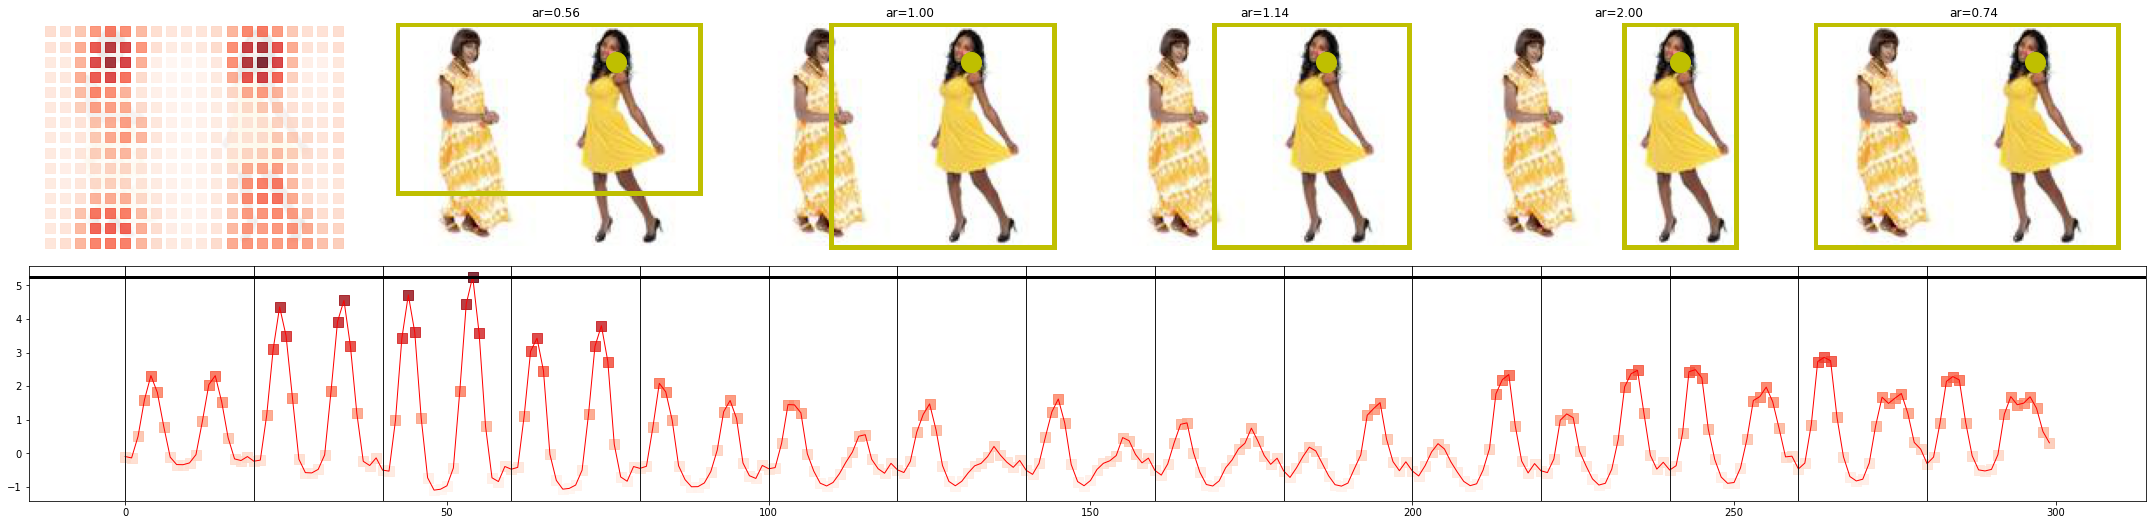

In [ ]:
num = '12'
images = [
    Image.open(data_dir / Path("./Eastern" + num + ".jpg")),
    Image.open(data_dir / Path("./Western" + num + ".jpg")),
]
img, x_sep, y_sep = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
x, y = model.plot_img_crops_using_img(img, topK=1)
print(x, y)
print(x_sep)
print(y_sep)
# print(model.plot_img_crops_using_img(img, topK=1))
# print(salient_x, salient_y)
plt.savefig("Eastern" + num + "_Western" + num + ".jpeg", bbox_inches="tight")

/tmp/tmp35zwb9hd
None 174 128


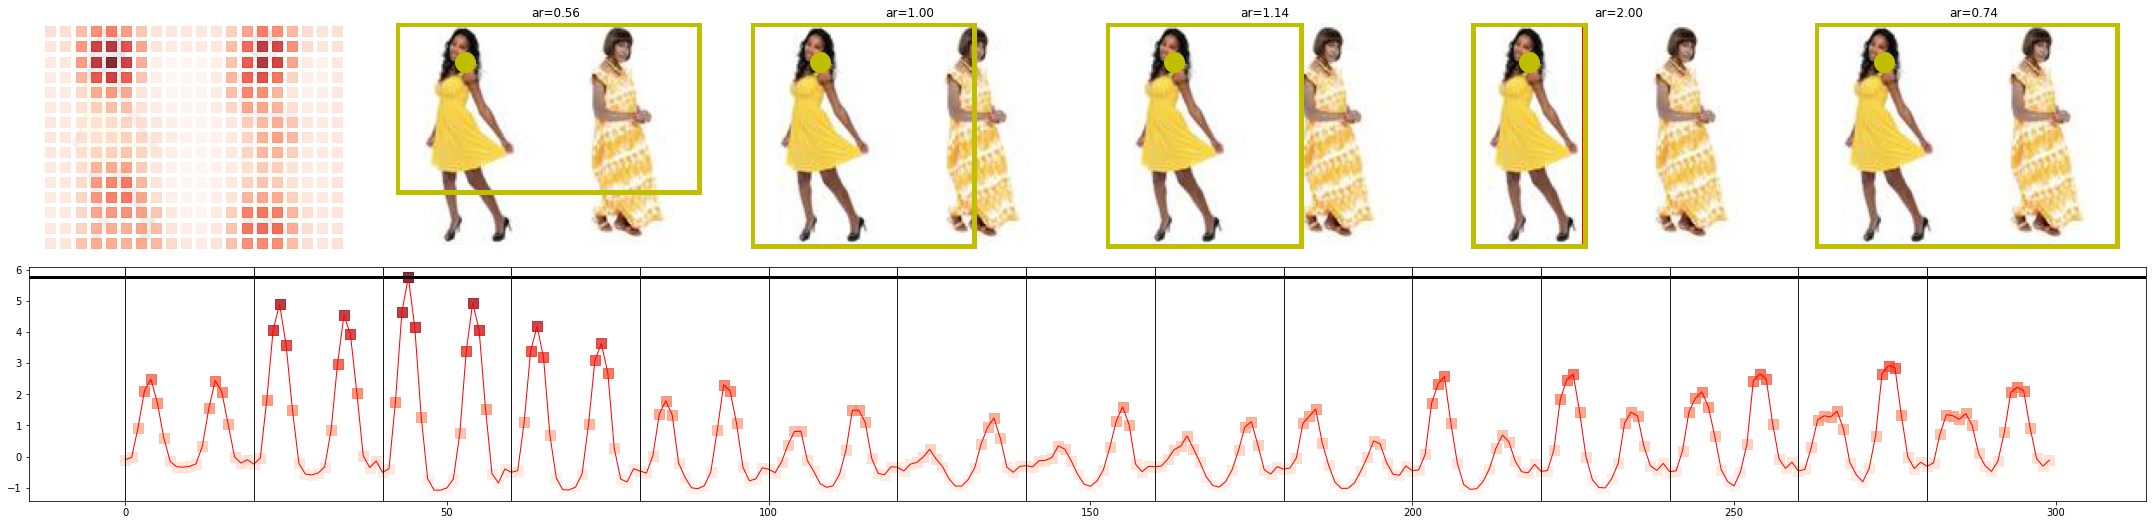

In [ ]:

images = [
    Image.open(data_dir / Path("./Western" + num + ".jpg")),
    Image.open(data_dir / Path("./Eastern" + num + ".jpg")),
]
img, x_sep, y_sep = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
model.plot_img_crops_using_img(img, topK=1)
plt.savefig("Western" + num + "_Eastern" + num + ".jpeg", bbox_inches="tight")

this is the separation line
88 128
/tmp/tmpcqlqo30r
None 88 356
these are the saliency coordinates
44.5 258.1


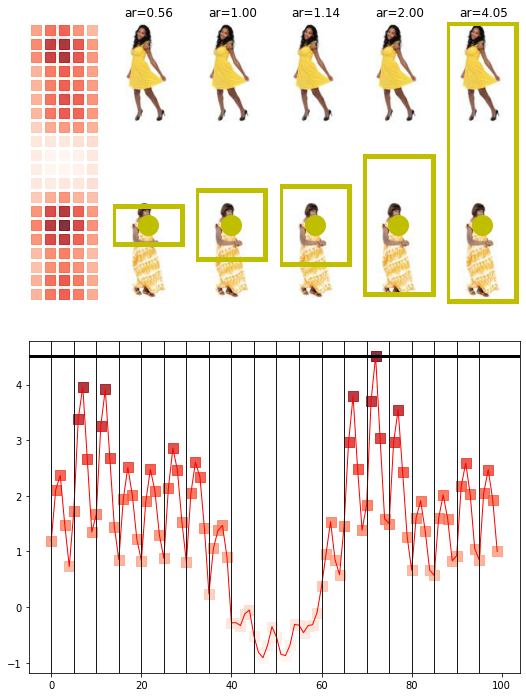

In [ ]:
num = '12'
images = [
    Image.open(data_dir / Path("./Western" + num + ".jpg")),
    Image.open(data_dir / Path("./Eastern" + num + ".jpg")),
]
img, x_sep, y_sep = join_images(images, col_wrap=1, img_size=(128, 128), padding=100)
print("this is the separation line")
print(x_sep, y_sep)
x, y = model.plot_img_crops_using_img(img, topK=1)
print("these are the saliency coordinates")
print(x, y)